<div align="center">

**US Elections 2020**

*Economic and Demographic insights into voter behaviors and trends*  

© 2025 Giacomo Angeletti, Tobia Bertolini, Lorenzo Cattelan, Mattia Zoccarato. All rights reserved.

Computer Programming and Data Management — Ca' Foscari University of Venice

</div>

# Import

In [ ]:
import numpy as np
from numpy import nan as NA
import pandas as pd
import geopandas as gpd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import plotly.express as px
from zipfile import ZipFile
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, BoundaryNorm
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
import statsmodels.api as sm
#--------------
from google.colab import drive
drive.mount('/content/drive')
!pip install gdown
import os
import gdown
from sre_constants import error
folder_path = '/content/file'
os.makedirs(folder_path, exist_ok=True)

folder_id = "1bNcOhTTzoaUNSNH86EYCTuxDI-smlOmG"

!gdown --folder https://drive.google.com/drive/folders/{folder_id} -O {folder_path}

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-1-525559d39fc8>:26: DeprecationWarning: module 'sre_constants' is deprecated
  from sre_constants import error


Retrieving folder contents
Processing file 1HWdDKMfe7BQ2Hxthz9mp4ysZO2HfpXqF aggregated_voting_percentages.csv
Processing file 1dNz6zMJ4yoiMJpgluHrYSeVUkSBZlBnWCmxD6cTUspo cleaned_table04b
Processing file 1wUBE8gPiAWDzmVew8v-ZDIoBlGYhS4t7 cleaned_UnemploymentLevel
Processing file 1wU84zzobwgR7fJbtvF01hLEq2dGCnI3D Consumer_Price_Index.xlsx
Processing file 161cyLHE2fog0ph6CypVzJaKr3erUfMkl Earnings_Per_State.xlsx
Processing file 1GS_AdY-GVUqvYegAKgNm148KL2XJSm3j MainThemeData.xlsx
Processing file 1oxMI0_vflHbKhPmdeLllYL9f6oeAXTXL_XsQytGqW1Q merged_swing_states_ethnicity_analysis
Processing file 1E1Y7qp4WZEVAW1pIQH5kAxjKSC0iOmWU REGRESSIONE.xlsx
Processing file 1_-p3aG5N_0u5_KyIA7yhhT3jwPAoVt2F State_unemployment_rates.xlsx
Processing file 13FPgiW5tXDs0k0c79601iVbzXBd6RrYU table04a.xlsx
Processing file 1x0ODjAStUUGJSxSQfVt7FZohIX9DIKji table04b.xlsx
Processing file 1n1gFkud8_SetzeqKhq9YIXAK1xI5Vz4x Unemployment Level.xlsx
Processing file 1OT3r22KRljrRvGLnGp0qsVZ3LE3iRjWv Unemployment Rate

# Occupation


In [ ]:
# Load the 'tot' sheet from the Excel file into the 'work' DataFrame
work = pd.read_excel('/content/file/work.xlsx','tot')
display(work.head())
print('------------------------')
# Display information about the DataFrame and print the number of missing values in each column
print(work.info())
print(work.isnull().sum())

Occupation, race, and Hispanic or Latino ethnicity     Total  Unnamed: 2  \
0                                                NaN    2020.0      2021.0   
1                                             TOTAL        NaN         NaN   
2            Total, 16 years and over (in thousands)  147795.0    152581.0   
3                          Percent of total employed     100.0       100.0   
4  Management, professional, and related occupations      43.1        42.4   

       Men  Unnamed: 4    Women  Unnamed: 6  
0   2020.0      2021.0   2020.0      2021.0  
1      NaN         NaN      NaN         NaN  
2  78560.0     80829.0  69234.0     71752.0  
3    100.0       100.0    100.0       100.0  
4     39.1        38.5     47.5        46.9

------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Occupation, race, and Hispanic or Latino ethnicity  17 non-null     object 
 1   Total                                               17 non-null     float64
 2   Unnamed: 2                                          17 non-null     float64
 3   Men                                                 17 non-null     float64
 4   Unnamed: 4                                          17 non-null     float64
 5   Women                                               17 non-null     float64
 6   Unnamed: 6                                          17 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.1+ KB
None
Occupation, race, and Hispanic or Latino ethnicity    1
Total                          

In [ ]:
# List of sheet names from the Excel file
xls_sheets = ['tot', 'white', 'black', 'asian', 'latino']

df_i = []

for i, sheet in enumerate(xls_sheets):
  # Load the current sheet into a DataFrame
  df = pd.read_excel('/content/file/work.xlsx', sheet_name=sheet)
  # Rename columns
  df = df.rename(columns = {'Occupation, race, and Hispanic or Latino ethnicity': xls_sheets[i],
                              'Total': 'Total_2020', 'Unnamed: 2': 'Total_2021',
                              'Men': 'Men_2020', 'Unnamed: 4': 'Men_2021', 'Women':'Women_2020',
                              'Unnamed: 6': 'Women_2021'})
  df_i.append(df)

  df = df.drop(index=[0,1])
  print(df.info())
  print(df.isnull().sum())
  print('------------------------')
  # Save the DataFrame as a CSV file
  df.to_csv(f'/content/file/{xls_sheets[i]}.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 2 to 17
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tot         16 non-null     object 
 1   Total_2020  16 non-null     float64
 2   Total_2021  16 non-null     float64
 3   Men_2020    16 non-null     float64
 4   Men_2021    16 non-null     float64
 5   Women_2020  16 non-null     float64
 6   Women_2021  16 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.0+ KB
None
tot           0
Total_2020    0
Total_2021    0
Men_2020      0
Men_2021      0
Women_2020    0
Women_2021    0
dtype: int64
------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 2 to 17
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   white       16 non-null     object 
 1   Total_2020  16 non-null     float64
 2   Total_2021  16 non-null     float64
 3   Men_2020  

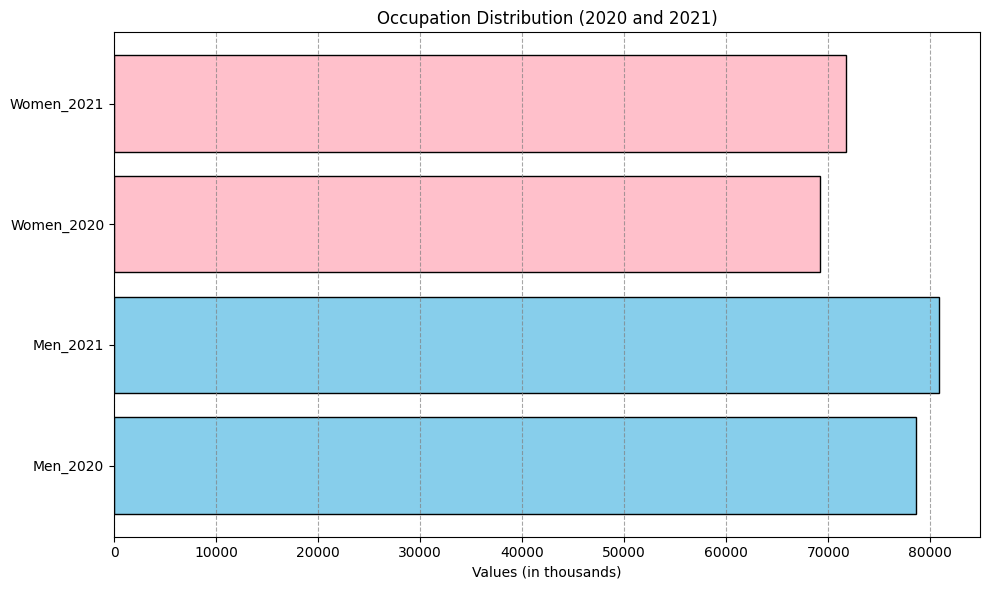

In [ ]:
# Load all the CSV files for different ethnic groups
df_tot = pd.read_csv('/content/file/tot.csv')
df_white = pd.read_csv('/content/file/white.csv')
df_black = pd.read_csv('/content/file/black.csv')
df_asian = pd.read_csv('/content/file/asian.csv')
df_latino = pd.read_csv('/content/file/latino.csv')

# Extract the data for the years of 2020 and 2021
occupation_data = df_tot.iloc[0, 3:7]
colors = ['skyblue' if 'Men' in label else 'pink' for label in occupation_data.index]

# Create horizontal bar plot
plt.figure(figsize = (10, 6))
plt.barh(occupation_data.index, occupation_data.values, color = colors, edgecolor = 'black' )
plt.title('Occupation Distribution (2020 and 2021)')
plt.grid(axis='x', linestyle='--', alpha=0.7, color = 'grey')
plt.xlabel('Values (in thousands)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

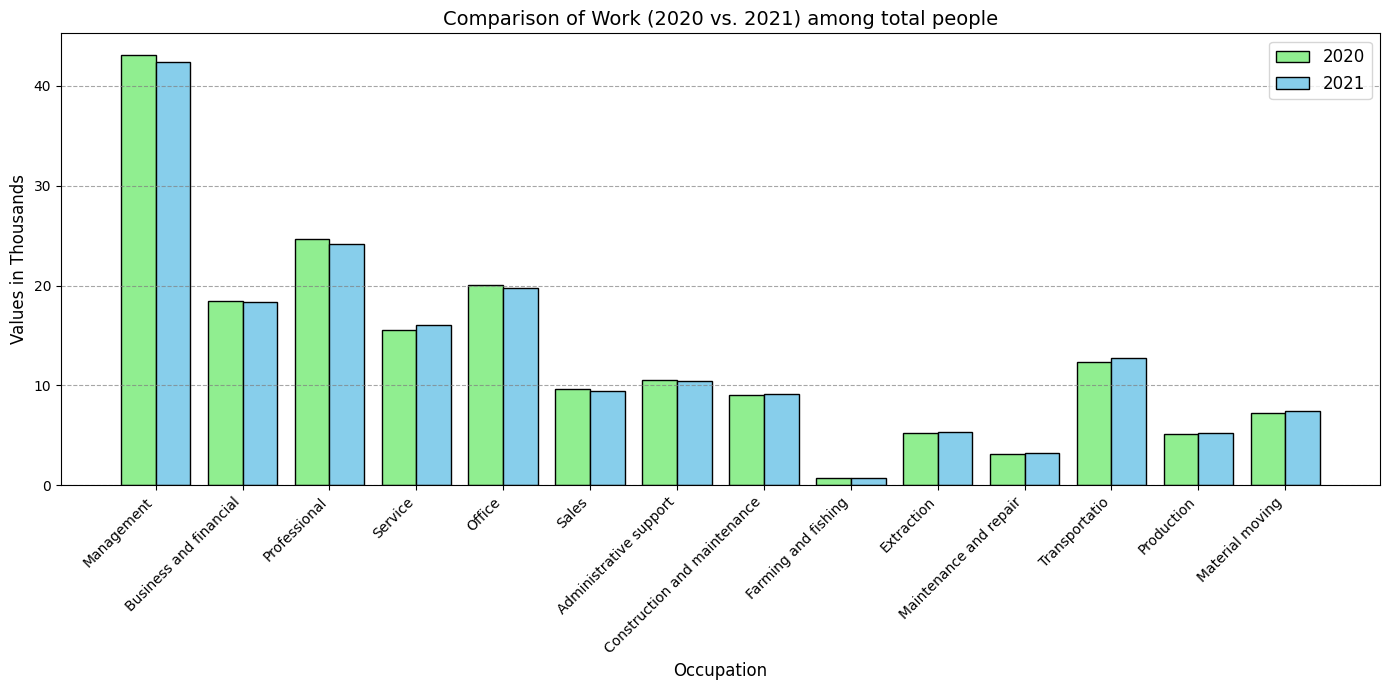

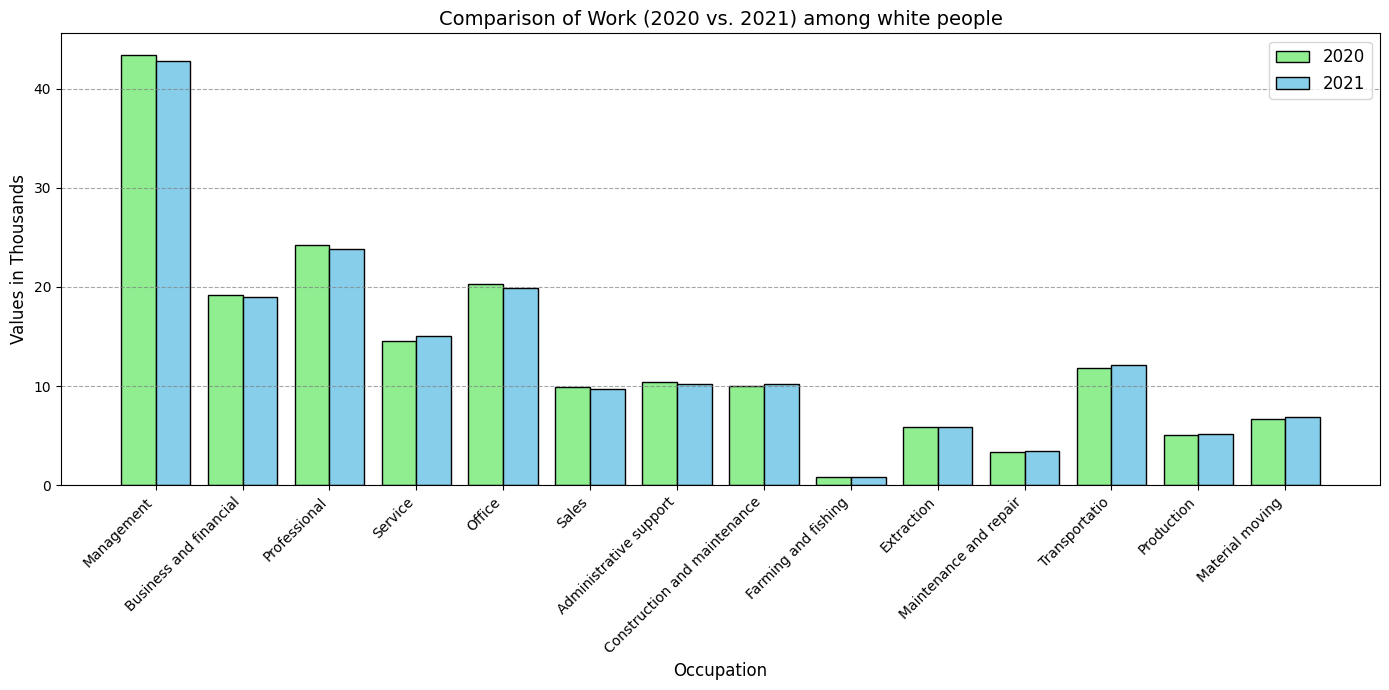

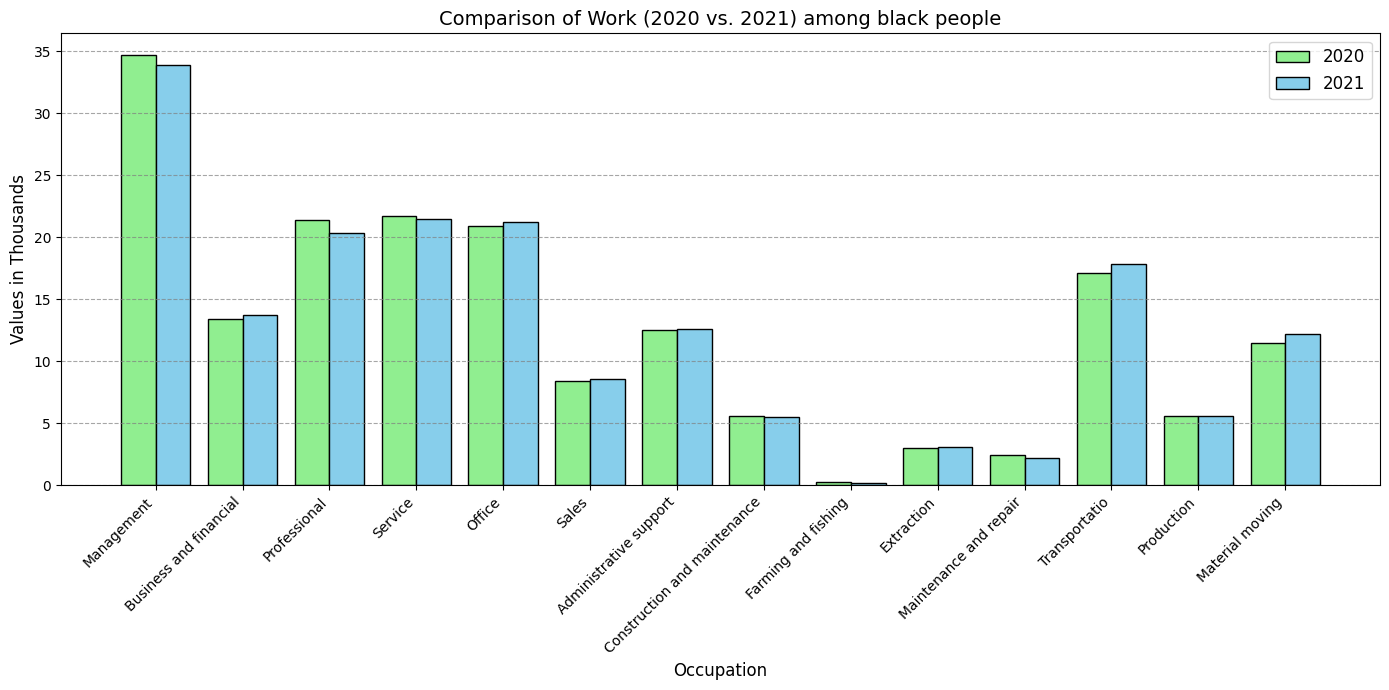

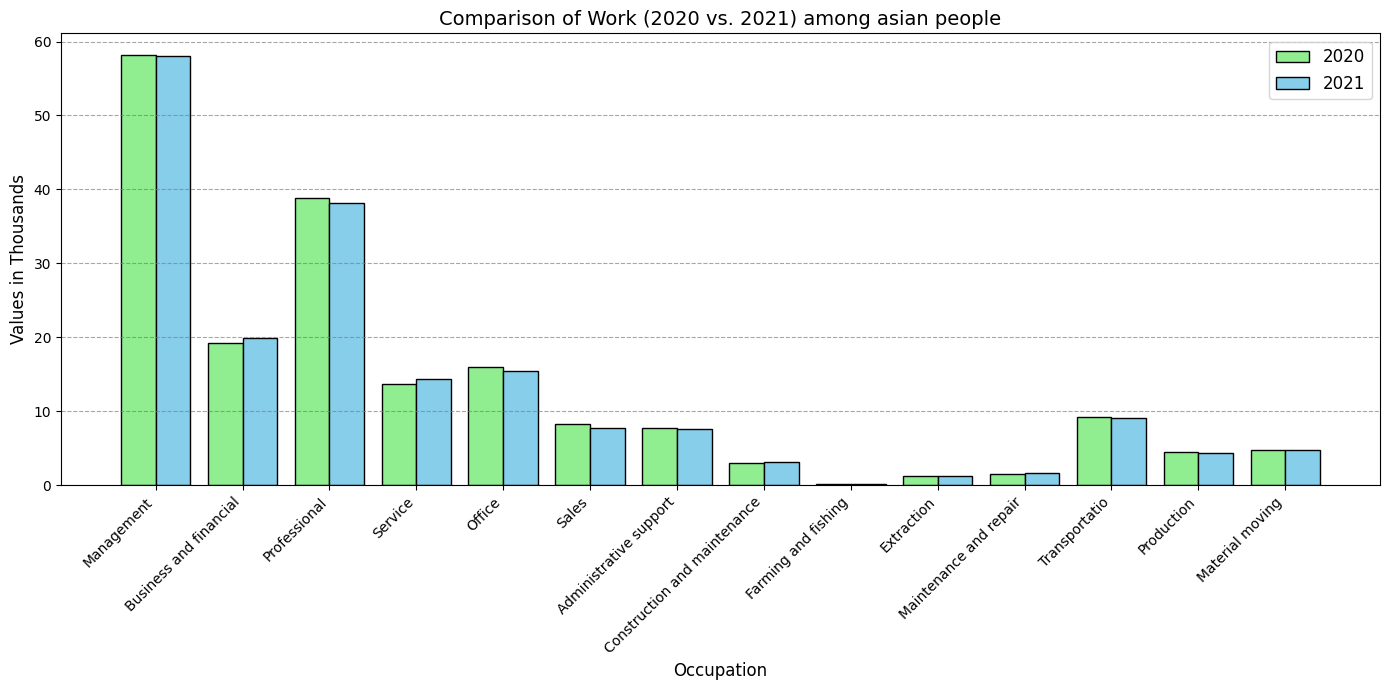

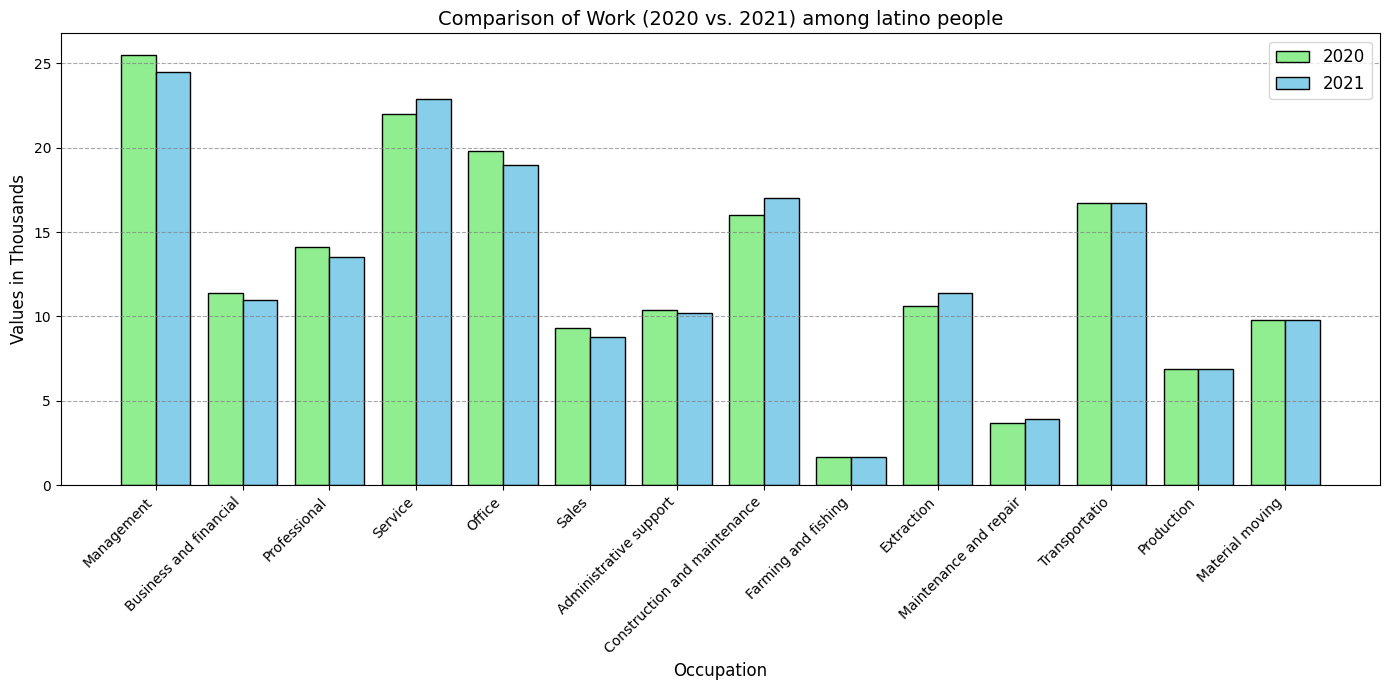

In [ ]:
# Categories of occupation and ethnicity groups in the datasets
categories = ['Management, professional, and related occupations', 'Management, business, and financial operations occupations',
              'Professional and related occupations', 'Service occupations','Sales and office occupations', 'Sales and related occupations',
              'Office and administrative support occupations', 'Natural resources, construction, and maintenance occupations',
              'Farming, fishing, and forestry occupations', 'Construction and extraction occupations', 'Installation, maintenance, and repair occupations',
              'Production, transportation, and material moving occupations', 'Production occupations', 'Transportation and material moving occupations']
ethnicity = ["tot","white", "black", "asian", "latino"]
namex = ['Management',
         'Business and financial',
         'Professional',
         'Service',
         'Office',
         'Sales',
         'Administrative support',
         'Construction and maintenance',
         'Farming and fishing',
         'Extraction',
         'Maintenance and repair',
         'Transportatio',
         'Production',
         'Material moving']

# Range for ethnic groups and their DataFrames
for i, df in enumerate([df_tot, df_white, df_black, df_asian, df_latino]):

  # Filter rows where the occupation column matches the categories
  filtered_df = df[df[ethnicity[i]].isin(categories)]

  bar_width = 0.4
  x = np.arange(len(filtered_df))
  values_2020 = filtered_df['Total_2020']
  values_2021 = filtered_df['Total_2021']

  # Create bar plot
  plt.figure(figsize=(14, 7))
  plt.bar(x - bar_width/2, values_2020, bar_width, label='2020', color='lightgreen', edgecolor='black')
  plt.bar(x + bar_width/2, values_2021, bar_width, label='2021', color='skyblue', edgecolor='black')
  plt.xlabel('Occupation', fontsize=12)
  plt.ylabel('Values in Thousands', fontsize=12)
  plt.title(f'Comparison of Work (2020 vs. 2021) among {np.where(i==0, "total", ethnicity[i])} people', fontsize=14)
  plt.xticks(x, namex, rotation=45, ha='right', fontsize=10)
  plt.legend(loc='upper right', fontsize=12)
  plt.grid(axis = 'y', linestyle='--', alpha=0.7, color = 'grey')

  # Adjust layout and display the plot
  plt.tight_layout()
  plt.show()

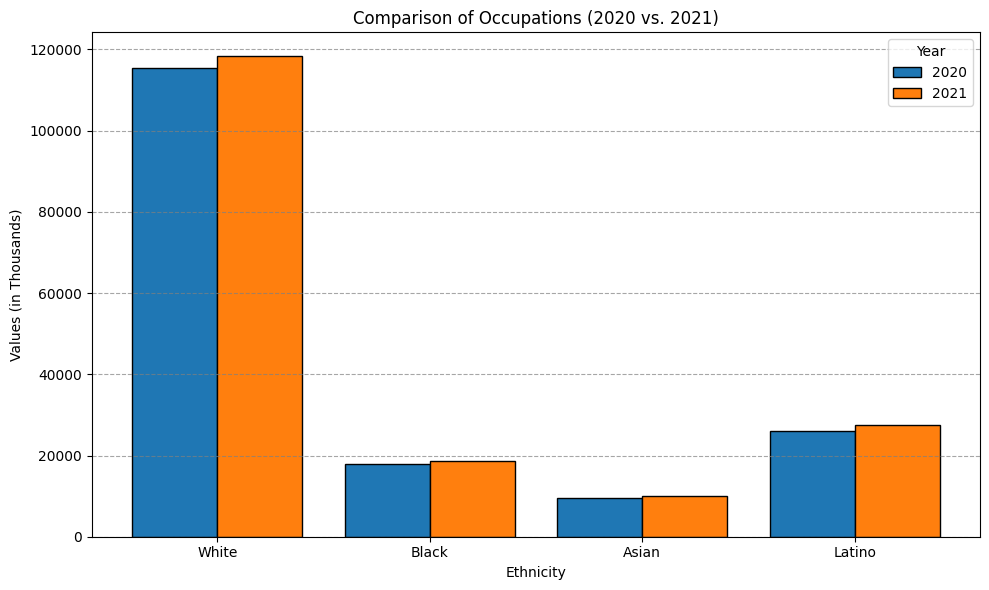

In [ ]:
# List of DatFrames and labels for different ethnic groups
dfs = [df_white, df_black, df_asian, df_latino]
categories = ["White", "Black", "Asian", "Latino"]

bar_width = 0.4
n_datasets = len(dfs)
n_categories = len(dfs[0].iloc[0, 1:3]) # Number of categories (years 2020 and 2021)

# Positions for the bars
x = np.arange(n_datasets)

# Range for numbr of categories (2020 and 2021) to plot bars for each year
for i in range(n_categories):
    values = [df.iloc[0, 1 + i] for df in dfs] # Access year data in each DataFrame
    plt.bar(x + i * bar_width, values, bar_width, edgecolor = 'black', label=f"202{i}") # Create bar plot

plt.title('Comparison of Occupations (2020 vs. 2021)')
plt.xlabel('Ethnicity')
plt.ylabel('Values (in Thousands)')
plt.xticks(x + bar_width * (n_categories - 1) / 2, categories)
plt.legend(title = 'Year')
plt.grid(axis='y', linestyle='--', alpha=0.7, color = 'grey')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Unemployment Level

In [ ]:
# Load the Excel file into the 'df' DataFrame
# DATA CLEANING PROCESS
df = pd.read_excel('/content/file/Unemployment Level.xlsx')
df = df.drop(range(0,11)) #removing the first 11th rows
df.drop('Unnamed: 13', axis = 1, inplace = True) # removing the 13th col
# Renaming the unnamed column with the correct month name
df = df.rename(columns = {'Labor Force Statistics from the Current Population Survey': 'Year',
                         'Unnamed: 1': 'Jan',
                         'Unnamed: 2': 'Feb',
                         'Unnamed: 3': 'Mar',
                         'Unnamed: 4': 'Apr',
                         'Unnamed: 5': 'May',
                         'Unnamed: 6': 'Jun',
                         'Unnamed: 7': 'Jul',
                         'Unnamed: 8': 'Aug',
                         'Unnamed: 9': 'Sep',
                         'Unnamed: 10': 'Oct',
                         'Unnamed: 11': 'Nov',
                         'Unnamed: 12': 'Dec',})

df = df.set_index('Year') #the col "year" is set as the index of the df
df.dropna(inplace= True) #dropping nans if there's any

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
print('Number of unemployed people')
unemplyed_df = df.T #assigning the transposed df to unemployed_df
display(unemplyed_df)

unemplyed_df.to_csv('cleaned_UnemploymentLevel', index = True) #saving
df1 = pd.read_csv('cleaned_UnemploymentLevel', index_col= 0)

Number of unemployed people


Year   2020   2021
Jan    5842  10196
Feb    5729   9992
Mar    7209   9734
Apr   23090   9801
May   20933   9250
Jun   17658   9547
Jul   16391   8770
Aug   13498   8288
Sep   12573   7659
Oct   11012   7244
Nov   10713   6733
Dec   10772   6305

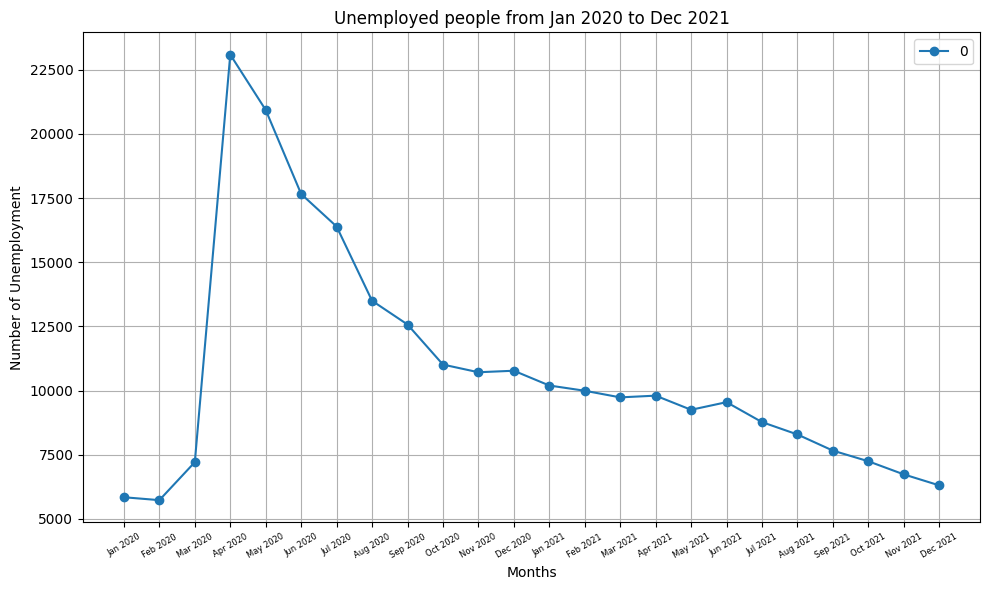

In [ ]:
lst = df1.values.T.flatten().tolist()  # Flattened values of the transposed df
Tot = pd.DataFrame(lst)

#plot Tot
ax = Tot.plot(kind='line', marker='o')
ax.set_xlabel("Months")
ax.set_ylabel("Number of Unemployment")
ax.set_title("Unemployed people from Jan 2020 to Dec 2021")
ax.grid(True)

ax.set_xticks(range(24))
ax.set_xticklabels([f'{month} {year}' for year in ['2020', '2021']
                   for month in ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]],
                  rotation=30,
                  fontsize=6)

plt.tight_layout()
plt.show()

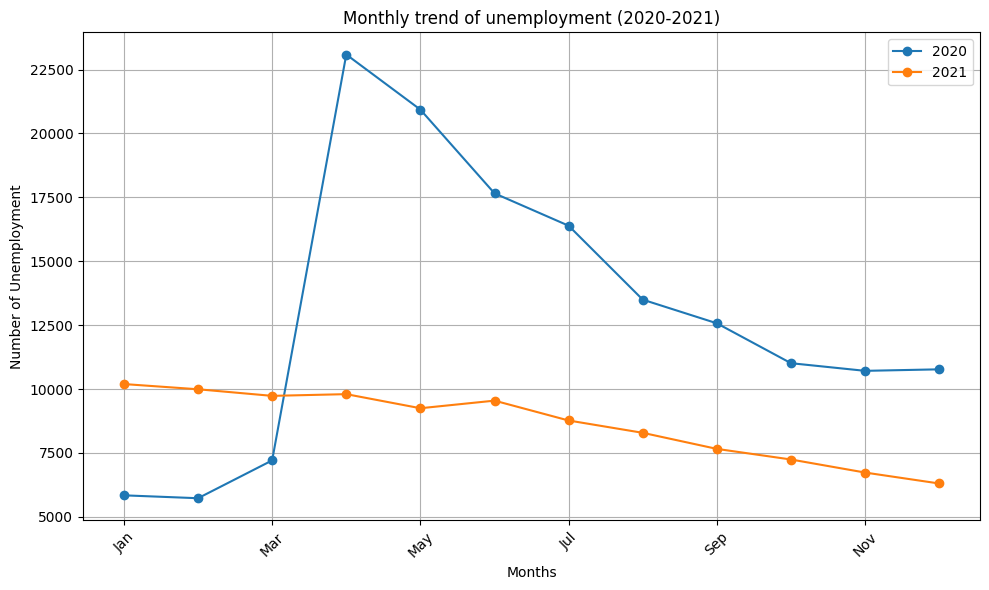

In [ ]:
ax = df1.plot(kind='line', marker='o') #making a plot to confront
ax.set_xlabel("Months")
ax.set_ylabel("Number of Unemployment")
ax.set_title("Monthly trend of unemployment (2020-2021)")
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

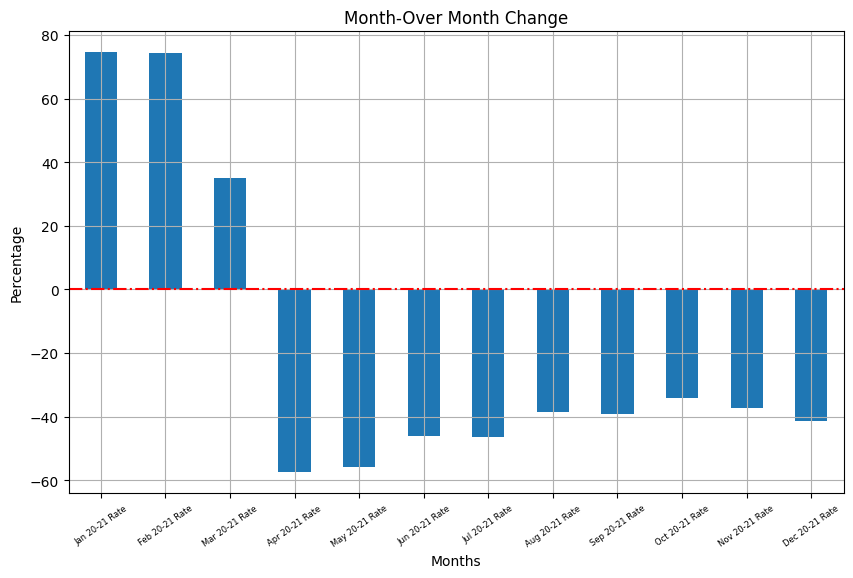

In [ ]:
df1 = df1.T # transponing the df
df1.loc['%'] = ((df1.loc['2021'] - df1.loc['2020']) / df1.loc['2020']) * 100 #making the month to month percentage variation
df1 = df1.T

ax = df1['%'].plot(kind = 'bar')
ax.set_xlabel('Months')
ax.set_ylabel('Percentage')
ax.set_title("Month-Over Month Change")
ax.grid(True)
plt.axhline(y = 0, color = 'r', linestyle = '-.')
plt.xticks(ticks = range(12),
           labels = [f'{i} 20-21 Rate' for i in ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                                 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]],
           fontsize = 6, rotation = 35)
plt.show()

# Unemployment Rate

In [ ]:
# Load the Excel file into the 'State_unemployment_rates' DataFrame
State_unemployment_rates = pd.read_excel('/content/file/State_unemployment_rates.xlsx')
display(State_unemployment_rates.head())
print('------------------------')
# Display information about the DataFrame and print the number of missing values in each column
print(State_unemployment_rates.info())
print(State_unemployment_rates.isnull().sum())

State  Jan 2020  2020-02-01 00:00:00  2020-03-01 00:00:00  \
0     Alabama       3.2                  3.3                  3.4   
1      Alaska       5.4                  5.5                  5.5   
2     Arizona       4.8                  4.8                  4.9   
3    Arkansas       3.5                  3.6                  4.9   
4  California       4.3                  4.4                  5.5   

   2020-04-01 00:00:00  May 2020  Jun 2020  Jul 2020  Aug 2020  Sep 2020  ...  \
0                 13.8      10.4       8.6       7.5       6.3       5.9  ...   
1                 11.7      11.8      11.2      11.1       8.6       7.9  ...   
2                 13.8      11.2       9.8       8.9       7.9       7.5  ...   
3                 10.1       8.9       7.9       7.3       6.4       6.0  ...   
4                 16.1      15.8      13.8      13.2      11.9      10.0  ...   

   Mar 20201  2021-04-01 00:00:00  May 2021  Jun 2021  Jul 2021  Aug 2021  \
0        3.8                  3.7       3.5       3.5       3.3       3.2   
1        7.0                  7.0       6.8       6.8       6.4       6.2   
2        6.0                  5.8       5.5       5.3       5.0       4.6   
3        4.7                  4.5       4.4       4.2       3.9       3.7   
4        8.4                  8.3       7.9       7.8       7.4       7.0   

   Sep 2021  Oct 2021  2021-11-01 00:00:00  Dec 2021  
0       3.0       2.9                  2.8       2.7  
1       5.9       5.7                  5.5       5.3  
2       4.3       4.1                  3.9       3.7  
3       3.5       3.4                  3.3       3.2  
4       6.5       6.1                  5.7       5.5  

[5 rows x 25 columns]

------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                51 non-null     object 
 1   Jan 2020             51 non-null     float64
 2   2020-02-01 00:00:00  51 non-null     float64
 3   2020-03-01 00:00:00  51 non-null     float64
 4   2020-04-01 00:00:00  51 non-null     float64
 5   May 2020             51 non-null     float64
 6   Jun 2020             51 non-null     float64
 7   Jul 2020             51 non-null     float64
 8   Aug 2020             51 non-null     float64
 9   Sep 2020             51 non-null     float64
 10  Oct 2020             51 non-null     float64
 11  2020-11-01 00:00:00  51 non-null     float64
 12  Dec 2020             51 non-null     float64
 13  Jan 2021             51 non-null     float64
 14  2021-02-01 00:00:00  51 non-null     float64
 15  Mar 20201        

In [ ]:
# This code was created to change the name of each column, shortening the name of the months

def change_columns():
  months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
  years = [2020, 2021]
  # Create a list of column names in the format 'MonthYear' for each year and month
  column_names = [f'{month}{year}' for year in years for month in months]
  return column_names

# Generate new column with the function and update the DataFrame's column names keeping first column unchanged
new_columns_names = change_columns()
State_unemployment_rates.columns = [State_unemployment_rates.columns[0]] + new_columns_names

# Save the DataFrame as a CSV file
State_unemployment_rates.to_csv(f'/content/file/State_unemployment_rates.csv', index = False)
display(State_unemployment_rates)

State  Jan2020  Feb2020  Mar2020  Apr2020  May2020  Jun2020  \
0         Alabama      3.2      3.3      3.4     13.8     10.4      8.6   
1          Alaska      5.4      5.5      5.5     11.7     11.8     11.2   
2         Arizona      4.8      4.8      4.9     13.8     11.2      9.8   
3        Arkansas      3.5      3.6      4.9     10.1      8.9      7.9   
4      California      4.3      4.4      5.5     16.1     15.8     13.8   
..            ...      ...      ...      ...      ...      ...      ...   
46       Virginia      2.8      2.9      3.2     12.0     10.0      8.9   
47     Washington      3.7      3.8      5.2     16.7     13.4     11.5   
48  West Virginia      5.3      5.3      5.4     15.8     12.4     10.5   
49      Wisconsin      3.1      3.1      3.0     14.0     10.6      8.7   
50        Wyoming      4.4      4.6      4.8      5.1      8.7      7.3   

    Jul2020  Aug2020  Sep2020  ...  Mar2021  Apr2021  May2021  Jun2021  \
0       7.5      6.3      5.9  ...      3.8      3.7      3.5      3.5   
1      11.1      8.6      7.9  ...      7.0      7.0      6.8      6.8   
2       8.9      7.9      7.5  ...      6.0      5.8      5.5      5.3   
3       7.3      6.4      6.0  ...      4.7      4.5      4.4      4.2   
4      13.2     11.9     10.0  ...      8.4      8.3      7.9      7.8   
..      ...      ...      ...  ...      ...      ...      ...      ...   
46      8.2      7.2      6.6  ...      4.5      4.4      4.2      4.0   
47     10.4      8.8      8.1  ...      6.0      5.7      5.5      5.4   
48      9.4      8.1      7.5  ...      5.9      5.7      5.5      5.4   
49      7.7      6.4      5.8  ...      4.4      4.3      4.1      4.0   
50      6.8      6.2      5.9  ...      5.2      5.0      4.9      4.7   

    Jul2021  Aug2021  Sep2021  Oct2021  Nov2021  Dec2021  
0       3.3      3.2      3.0      2.9      2.8      2.7  
1       6.4      6.2      5.9      5.7      5.5      5.3  
2       5.0      4.6      4.3      4.1      3.9      3.7  
3       3.9      3.7      3.5      3.4      3.3      3.2  
4       7.4      7.0      6.5      6.1      5.7      5.5  
..      ...      ...      ...      ...      ...      ...  
46      3.8      3.5      3.3      3.1      3.0      2.9  
47      5.2      5.0      4.7      4.5      4.2      4.1  
48      5.1      4.9      4.6      4.4      4.2      4.0  
49      3.8      3.6      3.4      3.3      3.1      3.0  
50      4.5      4.3      4.1      3.9      3.7      3.6  

[51 rows x 25 columns]

In [ ]:
# Input data
data = State_unemployment_rates

def download_USA_maps(url, extract_to):
  # Download and extract shapefile data from the URL
  zip_path = Path('temp_shapefile.zip')
  response = requests.get(url)
  zip_path.write_bytes(response.content) # Save the downloaded zip file

  # Extract the contents of the zip file to a specific directory
  with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

  zip_path.unlink() # Remove temporary the zip file

# URL of the shapefile and directory where store it
shapefile_url = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip'
shapefile_dir = Path("usa_shapefiles")
shapefile_dir.mkdir(exist_ok = True)

download_USA_maps(shapefile_url, shapefile_dir)

shapefile_path = shapefile_dir / 'cb_2021_us_state_20m.shp'

# Load the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Remove the territories not included with a mask
excluded_states = ["AS", "GU", "MP", "PR", "VI"]
gdf = gdf[~gdf["STUSPS"].isin(excluded_states)]

# Transforming Alaska and Hawaii
alaska = gdf[gdf["STUSPS"] == "AK"].scale(0.35, 0.35).translate(-4000000, -2500000)
hawaii = gdf[gdf["STUSPS"] == "HI"].scale(1.5, 1.5).translate(5200000, -1400000)
gdf = gdf[~gdf["STUSPS"].isin(["AK", "HI"])]

# Concatenate Alask and Hawaii to main GeoDataFrame
gdf = pd.concat([gdf, alaska, hawaii])

# Joining unemployment data to GeoDataFrame
data.rename(columns = {'State': 'NAME'}, inplace = True)
merged = gdf.merge(data, on = 'NAME', how = 'left')

# Generate output directory to save the output maps
output_dir = Path('us_unemployment_maps')
output_dir.mkdir(exist_ok = True)

# Create category of colors for unemployment rates
bins = [0, 2.9, 4.9, 6.9, 8.9, 100]
colors = ["#deebf7", "#9ecae1", "#3182bd", "#08519c", "#08306b"]
cmap = ListedColormap(colors) # Create a colormap
norm = BoundaryNorm(bins, cmap.N) # Normalize data values to color bins

# Map for each month
months = data.columns[1:]
for month in months:
  fig, ax = plt.subplots(1, 1, figsize=(25, 15))

  merged.plot(column = month,
              cmap = cmap,
              norm = norm,
              ax = ax,
              linewidth = 0.5,
              missing_kwds = {'color': 'lightgrey', 'label': 'No data'},
              edgecolor = 'black')

  ax.set_title(f'Unemployment Rate - {month}', fontsize = 24, pad = 20)
  ax.axis('off')

  # Personalized legend for unemployment rate categories
  legend_labels = [
      "2.9% and below",
      "3.0% to 4.9%",
      "5.0% to 6.9%",
      "7.0% to 8.9%",
      "9.0% and above",
  ]
  legend_handles = [
      mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(colors))
  ]
  ax.legend(
      handles=legend_handles,
      title="Unemployment Rate",
      loc="center left",
      bbox_to_anchor=(0.9, 0.5),
      fontsize=18,
      title_fontsize=20,
      frameon=False
  )

  # Save the map as PNG image
  map_path = output_dir / f'Unemployment_Rate_{month}.png'
  plt.savefig(map_path, dpi = 300)
  plt.close()

print(f'Maps saved in: {output_dir}')

Maps saved in: us_unemployment_maps


# Weekly Earnings

In [ ]:
# Load the Excel file into the 'Weekly_Earnings' DataFrame
Weekly_Earnings = pd.read_excel('/content/file/Weekly_Earnings.xlsx')
display(Weekly_Earnings.head())
print('------------------------')
# Display information about the DataFrame and print the number of missing values in each column
print(Weekly_Earnings.info())
print(Weekly_Earnings.isnull().sum())

Quarter  Total  White  Black or African American  Asian  Hispanic or Latino
0  Q4 2019    936    967                        756   1166                 712
1  Q1 2020    957    980                        775   1221                 721
2  Q2 2020   1002   1017                        805   1336                 786
3  Q3 2020    994   1008                        813   1392                 785
4  Q4 2020    984   1007                        792   1261                 742

------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Quarter                    9 non-null      object
 1   Total                      9 non-null      int64 
 2   White                      9 non-null      int64 
 3   Black or African American  9 non-null      int64 
 4   Asian                      9 non-null      int64 
 5   Hispanic or Latino         9 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 564.0+ bytes
None
Quarter                      0
Total                        0
White                        0
Black or African American    0
Asian                        0
Hispanic or Latino           0
dtype: int64


In [ ]:
# Save the DataFrame as a CSV file
Weekly_Earnings.to_csv(f'/content/file/Weekly_Earnings.csv', index = False)
display(Weekly_Earnings)

Quarter  Total  White  Black or African American  Asian  Hispanic or Latino
0  Q4 2019    936    967                        756   1166                 712
1  Q1 2020    957    980                        775   1221                 721
2  Q2 2020   1002   1017                        805   1336                 786
3  Q3 2020    994   1008                        813   1392                 785
4  Q4 2020    984   1007                        792   1261                 742
5  Q1 2021    989   1006                        799   1286                 750
6  Q2 2021    990   1012                        799   1281                 779
7  Q3 2021   1001   1024                        799   1309                 779
8  Q4 2021   1010   1030                        805   1384                 799

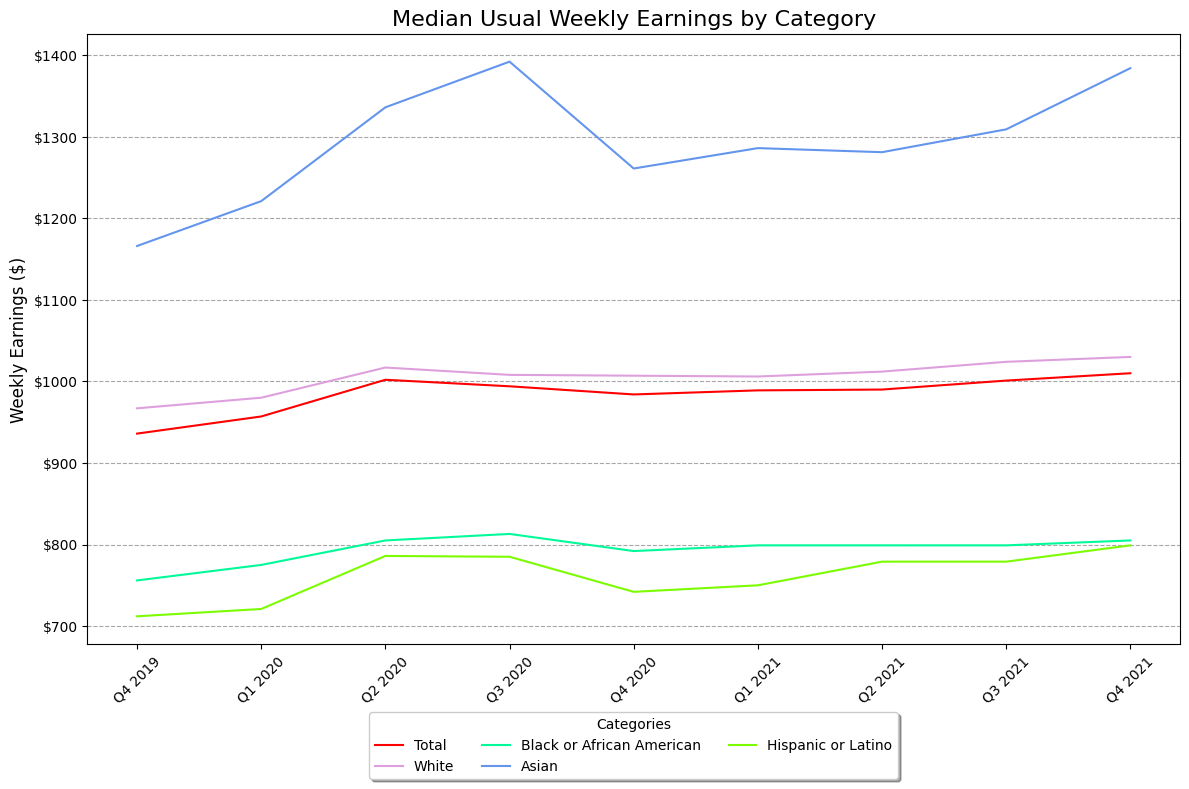

In [ ]:
# Define the data of our interest
quarters = ['Q4 2019', 'Q1 2020', 'Q2 2020', 'Q3 2020', 'Q4 2020', 'Q1 2021', 'Q2 2021', 'Q3 2021', 'Q4 2021']
categories = ['Total', 'White', 'Black or African American', 'Asian', 'Hispanic or Latino']
colors = ['red', 'plum', 'mediumspringgreen', 'cornflowerblue', 'lawngreen']
values = Weekly_Earnings[Weekly_Earnings['Quarter'].isin(quarters)] # Include only rows corresponding to the specified quarters
plt.figure(figsize=(12, 8))

# Plot a line for each category
for i, category in enumerate(categories):
  plt.plot(values['Quarter'], values[category], label = category, color = colors[i])

plt.title('Median Usual Weekly Earnings by Category', fontsize = 16)
plt.xlabel('Quarter', fontsize = 12)
plt.ylabel('Weekly Earnings ($)', fontsize = 12)
plt.xticks(rotation=45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7, color = 'grey')

# Modify y-axis to visualize values as dollar amounts
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x)}'))

plt.legend(title = 'Categories', loc = 'upper center', bbox_to_anchor = (0.5, -0.1), fancybox = True, shadow = True, ncol = 3)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Earnings Per State


In [ ]:
# Load the Excel file into the 'Earnings_Per_State' DataFrame
Earnings_Per_State = pd.read_excel('/content/file/Earnings_Per_State.xlsx')
display(Earnings_Per_State.head())
print('------------------------')
# Display information about the DataFrame and print the number of missing values in each column
print(Earnings_Per_State.info())
print(Earnings_Per_State.isnull().sum())

State  Annual Average Weekly Wage (2020)  \
0  U.S. TOTAL                               1236   
1     Alabama                                989   
2      Alaska                               1170   
3     Arizona                               1119   
4    Arkansas                                937   

   Annual Average Weekly Wage (2021)  Annual Average Weekly Wage (2022)  
0                               1308                               1353  
1                               1032                               1091  
2                               1189                               1247  
3                               1187                               1244  
4                                994                               1042

------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   State                              54 non-null     object
 1   Annual Average Weekly Wage (2020)  54 non-null     int64 
 2   Annual Average Weekly Wage (2021)  54 non-null     int64 
 3   Annual Average Weekly Wage (2022)  54 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB
None
State                                0
Annual Average Weekly Wage (2020)    0
Annual Average Weekly Wage (2021)    0
Annual Average Weekly Wage (2022)    0
dtype: int64


In [ ]:
# Save the DataFrame as a CSV file
Earnings_Per_State.to_csv(f'/content/file/Earnings_Per_State.csv', index = False)
display(Earnings_Per_State)

State  Annual Average Weekly Wage (2020)  \
0       U.S. TOTAL                               1236   
1          Alabama                                989   
2           Alaska                               1170   
3          Arizona                               1119   
4         Arkansas                                937   
..             ...                                ...   
49   West Virginia                                918   
50       Wisconsin                               1037   
51         Wyoming                                966   
52     Puerto Rico                                546   
53  Virgin Islands                                984   

    Annual Average Weekly Wage (2021)  Annual Average Weekly Wage (2022)  
0                                1308                               1353  
1                                1032                               1091  
2                                1189                               1247  
3                                1187                               1244  
4                                 994                               1042  
..                                ...                                ...  
49                                956                               1017  
50                               1089                               1148  
51                               1011                               1081  
52                                566                                592  
53                                867                                851  

[54 rows x 4 columns]

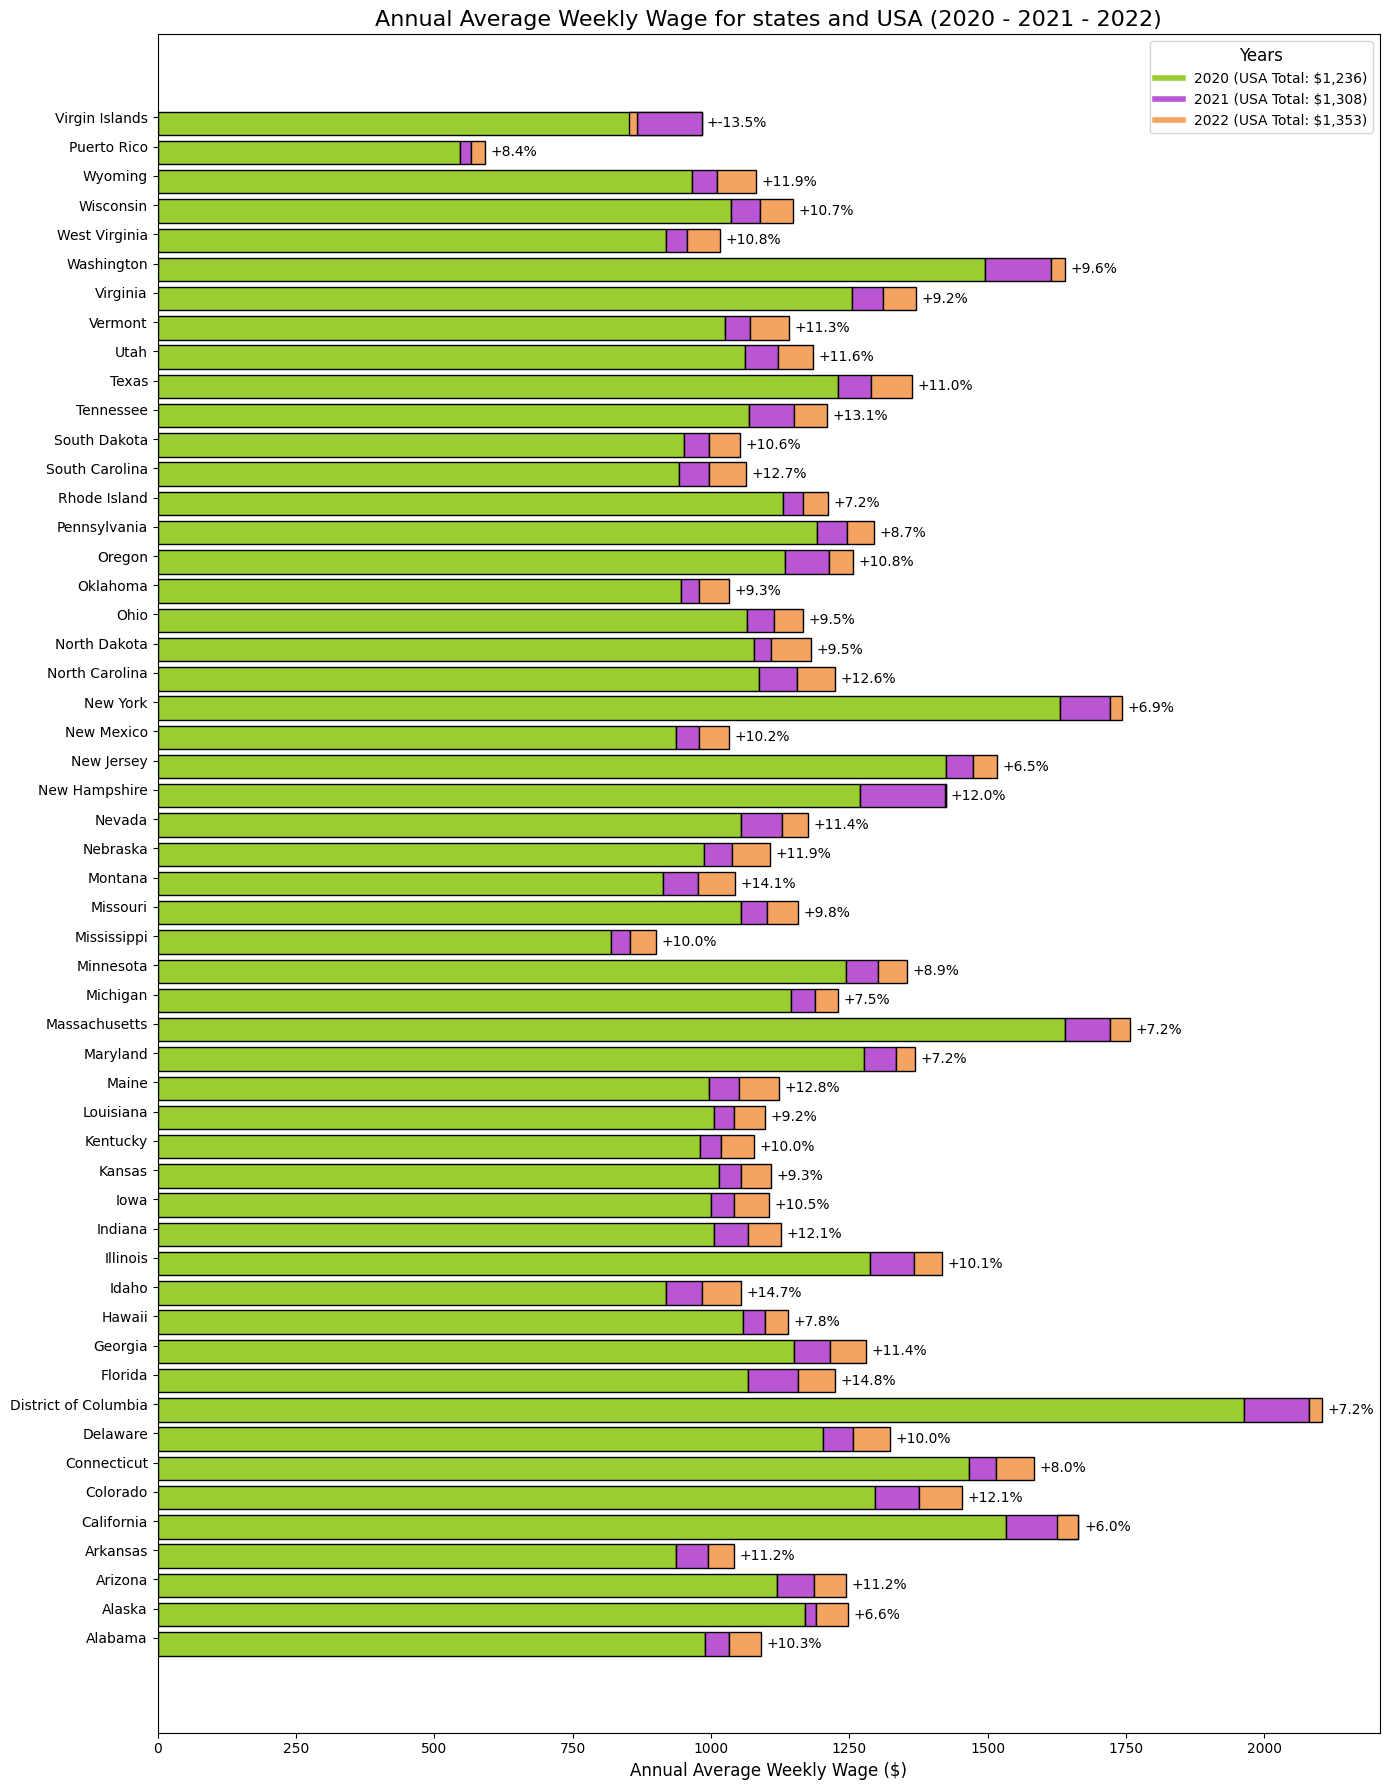

In [ ]:
data = Earnings_Per_State

USA_data = data.iloc[0, 1:].values
states_data = data.iloc[1:]

states = states_data['State']
# Extract annual average weekly wage for 2020 and calculate yearly differences
values_2020 = states_data['Annual Average Weekly Wage (2020)']
values_2021 = states_data['Annual Average Weekly Wage (2021)'] - states_data['Annual Average Weekly Wage (2020)']
values_2022 = states_data['Annual Average Weekly Wage (2022)'] - states_data['Annual Average Weekly Wage (2021)']

# Calculate the percentage increment from 2020 to 2022 for each state
increments_rate = (
    (states_data['Annual Average Weekly Wage (2022)'] - states_data['Annual Average Weekly Wage (2020)'])
    / states_data['Annual Average Weekly Wage (2020)'] * 100
)

colors = ['yellowgreen', 'mediumorchid', 'sandybrown']
bar_width = 0.4

# Create the figure and axis for the horizontal bar plot
fig, ax = plt.subplots(figsize = (14, 18))
y_positions = np.arange(len(states))

# Plot the bars for 2020, 2021 and 2022 values (bars stacked on top of the others)
ax.barh(y_positions, values_2020, color = colors[0], edgecolor = 'black', label = '2020')
ax.barh(y_positions, values_2021, left = values_2020, color = colors[1], edgecolor = 'black', label = '2021')
ax.barh(y_positions, values_2022, left = values_2020 + values_2021, color = colors[2], edgecolor = 'black', label = '2022')

# Add percentage increment text for each state
for i, increments in enumerate(increments_rate):
  # Customize text position for some states
  if states.iloc[i] == "Virgin Islands":
        text_position = values_2020.iloc[i] + values_2021.iloc[i] + values_2022.iloc[i] + 140
  elif states.iloc[i] == "California":
      text_position = values_2020.iloc[i] + values_2021.iloc[i] + values_2022.iloc[i] + 50
  else:
    text_position = values_2020.iloc[i] + values_2021.iloc[i] + values_2022.iloc[i] + 10

  # Add text
  ax.text(text_position,
          y_positions[i],
          f"+{increments:.1f}%",
          va='center', ha='left', fontsize=10, color='black')

ax.set_yticks(y_positions + bar_width/2)
ax.set_yticklabels(states, fontsize = 10, rotation = 0)
ax.set_xlabel('Annual Average Weekly Wage ($)', fontsize = 12)
ax.set_title('Annual Average Weekly Wage for states and USA (2020 - 2021 - 2022)', fontsize = 16)

legend_labels = [
    f"2020 (USA Total: ${USA_data[0]:,.0f})",
    f"2021 (USA Total: ${USA_data[1]:,.0f})",
    f"2022 (USA Total: ${USA_data[2]:,.0f})"
]
# Color lines for each year in the legend
legend_handles = [
    plt.Line2D([0], [0], color = colors[0], lw = 4),
    plt.Line2D([0], [0], color = colors[1], lw = 4),
    plt.Line2D([0], [0], color = colors[2], lw = 4)
]
ax.legend(legend_handles, legend_labels, title = 'Years', fontsize = 10, title_fontsize = 12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Input data
data = Earnings_Per_State

def download_USA_maps(url, extract_to):
  # Download and extract shapefile data from the URL
  zip_path = Path('temp_shapefile_2.zip')
  response = requests.get(url)
  zip_path.write_bytes(response.content) # Save the downloaded zip file

  # Extract the contents of the zip file to a specific directory
  with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

  zip_path.unlink() # Remove temporary the zip file

# URL of the shapefile and directory where store it
shapefile_url = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip'
shapefile_dir = Path("usa_shapefiles_2")
shapefile_dir.mkdir(exist_ok = True)

download_USA_maps(shapefile_url, shapefile_dir)

shapefile_path = shapefile_dir / 'cb_2021_us_state_20m.shp'

# Load the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Remove the territories not included with a mask
excluded_states = ["AS", "GU", "MP", "PR", "VI"]
gdf = gdf[~gdf["STUSPS"].isin(excluded_states)]

# Transforming Alaska and Hawaii
alaska = gdf[gdf["STUSPS"] == "AK"].scale(0.35, 0.35).translate(-4000000, -2500000)
hawaii = gdf[gdf["STUSPS"] == "HI"].scale(1.5, 1.5).translate(5200000, -1400000)
gdf = gdf[~gdf["STUSPS"].isin(["AK", "HI"])]

# Concatenate Alask and Hawaii to main GeoDataFrame
gdf = pd.concat([gdf, alaska, hawaii])

# Joining unemployment data to GeoDataFrame
data.rename(columns = {'State': 'NAME'}, inplace = True)
merged = gdf.merge(data, on = 'NAME', how = 'left')

# Generate output directory to save the output maps
output_dir = Path('us_earnings_per_state_map')
output_dir.mkdir(exist_ok = True)

# Create category of colors for unemployment rates
bins = [0, 1000, 1200, 1400, 1600, 2500]
colors = ["#deebf7", "#9ecae1", "#3182bd", "#08519c", "#08306b"]
cmap = ListedColormap(colors) # Create a colormap
norm = BoundaryNorm(bins, cmap.N) # Normalize data values to color bins

# Map for each month
years = data.columns[1:]
for year in years:
  fig, ax = plt.subplots(1, 1, figsize=(25, 15))

  merged.plot(column = year,
              cmap = cmap,
              norm = norm,
              ax = ax,
              linewidth = 0.5,
              missing_kwds = {'color': 'lightgrey', 'label': 'No data'},
              edgecolor = 'black')

  ax.set_title(f'{year}', fontsize = 24, pad = 20)
  ax.axis('off')

  # Personalized legend for unemployment rate categories
  legend_labels = [
      "999 and below",
      "1000 to 1199",
      "1200 to 1399",
      "1400 to 1599",
      "1600 and above",
  ]
  legend_handles = [
      mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(colors))
  ]
  ax.legend(
      handles=legend_handles,
      title="Salary Range",
      loc="center left",
      bbox_to_anchor=(0.9, 0.5),
      fontsize=18,
      title_fontsize=20,
      frameon=False
  )

  # Save the map as PNG image
  map_path = output_dir / f'{year}.png'
  plt.savefig(map_path, dpi = 300)
  plt.close()

print(f'Maps saved in: {output_dir}')

Maps saved in: us_earnings_per_state_map


# Consumer Price Index


In [ ]:
# Load the Excel file into the 'Consumer_Price_Index' DataFrame
Consumer_Price_Index = pd.read_excel('/content/file/Consumer_Price_Index.xlsx')
display(Consumer_Price_Index.head())
print('------------------------')
# Display information about the DataFrame and print the number of missing values in each column
print(Consumer_Price_Index.info())
print(Consumer_Price_Index.isnull().sum())

Month All items  Food Food at home Food away from home  \
0             Jan 2020       2.5   1.8         0.7%                3.1%   
1  2020-02-01 00:00:00      2.3%  1.8%         0.8%                3.0%   
2  2020-03-01 00:00:00      1.5%  1.9%         1.1%                3.0%   
3  2020-04-01 00:00:00      0.3%  3.5%         4.1%                2.8%   
4             May 2020      0.1%  4.0%         4.8%                2.9%   

   Energy Gasoline (all types) Electricity Natural gas (piped)  \
0    6.2%                12.8%        0.5%               -3.2%   
1    2.8%                 5.6%        0.6%               -2.0%   
2   -5.7%               -10.2%        0.2%               -2.9%   
3  -17.7%               -32.0%        0.2%               -1.9%   
4  -18.9%               -33.8%       -0.2%               -0.3%   

  All items less food and energy Commodities less food and energy commodities  \
0                           2.3%                                        -0.3%   
1                           2.4%                                         0.0%   
2                           2.1%                                        -0.2%   
3                           1.4%                                        -0.9%   
4                           1.2%                                        -1.0%   

  Apparel New vehicles Medical care commodities Services less energy services  \
0   -1.3%         0.1%                     1.7%                          3.1%   
1   -0.9%         0.4%                     1.8%                          3.1%   
2   -1.6%        -0.4%                     1.3%                          2.8%   
3   -5.7%        -0.6%                     0.7%                          2.2%   
4   -7.9%        -0.3%                     0.8%                          2.0%   

  Shelter Medical care services Education and communication  
0    3.3%                  5.1%                        1.5%  
1    3.3%                  5.3%                        1.5%  
2    3.0%                  5.5%                        1.5%  
3    2.6%                  5.8%                        1.6%  
4    2.5%                  5.9%                        1.6%

------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Month                                         48 non-null     object
 1   All items                                     48 non-null     object
 2   Food                                          48 non-null     object
 3   Food at home                                  48 non-null     object
 4   Food away from home                           48 non-null     object
 5   Energy                                        48 non-null     object
 6   Gasoline (all types)                          48 non-null     object
 7   Electricity                                   48 non-null     object
 8   Natural gas (piped)                           48 non-null     object
 9   All items less food and energy                48 non-

In [ ]:
# This code was created to change the name of each row, shortening the name of the months

start_year = 2020
end_year = 2023
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Create a list of column names in the format 'Month Year' for each year and month
month_year_sequence = [f'{month} {year}' for year in range(start_year, end_year + 1) for month in months]

# Assign the format 'Month Year' to the column 'Month' in the DataFrame
Consumer_Price_Index['Month'] = month_year_sequence[:len(Consumer_Price_Index)]

# Save the DataFrame as a CSV file
Consumer_Price_Index.to_csv(f'/content/file/Consumer_Price_Index.csv', index = False)
display(Consumer_Price_Index)

Month All items  Food Food at home Food away from home  Energy  \
0   Jan 2020       2.5   1.8         0.7%                3.1%    6.2%   
1   Feb 2020      2.3%  1.8%         0.8%                3.0%    2.8%   
2   Mar 2020      1.5%  1.9%         1.1%                3.0%   -5.7%   
3   Apr 2020      0.3%  3.5%         4.1%                2.8%  -17.7%   
4   May 2020      0.1%  4.0%         4.8%                2.9%  -18.9%   
..       ...       ...   ...          ...                 ...     ...   
43  Aug 2023      3.7%  4.3%         3.0%                6.5%   -3.6%   
44  Sep 2023      3.7%  3.7%         2.4%                6.0%   -0.5%   
45  Oct 2023      3.2%  3.3%         2.1%                5.4%   -4.5%   
46  Nov 2023      3.1%  2.9%         1.7%                5.3%   -5.4%   
47  Dec 2023      3.4%  2.7%         1.3%                5.2%   -2.0%   

   Gasoline (all types) Electricity Natural gas (piped)  \
0                 12.8%        0.5%               -3.2%   
1                  5.6%        0.6%               -2.0%   
2                -10.2%        0.2%               -2.9%   
3                -32.0%        0.2%               -1.9%   
4                -33.8%       -0.2%               -0.3%   
..                  ...         ...                 ...   
43                -3.3%        2.1%              -16.5%   
44                 3.0%        2.6%              -19.9%   
45                -5.3%        2.4%              -15.8%   
46                -8.9%        3.4%              -10.4%   
47                -1.9%        3.3%              -13.8%   

   All items less food and energy  \
0                            2.3%   
1                            2.4%   
2                            2.1%   
3                            1.4%   
4                            1.2%   
..                            ...   
43                           4.3%   
44                           4.1%   
45                           4.0%   
46                           4.0%   
47                           3.9%   

   Commodities less food and energy commodities Apparel New vehicles  \
0                                         -0.3%   -1.3%         0.1%   
1                                          0.0%   -0.9%         0.4%   
2                                         -0.2%   -1.6%        -0.4%   
3                                         -0.9%   -5.7%        -0.6%   
4                                         -1.0%   -7.9%        -0.3%   
..                                          ...     ...          ...   
43                                         0.2%    3.1%         2.9%   
44                                         0.0%    2.3%         2.5%   
45                                         0.1%    2.6%         1.9%   
46                                         0.0%    1.1%         1.3%   
47                                         0.2%    1.0%         1.0%   

   Medical care commodities Services less energy services Shelter  \
0                      1.7%                          3.1%    3.3%   
1                      1.8%                          3.1%    3.3%   
2                      1.3%                          2.8%    3.0%   
3                      0.7%                          2.2%    2.6%   
4                      0.8%                          2.0%    2.5%   
..                      ...                           ...     ...   
43                     4.5%                          5.9%    7.3%   
44                     4.2%                          5.7%    7.2%   
45                     4.7%                          5.5%    6.7%   
46                     5.0%                          5.5%    6.5%   
47                     4.7%                          5.3%    6.2%   

   Medical care services Education and communication  
0                   5.1%                        1.5%  
1                   5.3%                        1.5%  
2                   5.5%                        1.5%  
3                   5.8%                        1.6%  
4      

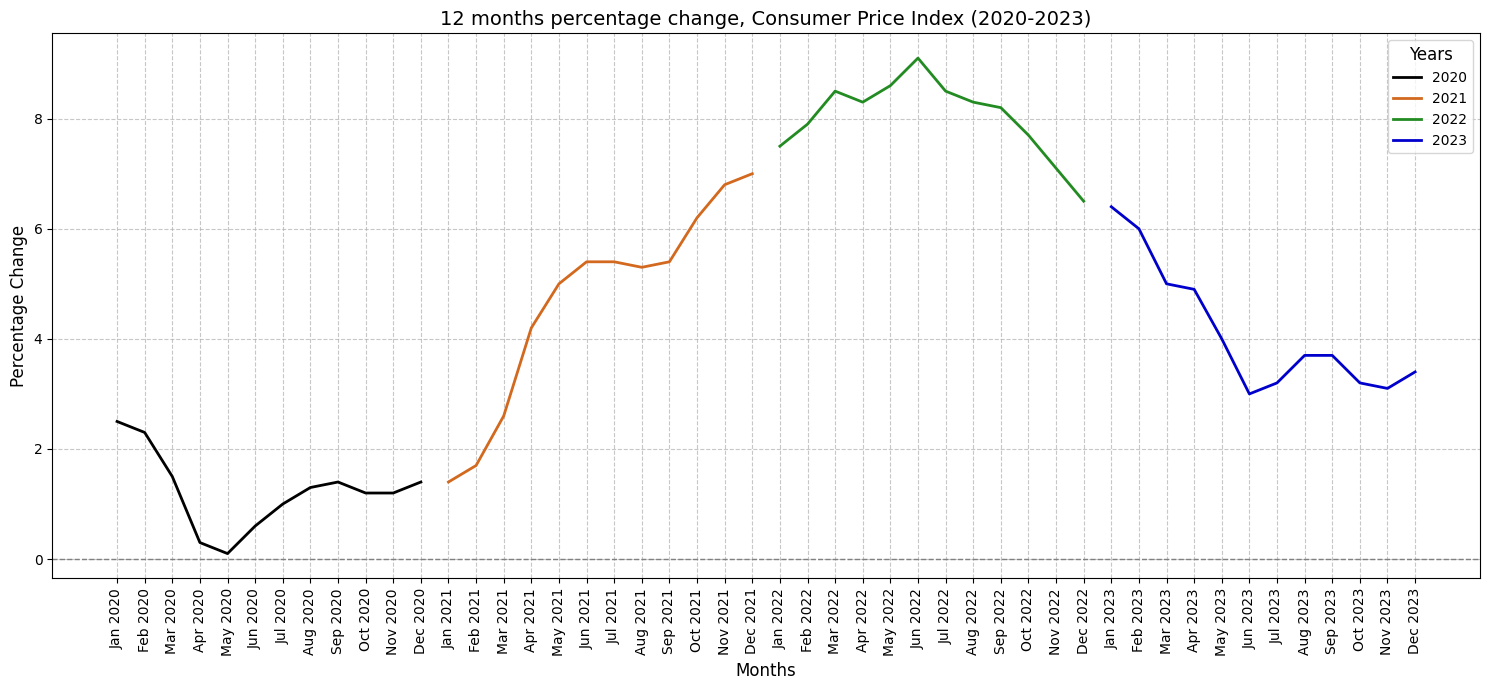

In [ ]:
data = Consumer_Price_Index

# Remove the '%' symbol from the 'All items' column and convrt it to a float
data['All items'] = data['All items'].replace({r'%': ''}, regex=True).astype(float)

# Define the months and colors for each year
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = {2020: 'black', 2021: 'chocolate', 2022: 'forestgreen', 2023: 'mediumblue'}

plt.figure(figsize = (15, 7))

# Range from 2020 to 2023 and plot data for each year
for year in range(2020, 2024):
  all_months = [f'{month} {year}' for month in months]
  data_year = data[data['Month'].isin(all_months)]

  x_labels = all_months
  y_values = data_year['All items']

  # Plot the data for the current year
  plt.plot(x_labels, y_values, label = f'{year}', color = colors[year], linewidth = 2)

plt.title('12 months percentage change, Consumer Price Index (2020-2023)', fontsize = 14)
plt.xlabel('Months', fontsize = 12)
plt.ylabel('Percentage Change', fontsize = 12)
plt.xticks(rotation = 90, fontsize = 10)
plt.axhline(y = 0, color = 'grey', linestyle = '--', linewidth = 1)
plt.legend(title = 'Years', fontsize = 10, title_fontsize = 12)
plt.grid(visible = True, linestyle = '--', alpha = 0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Turnout at US-level

In [ ]:
# Necessary to download high quality .png images with Plotly
!pip install -U kaleido


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00


In [ ]:
# Uploading Excel file
input_file = ('/content/file/table04a.xlsx')
df = pd.read_excel(input_file)
display(df.head())
print('------------------------')
# Display information about the DataFrame and print the number of missing values in each column
print(df.info())
print(df.isnull().sum())

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Table with row headers in column A, and column headers in rows 5 through 6.  \
0  Table 4a.  Reported Voting and Registration fo...                            
1                                     (In thousands)                            
2                                                NaN                            
3                                              STATE                            
4                                                NaN                            

         Unnamed: 1                Unnamed: 2        Unnamed: 3  \
0               NaN                       NaN               NaN   
1               NaN                       NaN               NaN   
2               NaN                       NaN               NaN   
3  Total population  Total citizen population        Registered   
4               NaN                       NaN  Total registered   

                    Unnamed: 4         Unnamed: 5  \
0                          NaN                NaN   
1                          NaN                NaN   
2                          NaN                NaN   
3                          NaN                NaN   
4  Percent registered\n(Total)  Margin of error 1   

                      Unnamed: 6         Unnamed: 7   Unnamed: 8  \
0                            NaN                NaN          NaN   
1                            NaN                NaN          NaN   
2                            NaN                NaN          NaN   
3                            NaN                NaN        Voted   
4  Percent registered\n(Citizen)  Margin of error 1  Total voted   

               Unnamed: 9        Unnamed: 10               Unnamed: 11  \
0                     NaN                NaN                       NaN   
1                     NaN                NaN                       NaN   
2                     NaN                NaN                       NaN   
3                     NaN                NaN                       NaN   
4  Percent voted\n(Total)  Margin of error 1  Percent voted\n(Citizen)   

         Unnamed: 12  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4  Margin of error 1

------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 13 columns):
 #   Column                                                                       Non-Null Count  Dtype 
---  ------                                                                       --------------  ----- 
 0   Table with row headers in column A, and column headers in rows 5 through 6.  61 non-null     object
 1   Unnamed: 1                                                                   53 non-null     object
 2   Unnamed: 2                                                                   53 non-null     object
 3   Unnamed: 3                                                                   54 non-null     object
 4   Unnamed: 4                                                                   53 non-null     object
 5   Unnamed: 5                                                                   53 non-null     object
 6   Unnamed: 6                 

In [ ]:
df = pd.read_excel(input_file, skiprows = 4)

# Cleaning of the DataFrame
# Step 1: Select the heading of the table and the first row
original_header = df.columns.tolist()
first_row = df.iloc[0].tolist()

# Step 2: Merging the heading and the first row to remove the NaN values
new_header = [col if pd.isna(val) else val for col, val in zip(original_header, first_row)]

# Step 3: Setting the new heading, removing the first raw too
df.columns = new_header
df = df[1:]

# Step 4: Indexing reset
df.reset_index(drop=True, inplace=True)

# Last but not least, dropping the other raws with NaN values
df = df.dropna()

# Saving the xlsx to CSV format
df.to_csv("cleaned_table04a.csv", index=False)

display(df)

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


STATE  Total population  Total citizen population  \
0   UNITED STATES          252274.0                  231593.0   
1         ALABAMA            3769.0                    3716.0   
2          ALASKA             528.0                     516.0   
3         ARIZONA            5638.0                    5075.0   
4        ARKANSAS            2283.0                    2195.0   
..            ...               ...                       ...   
47       VIRGINIA            6481.0                    5974.0   
48     WASHINGTON            5993.0                    5389.0   
49  WEST VIRGINIA            1397.0                    1379.0   
50      WISCONSIN            4538.0                    4421.0   
51        WYOMING             436.0                     427.0   

   Total registered Percent registered\n(Total) Margin of error 1  \
0            168308                        66.7               0.4   
1              2527                          67               3.1   
2               383                        72.6               3.2   
3              3878                        68.8               2.5   
4              1361                        59.6               3.4   
..              ...                         ...               ...   
47             4541                        70.1               2.4   
48             4029                        67.2               2.5   
49              928                        66.4               3.4   
50             3391                        74.7               2.7   
51              296                        67.9               3.4   

   Percent registered\n(Citizen) Margin of error 1 Total voted  \
0                           72.7               0.4      154628   
1                             68               3.1        2247   
2                           74.2               3.1         330   
3                           76.4               2.5        3649   
4                             62               3.4        1186   
..                           ...               ...         ...   
47                            76               2.3        4275   
48                          74.8               2.4        3854   
49                          67.3               3.4         773   
50                          76.7               2.6        3253   
51                          69.3               3.4         280   

   Percent voted\n(Total) Margin of error 1 Percent voted\n(Citizen)  \
0                    61.3               0.4                     66.8   
1                    59.6               3.3                     60.5   
2                    62.4               3.4                     63.8   
3                    64.7               2.6                     71.9   
4                    51.9               3.4                       54   
..                    ...               ...                      ...   
47                     66               2.5                     71.5   
48                   64.3               2.6                     71.5   
49                   55.3               3.6                     56.1   
50                   71.7               2.8                     73.6   
51                   64.1               3.5                     65.5   

   Margin of error 1  
0                0.4  
1                3.3  
2                3.4  
3                2.6  
4                3.5  
..               ...  
47               2.4  
48               2.5  
49               3.6  
50               2.7  
51               3.5  

[52 rows x 13 columns]

In [ ]:
# Loading of the cleaned file from US Census Bureau
affluence_df = pd.read_csv('cleaned_table04a.csv')

# Renaning the heading to correctly mapping the US States
affluence_df.rename(columns={'STATE': 'State'}, inplace=True)
affluence_df['State'] = affluence_df['State'].str.title()

# Ensure States names are on standard forms, to be recognized by Plotly
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Adding States abbreviations
affluence_df['State Abbreviation'] = affluence_df['State'].map(state_abbreviations)

# Creating a coropletic map
fig = px.choropleth(
    affluence_df,
    locations='State Abbreviation',
    locationmode='USA-states',
    color='Percent voted\n(Citizen)',
    color_continuous_scale='Blues',
    scope='usa',
    title='Voter Turnout in the 2020 U.S. Elections - by State',
)

fig.show()

# Turnout by ethnicities at US-level

In [ ]:
# Uploading Excel file
input_file = ('/content/file/table04b.xlsx')
df = pd.read_excel(input_file, skiprows=4)

# Cleaning of the DataFrame
# Step 1: Select the heading of the table and the first row
original_header = df.columns.tolist()
first_row = df.iloc[0].tolist()

# Step 2: Merging the heading and the first row to remove the NaN values
new_header = [col if pd.isna(val) else val for col, val in zip(original_header, first_row)]

# Step 3: Setting the new heading, removing the first raw too
df.columns = new_header
df = df[1:]

# Step 4: Indexing reset
df.reset_index(drop=True, inplace=True)

# Filling the blank cells in the first column with the right STATE
df["STATE"] = df["STATE"].fillna(method='ffill')

# Last but not least, dropping the other raws with NaN values
df = df.dropna()

# Saving the xlsx to CSV format
df.to_csv("cleaned_table04b.csv", index=False)

display(df)


<ipython-input-29-3eb80a6da27e>:21: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



STATE Sex, Race, and Hispanic-Origin  Total population  \
0         US                          Total          252274.0   
1         US                           Male          121870.0   
2         US                         Female          130404.0   
3         US                    White alone          195227.0   
4         US       White non-Hispanic alone          157442.0   
..       ...                            ...               ...   
567  WYOMING                    Asian alone               2.0   
568  WYOMING         Hispanic (of any race)              40.0   
569  WYOMING  White alone or in combination             422.0   
570  WYOMING  Black alone or in combination               4.0   
571  WYOMING  Asian alone or in combination               4.0   

    Total citizen population Total registered Percent registered\n(Total)  \
0                     231593           168308                        66.7   
1                     111485            79340                        65.1   
2                     120108            88968                        68.2   
3                     181891           134889                        69.1   
4                     154827           118389                        75.2   
..                       ...              ...                         ...   
567                        -                -                           B   
568                       38               23                           B   
569                      416              290                        68.6   
570                        3                3                           B   
571                        2                2                           B   

    Margin of error 1 Percent registered\n(Citizen) Margin of error 1  \
0                 0.4                          72.7               0.4   
1                 0.5                          71.2               0.5   
2                 0.5                          74.1               0.5   
3                 0.4                          74.2               0.4   
4                 0.4                          76.5               0.4   
..                ...                           ...               ...   
567                 B                             B                 B   
568                 B                             B                 B   
569               3.5                          69.6               3.5   
570                 B                             B                 B   
571                 B                             B                 B   

    Total voted Percent voted\n(Total) Margin of error 1  \
0        154628                   61.3               0.4   
1         72474                   59.5               0.5   
2         82154                     63               0.5   
3        124301                   63.7               0.4   
4        109830                   69.8               0.4   
..          ...                    ...               ...   
567           -                      B                 B   
568          21                      B                 B   
569         273                   64.7               3.6   
570           3                      B                 B   
571           2                      B                 B   

    Percent voted\n(Citizen) Margin of error 1  
0                       66.8               0.4  
1                         65               0.5  
2                       68.4               0.5  
3                       68.3               0.4  
4                       70.9               0.4  
..                       ...               ...  
567                        B                 B  
568                        B                 B  
569                     65.7               3.6  
570                        B                 B  
571                        B                 B  

[572 rows x 14 columns]

<ipython-input-30-dbc023784bc1>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-dbc023784bc1>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




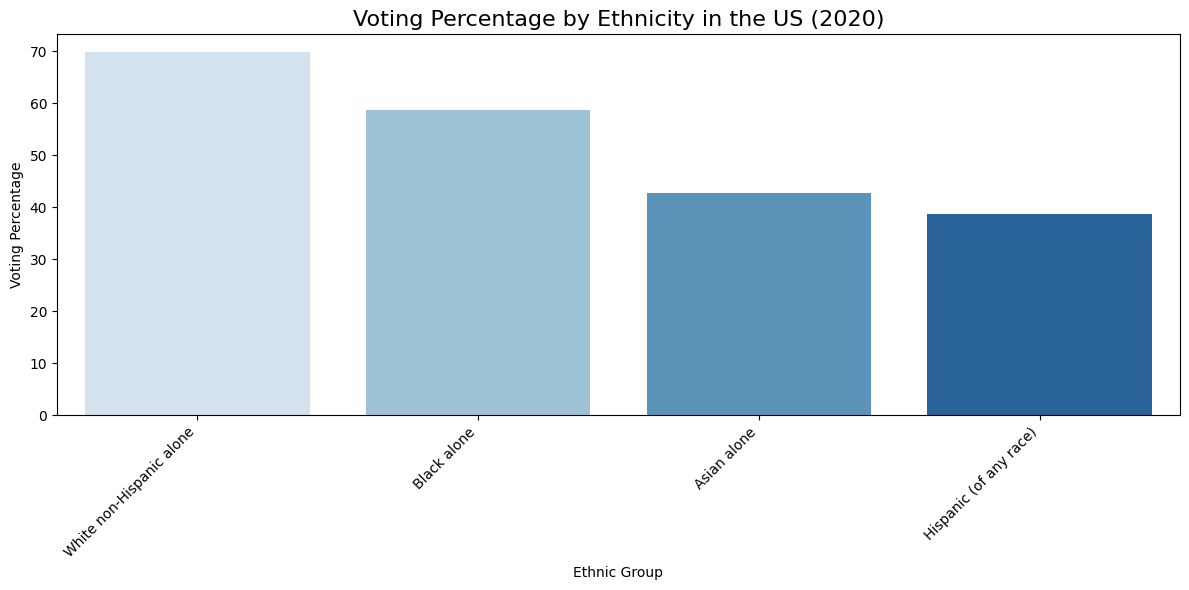

In [ ]:
# Load the dataset
file_path = 'cleaned_table04b.csv'
data = pd.read_csv(file_path)

# Ensure numeric conversion for Total population and Total voted
data['Total population'] = pd.to_numeric(data['Total population'], errors='coerce').fillna(0).astype(int)
data['Total voted'] = pd.to_numeric(data['Total voted'], errors='coerce').fillna(0).astype(int)

# Filter data to focus on ethnic groups at the US level
us_data = data[data['STATE'] == 'US']

# Filter specific ethnic groups of interest
criteria = [
    'White non-Hispanic alone',
    'Black alone',
    'Asian alone',
    'Hispanic (of any race)'
]
us_data = us_data[us_data['Sex, Race, and Hispanic-Origin'].isin(criteria)]

# Select relevant columns for visualization
ethnicity_data = us_data[['Sex, Race, and Hispanic-Origin', 'Total population', 'Total voted']]
ethnicity_data['Voting Percentage'] = (
    ethnicity_data['Total voted'] / ethnicity_data['Total population'] * 100
)

# Plot voting percentages by ethnicity
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ethnicity_data,
    x='Sex, Race, and Hispanic-Origin',
    y='Voting Percentage',
    palette='Blues'
)
plt.title('Voting Percentage by Ethnicity in the US (2020)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Voting Percentage')
plt.xlabel('Ethnic Group')

plt.tight_layout()
plt.show()


# Linear Regression for choosing Swing States
correlation with historical trends

In [ ]:
df = pd.read_excel('/content/file/REGRESSIONE.xlsx') #importing files
df = df.set_index('STATO')
display(df)
print('------------------------')
print(df.info())

% DEM 2020  Dem Historical Trend  % REP 2020  \
STATO                                                         
Alabama            0.3657                     0      0.6203   
Alaska             0.4277                     0      0.5283   
Arizona            0.4936                     0      0.4906   
Arkansas           0.3478                     0      0.6240   
California         0.6348                     1      0.3432   
...                   ...                   ...         ...   
Virginia           0.5411                     1      0.4400   
Washington         0.5797                     1      0.3877   
West Virginia      0.2970                     0      0.6863   
Wisconsin          0.4945                     0      0.4882   
Wyoming            0.2655                     0      0.6994   

               Rep Historical Trend  Avg Age  Avg Hourly Earnings ($)  \
STATO                                                                   
Alabama                           1     39.6                    30.53   
Alaska                            1     35.9                    37.26   
Arizona                           0     38.8                    33.40   
Arkansas                          1     38.9                    28.97   
California                        0     37.8                    40.24   
...                             ...      ...                      ...   
Virginia                          0     38.9                    34.58   
Washington                        0     38.4                    41.62   
West Virginia                     1     42.9                    29.31   
Wisconsin                         0     40.4                    33.64   
Wyoming                           1     39.1                    31.44   

               Avg Unemployment Rate   % non-White  
STATO                                               
Alabama                      0.065818        0.369  
Alaska                       0.084636        0.425  
Arizona                      0.079364        0.466  
Arkansas                     0.062909        0.315  
California                   0.103000        0.653  
...                               ...          ...  
Virginia                     0.066273        0.414  
Washington                   0.087000        0.362  
West Virginia                0.084636        0.109  
Wisconsin                    0.066000        0.214  
Wyoming                      0.059000        0.186  

[51 rows x 8 columns]

------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   % DEM 2020               51 non-null     float64
 1   Dem Historical Trend     51 non-null     int64  
 2   % REP 2020               51 non-null     float64
 3   Rep Historical Trend     51 non-null     int64  
 4   Avg Age                  51 non-null     float64
 5   Avg Hourly Earnings ($)  51 non-null     float64
 6   Avg Unemployment Rate    51 non-null     float64
 7   % non-White              51 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 3.6+ KB
None


<ipython-input-32-11eb6798347f>:4: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



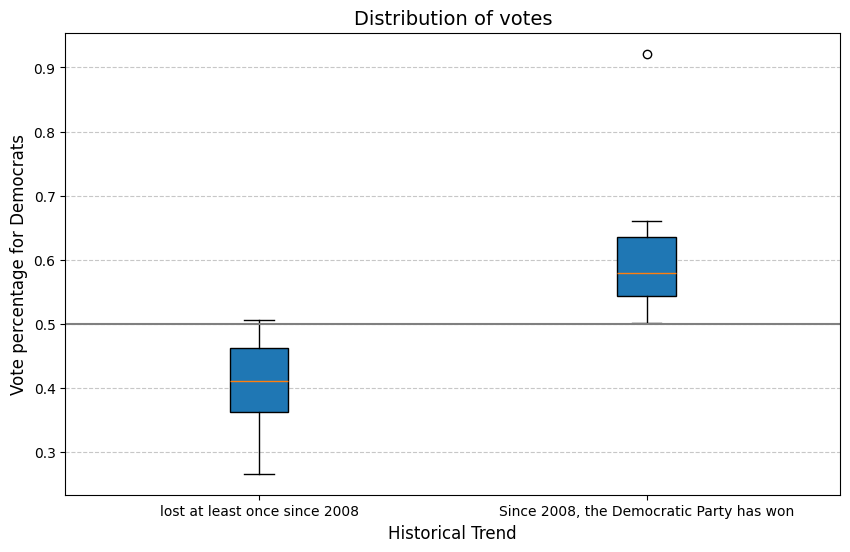

In [ ]:
#group by Dem Historical Trend the '% DEM 2020' column and then create a lst
grouped_data = df.groupby('Dem Historical Trend')['% DEM 2020'].apply(list)
#create a boxplot
plt.boxplot([grouped_data[0], grouped_data[1]],
            labels=["lost at least once since 2008", "Since 2008, the Democratic Party has won"],
            patch_artist=True)

plt.title("Distribution of votes", fontsize=14)
plt.xlabel("Historical Trend", fontsize=12)
plt.ylabel("Vote percentage for Democrats", fontsize=12)
plt.axhline(y = 0.5, color = 'grey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-33-e9b58f5d9f43>:4: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



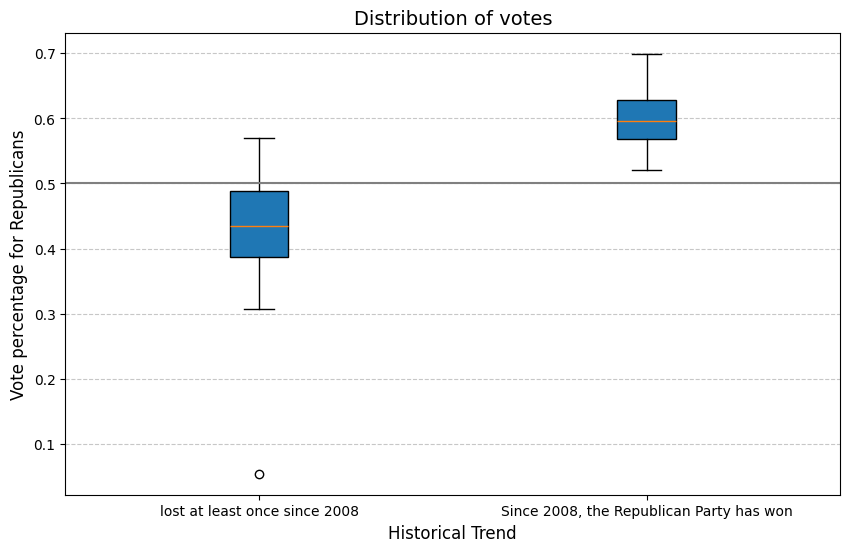

In [ ]:
#group by Rep Historical Trend the '% REP 2020' column and then create a lst
grouped_data = df.groupby('Rep Historical Trend')['% REP 2020'].apply(list)
# create a boxplot
plt.boxplot([grouped_data[0], grouped_data[1]],
            labels=["lost at least once since 2008", "Since 2008, the Republican Party has won"],
            patch_artist=True)

plt.title("Distribution of votes", fontsize=14)
plt.xlabel("Historical Trend", fontsize=12)
plt.ylabel("Vote percentage for Republicans", fontsize=12)
plt.axhline(y = 0.5, color = 'grey')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
#selecting only the states that have dummy = 0 and an ambiguous vote percentage
lst = df[(df['Dem Historical Trend'] == 0) &
         (df['Rep Historical Trend'] == 0) &
         ((df['% DEM 2020'].between(0.48, 0.52)) |
          (df['% REP 2020'].between(0.48, 0.52)))].index.tolist()

lst

['Arizona',
 'Florida',
 'Georgia',
 'Michigan',
 'North Carolina',
 'Pennsylvania',
 'Wisconsin']

In [ ]:
y = df['% DEM 2020'] # set the dependent var
X = df[['Dem Historical Trend']] #set the indipendent var
X = sm.add_constant(X) #add a constant, necessary to the linear regression

fit = sm.OLS(y, X).fit() #run the regression then fit the regression to the datas
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:             % DEM 2020   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     78.03
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           1.04e-11
Time:                        19:58:41   Log-Likelihood:                 60.373
No. Observations:                  51   AIC:                            -116.7
Df Residuals:                      49   BIC:                            -112.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4082 

# Turnout by ethnicities and swing states

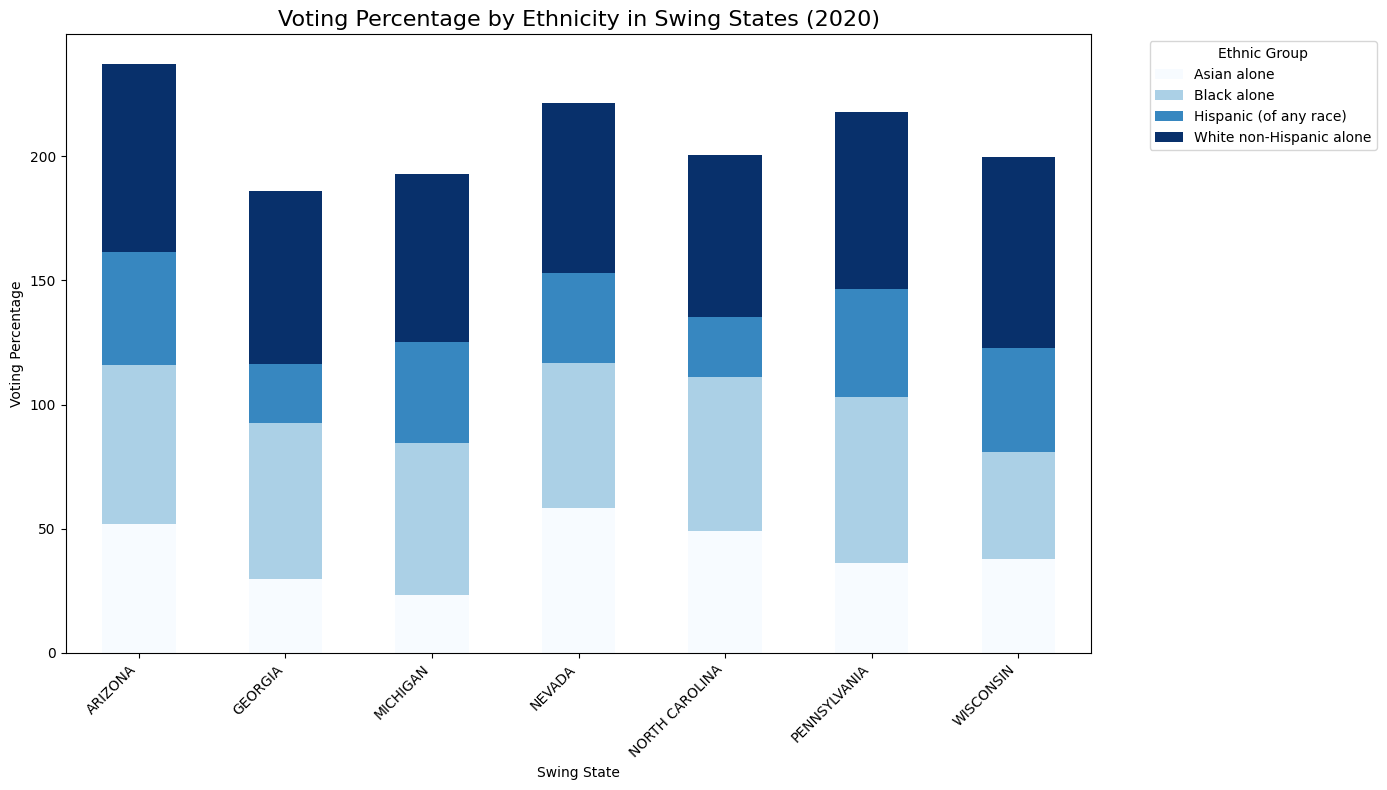

In [ ]:
# Continue from US-level ...
#
# -------------------------------------
# Step 2: Analyze data for swing states
swing_states = ['ARIZONA', 'GEORGIA', 'MICHIGAN', 'NORTH CAROLINA', 'NEVADA', 'PENNSYLVANIA', 'WISCONSIN']
data_swing_states = data[data['STATE'].isin(swing_states)]

# Group and analyze swing state data by ethnicity and state
swing_ethnicity_data = data_swing_states[
    ['STATE', 'Sex, Race, and Hispanic-Origin', 'Total population', 'Total voted']
]
swing_ethnicity_data = swing_ethnicity_data[swing_ethnicity_data['Sex, Race, and Hispanic-Origin'].isin(criteria)]
swing_ethnicity_data['Voting Percentage'] = (
    swing_ethnicity_data['Total voted'] / swing_ethnicity_data['Total population'] * 100
)

# Ensure that Voting Percentage is numeric
swing_ethnicity_data['Voting Percentage'] = pd.to_numeric(swing_ethnicity_data['Voting Percentage'], errors='coerce')

# Generate stacked barplot
stacked_data = swing_ethnicity_data.pivot(
    index='STATE',
    columns='Sex, Race, and Hispanic-Origin',
    values='Voting Percentage'
)

stacked_data.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='Blues')
plt.title('Voting Percentage by Ethnicity in Swing States (2020)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Voting Percentage')
plt.xlabel('Swing State')
plt.legend(title='Ethnic Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

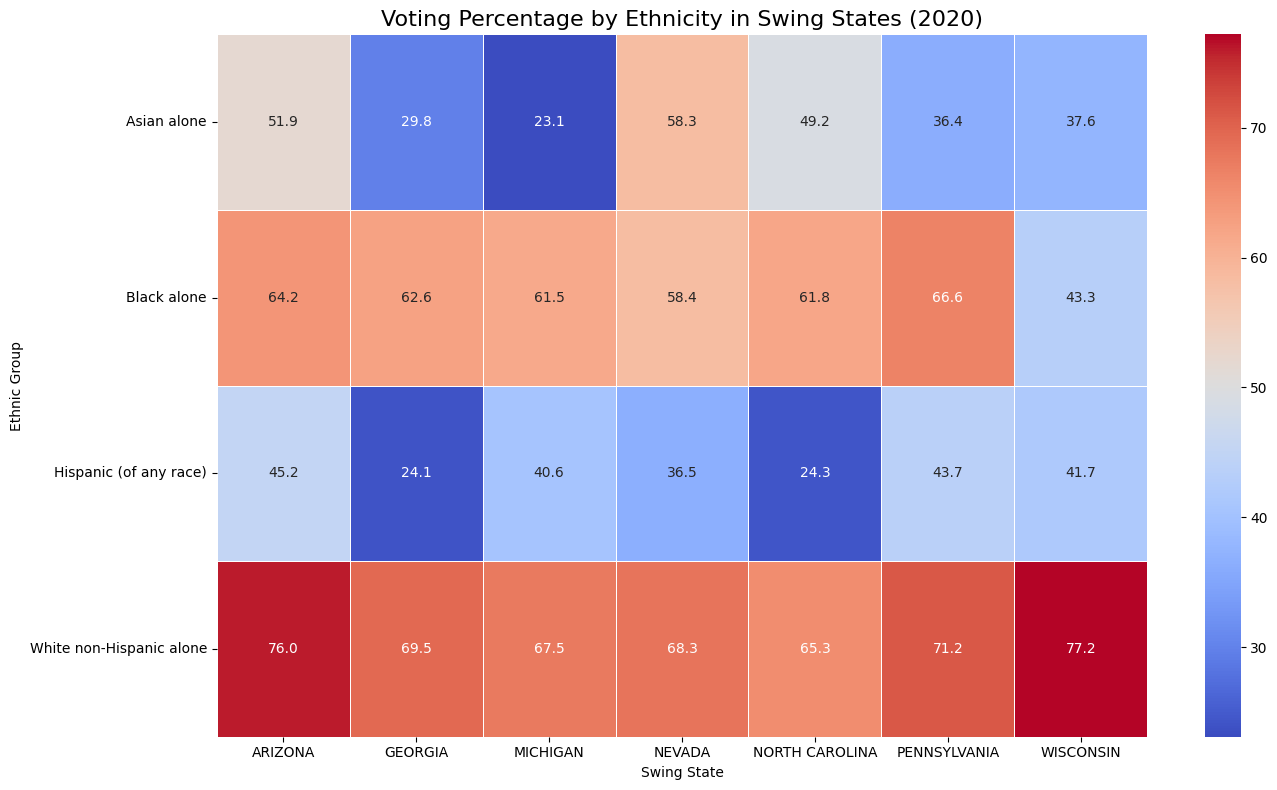

In [ ]:
# As alternative, an heatmap of the swing states turnout by ethnicites
#
# -------------------------------------
# Heatmap visualization
heatmap_data = swing_ethnicity_data.pivot(
    index='Sex, Race, and Hispanic-Origin',
    columns='STATE',
    values='Voting Percentage'
)

plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.1f',
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Voting Percentage by Ethnicity in Swing States (2020)',
          fontsize=16)
plt.xlabel('Swing State')
plt.ylabel('Ethnic Group')
plt.tight_layout()
plt.show()


In [ ]:
# -------------------------------------
# Save filtered swing state data to CSV
swing_ethnicity_data.to_csv('swing_states_ethnicity_analysis.csv', index=False)


# Voting preferences by ethnicities and swing states

In [ ]:
# Merging Census and APVoteCast

original_csv_path = "swing_states_ethnicity_analysis.csv"
aggregated_csv_path = "/content/file/aggregated_voting_percentages.csv"

# Data loading on jupyter notebook
original_data = pd.read_csv(original_csv_path)
aggregated_data = pd.read_csv(aggregated_csv_path)

# Assigning votes% from 'White' to 'White non-Hispanic alone'
original_data.loc[
    original_data['Sex, Race, and Hispanic-Origin'] == 'White non-Hispanic alone',
    ['Biden (%)', 'Trump (%)', 'Other (%)']
] = aggregated_data.loc[aggregated_data['Sex, Race, and Hispanic-Origin'] == 'White', ['Biden (%)', 'Trump (%)', 'Other (%)']].values

# Assigning votes% from 'Non-white' to specific ethnics
non_white_categories = ['Black alone', 'Asian alone', 'Hispanic (of any race)']
for category in non_white_categories:
    original_data.loc[
        original_data['Sex, Race, and Hispanic-Origin'] == category,
        ['Biden (%)', 'Trump (%)', 'Other (%)']
    ] = aggregated_data.loc[aggregated_data['Sex, Race, and Hispanic-Origin'] == 'Non-White', ['Biden (%)', 'Trump (%)', 'Other (%)']].values

# Saving to a new .csv file
final_csv_path = "updated_merged_swing_states_ethnicity_analysis.csv"
original_data.to_csv(final_csv_path, index=False)


<ipython-input-40-000d8f8441a7>:31: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '977.85' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-40-000d8f8441a7>:32: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1383.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-40-000d8f8441a7>:33: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23.85' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-40-000d8f8441a7>:31: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '943.04' has dtype incompatible with int64, please

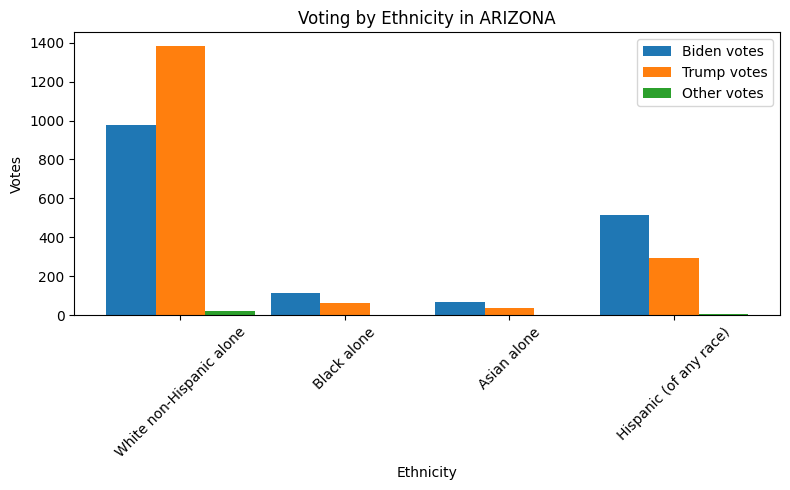

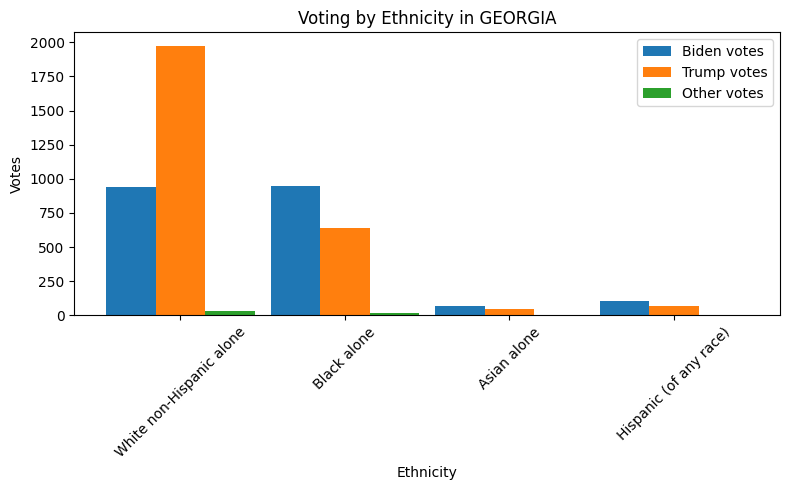

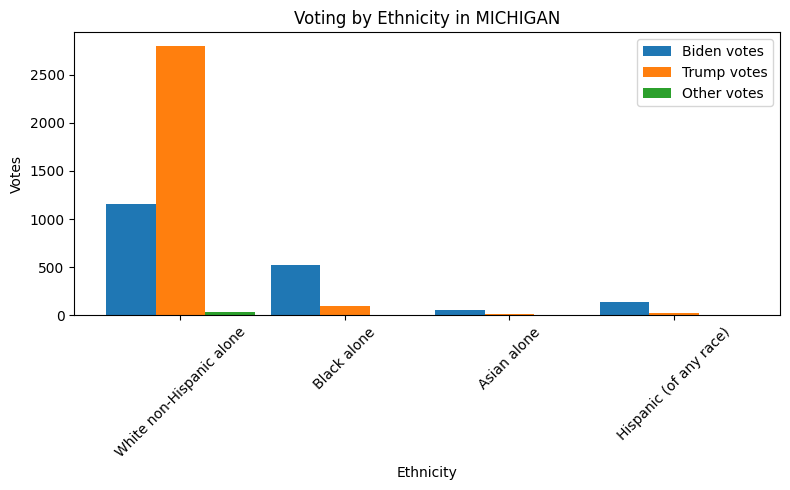

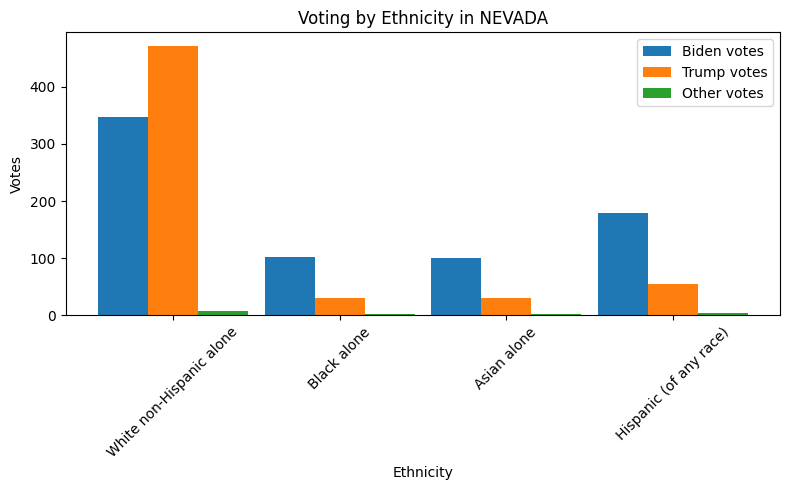

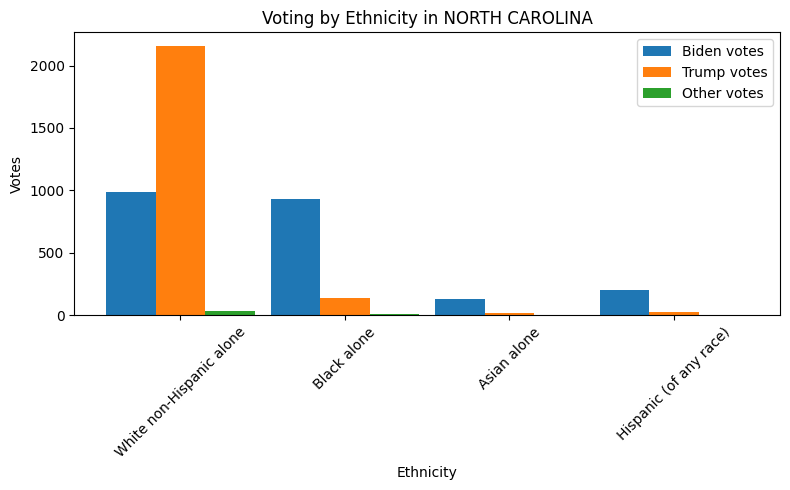

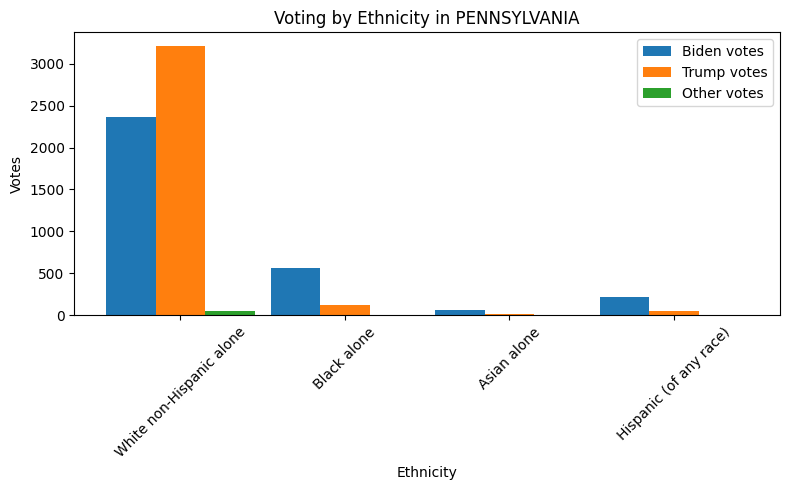

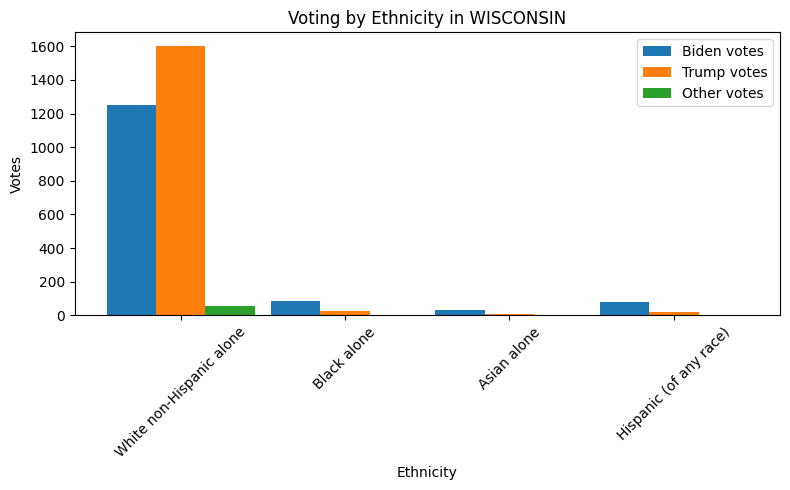

In [ ]:
# Load the dataset
file_path = 'updated_merged_swing_states_ethnicity_analysis.csv'
data = pd.read_csv(file_path)

# Define non-white categories
non_white_categories = [
    "Black alone",
    "Asian alone",
    "Hispanic (of any race)"
]

# Add a column to classify as "Non-white" or "White"
data['Non-white'] = data['Sex, Race, and Hispanic-Origin'].apply(
    lambda x: "Non-white" if x in non_white_categories else "White"
)

# --- ATTENTION: the following is an hypothetic scenario, based on the own datasets ---
# Modify percentages to be proportionate to each ethnicity's total population within each state

data['Biden votes'] = 0
data['Trump votes'] = 0
data['Other votes'] = 0

def calculate_votes(group):
    for index, row in group.iterrows():
        biden_votes = (row['Total voted'] * row['Biden (%)']) / 100
        trump_votes = (row['Total voted'] * row['Trump (%)']) / 100
        other_votes = (row['Total voted'] * row['Other (%)']) / 100

        # Normalize percentages to ensure they sum to 100%
        group.at[index, 'Biden votes'] = biden_votes
        group.at[index, 'Trump votes'] = trump_votes
        group.at[index, 'Other votes'] = other_votes

    return group

# Apply adjustment for each state
data = data.groupby(['STATE']).apply(calculate_votes)

# Visualize the updated data
states = data['STATE'].unique()
for state in states:
    state_data = data[data['STATE'] == state]
    plt.figure(figsize=(8, 5))

    x = range(len(state_data))

    plt.bar(x, state_data['Biden votes'], width=0.3, label='Biden votes', align='center')
    plt.bar([p + 0.3 for p in x], state_data['Trump votes'], width=0.3, label='Trump votes', align='center')
    plt.bar([p + 0.6 for p in x], state_data['Other votes'], width=0.3, label='Other votes', align='center')

    plt.title(f'Voting by Ethnicity in {state}')
    plt.xlabel('Ethnicity')
    plt.ylabel('Votes')
    plt.xticks([p + 0.3 for p in x], state_data['Sex, Race, and Hispanic-Origin'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


Following a log-scale for a better view of preferences

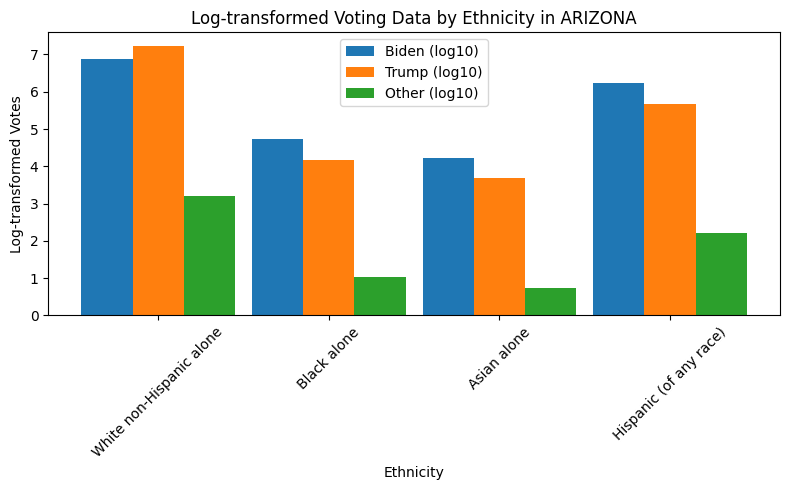

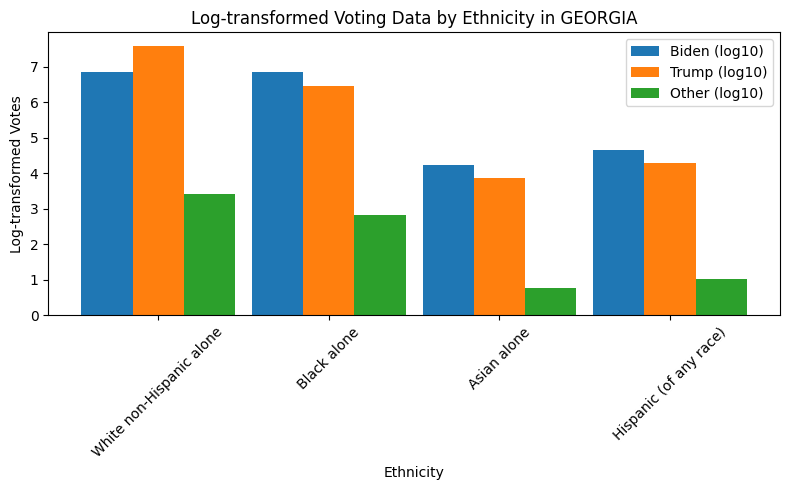

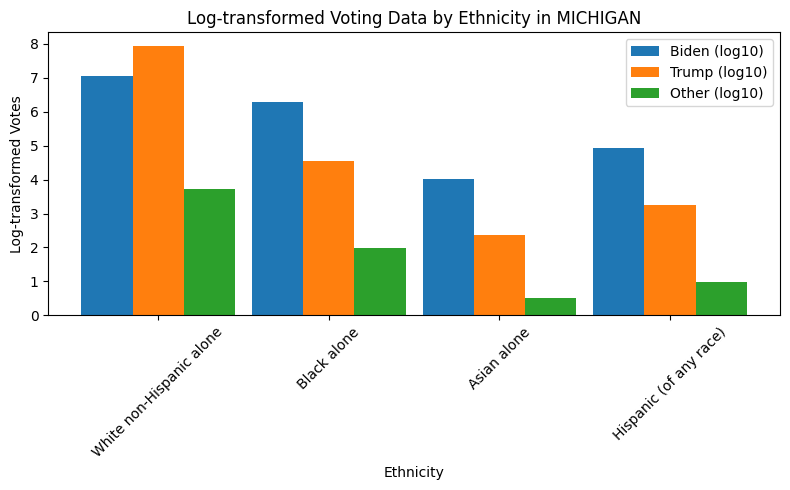

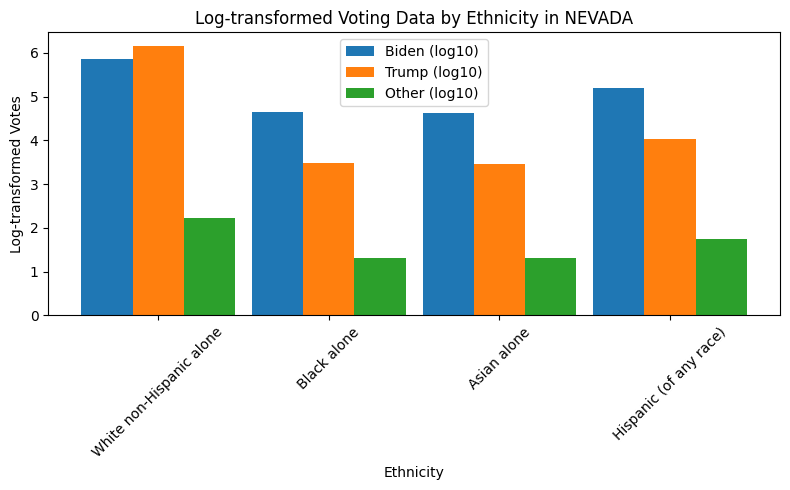

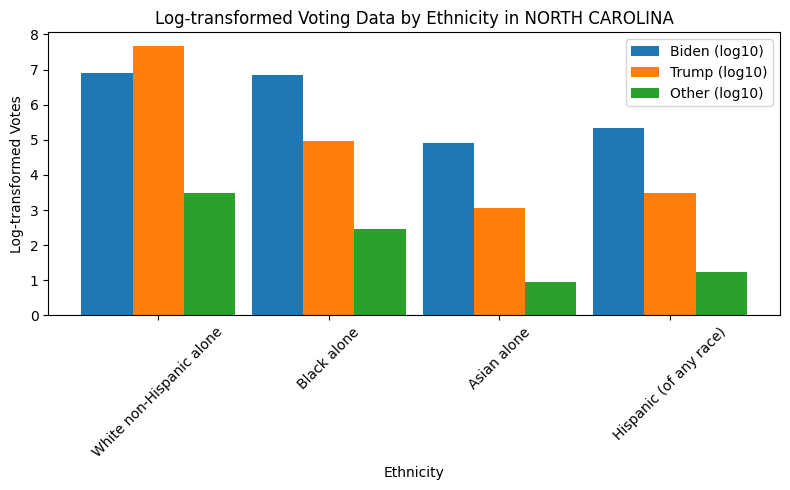

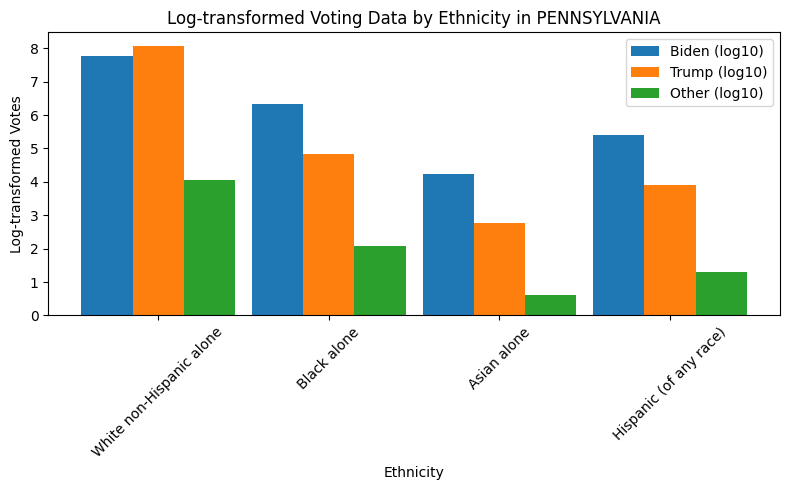

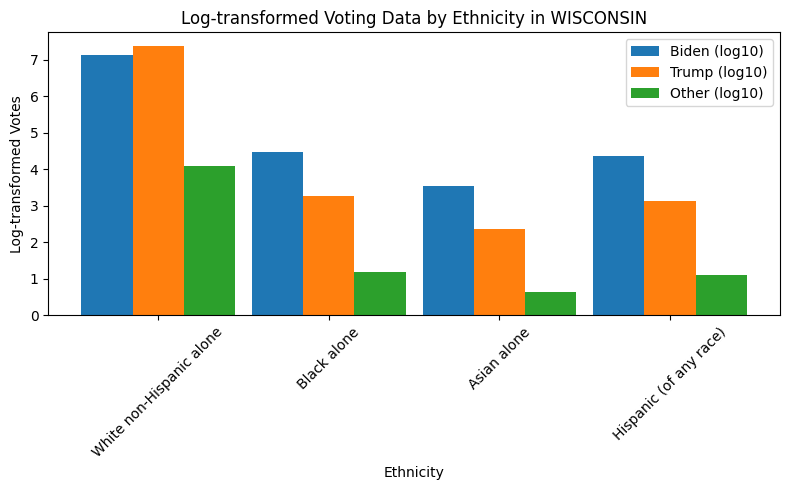

In [ ]:
# Visualize the updated data in a log scale
states = data['STATE'].unique()
for state in states:
    state_data = data[data['STATE'] == state]
    plt.figure(figsize=(8, 5))

    x = range(len(state_data))

    # Logaritmic transformation
    biden_votes_log = np.log1p(state_data['Biden votes'])
    trump_votes_log = np.log1p(state_data['Trump votes'])
    other_votes_log = np.log1p(state_data['Other votes'])

    plt.bar(x, biden_votes_log, width=0.3, label='Biden (log10)', align='center')
    plt.bar([p + 0.3 for p in x], trump_votes_log, width=0.3, label='Trump (log10)', align='center')
    plt.bar([p + 0.6 for p in x], other_votes_log, width=0.3, label='Other (log10)', align='center')

    plt.title(f'Log-transformed Voting Data by Ethnicity in {state}')
    plt.xlabel('Ethnicity')
    plt.ylabel('Log-transformed Votes')
    plt.xticks([p + 0.3 for p in x], state_data['Sex, Race, and Hispanic-Origin'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


Sublots (for an aggregated view)

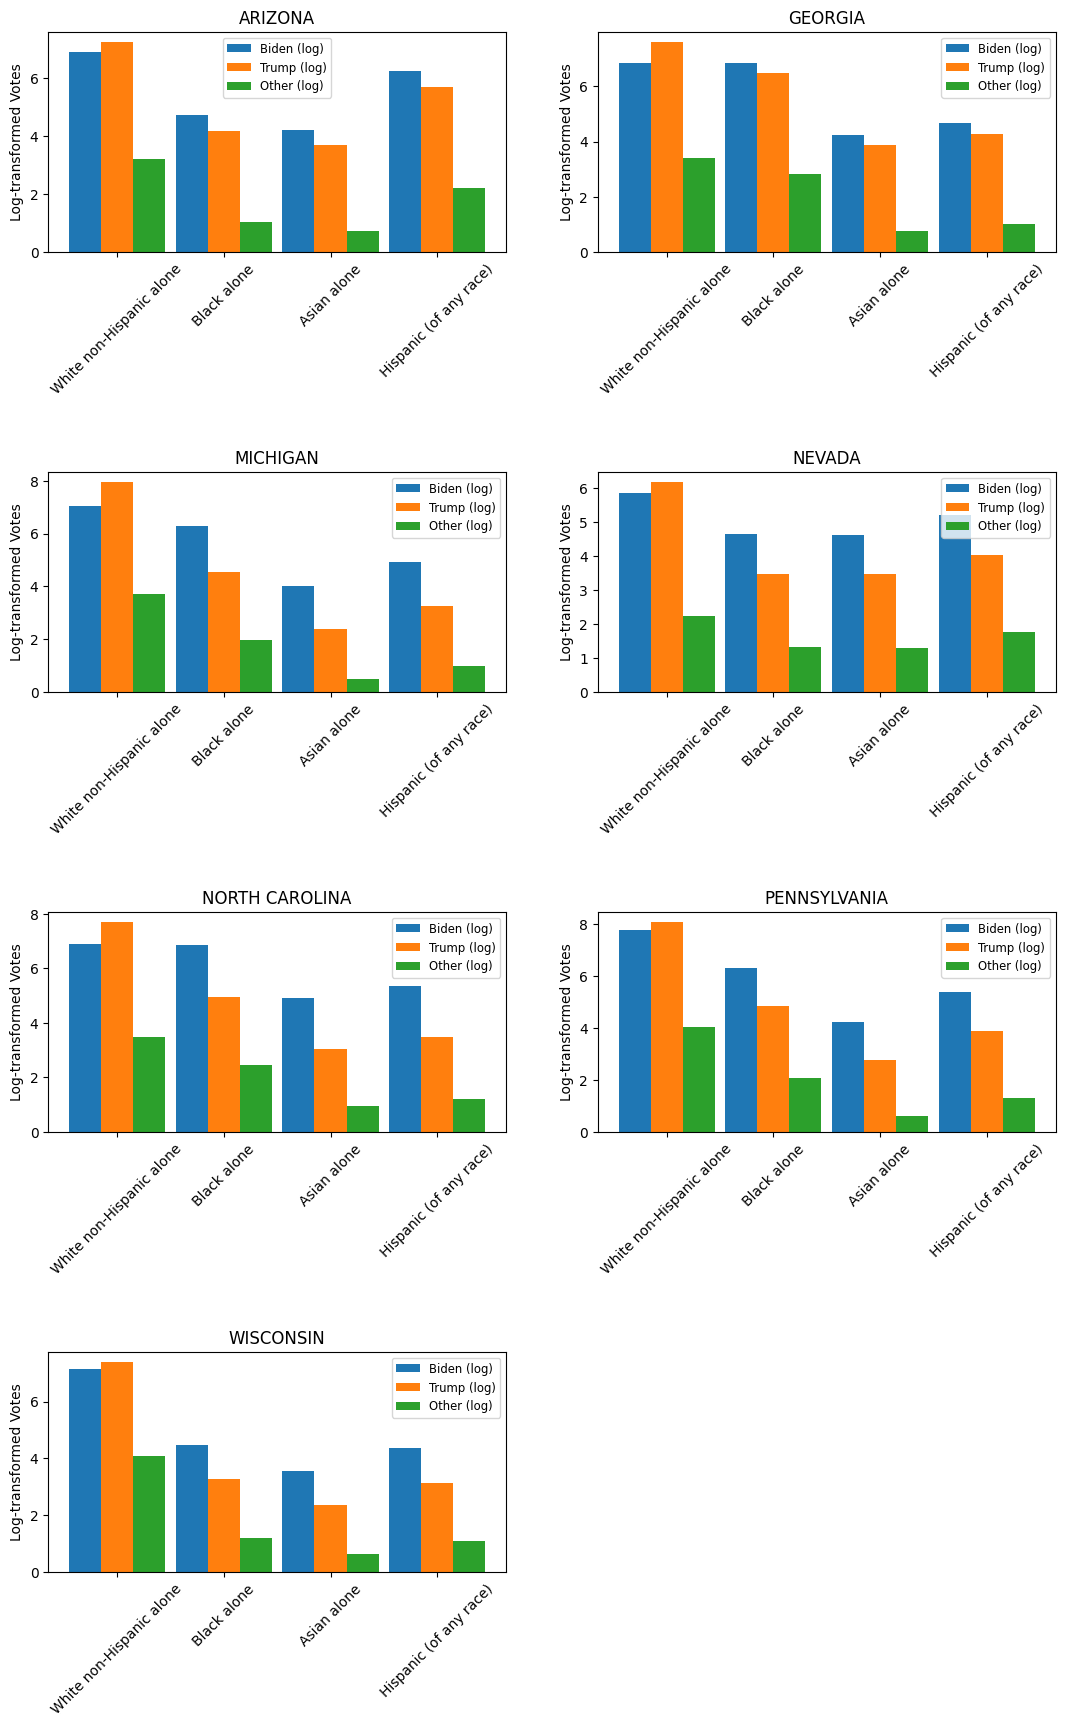

In [ ]:
# Setting the subplots (grid)
n_states = len(states)
cols = 2  # Number of columns
rows = (n_states + cols - 1) // cols  # Number of rows

fig, axs = plt.subplots(rows, cols, figsize=(13, 5 * rows))
axs = axs.flatten()


# Graphs generation
for i, state in enumerate(states):
    state_data = data[data['STATE'] == state]
    x = range(len(state_data))

    # Log-transformation
    biden_votes_log = np.log1p(state_data['Biden votes'])
    trump_votes_log = np.log1p(state_data['Trump votes'])
    other_votes_log = np.log1p(state_data['Other votes'])

    # Subplot graph
    ax = axs[i]
    ax.bar(x, biden_votes_log, width=0.3, label='Biden (log)', align='center')
    ax.bar([p + 0.3 for p in x], trump_votes_log, width=0.3, label='Trump (log)', align='center')
    ax.bar([p + 0.6 for p in x], other_votes_log, width=0.3, label='Other (log)', align='center')

    ax.set_title(f'{state}')
    ax.set_ylabel('Log-transformed Votes')
    ax.set_xticks([p + 0.3 for p in x])
    ax.set_xticklabels(state_data['Sex, Race, and Hispanic-Origin'], rotation=45)
    ax.legend(fontsize='small')

# Remove blanck spaces
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.subplots_adjust(hspace=1, wspace=0.2)  # hspace: margine verticale, wspace: margine orizzontale
plt.show()


In [ ]:
# Save the modified dataset
data.to_csv('adjusted_swing_states_ethnicity_analysis.csv', index=False)


# Hypothesis test (regression)
historical trend

In [ ]:
#creating a list of variables except for those on which the regression has already been run
df = pd.read_excel('/content/file/REGRESSIONE.xlsx') #importing files
lst = [col for col in df.columns if col not in [df.columns[0], df.columns[1],
                                                df.columns[2], df.columns[3]]]

#plotting each graph to verify the relationship with the dependent variable

for i in lst:
    fig = px.scatter(
        x=df[i],
        y=df['% DEM 2020'],
        # display the variable name on each label
        labels={'x': i, 'y': 'Percentage of Democratic Votes'},
        title=f"{i} vs Percentage of Democratic Votes",
        trendline  = 'ols', trendline_scope = 'overall') #plotting on the same scatterplot a regression line

    fig.show()

In [ ]:
y = df['% DEM 2020'] #setting the dependent variable

X = df[['Dem Historical Trend', 'Avg Age', 'Avg Hourly Earnings ($)',
        'Avg Unemployment Rate ', '% non-White']]
X = sm.add_constant(X) #adding the constant

model = sm.OLS(y, X).fit() #apply the multivariate model to the data
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             % DEM 2020   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     44.56
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           2.50e-16
Time:                        19:59:22   Log-Likelihood:                 81.560
No. Observations:                  51   AIC:                            -151.1
Df Residuals:                      45   BIC:                            -139.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# Topics Analysis

In [ ]:
# Import an Excel file and display the main data
file_path = '/content/file/MainThemeData.xlsx'
df = pd.read_excel(file_path)  # Reads the data from the Excel file
display(df)  # Displays the dataframe
print('------------------------')
print(df.info())  # Prints information about the dataframe (column types, memory usage, etc.)
print(df.isnull().sum())  # Counts the number of null values in each column

State     Division  Abortion legal  Abortion illegal  \
0    National        White            0.57              0.43   
1    National    Non-white            0.67              0.33   
2    National          Men            0.57              0.43   
3    National        Women            0.61              0.39   
4    National   No college            0.56              0.44   
..        ...          ...             ...               ...   
75  Wisconsin      College            0.59              0.41   
76  Wisconsin     under 45            0.62              0.38   
77  Wisconsin      over 45            0.53              0.47   
78  Wisconsin  Biden voter            0.83              0.17   
79  Wisconsin  Trump voter            0.28              0.72   

    US-Mexico Wall pro  US-Mexico Wall against  Gun laws more strict  \
0                 0.54                    0.46                  0.48   
1                 0.32                    0.68                  0.68   
2                 0.54                    0.42                  0.47   
3                 0.44                    0.54                  0.59   
4                 0.53                    0.47                  0.48   
..                 ...                     ...                   ...   
75                0.42                    0.58                  0.62   
76                0.36                    0.64                  0.54   
77                0.49                    0.51                  0.49   
78                0.08                    0.92                  0.84   
79                0.88                    0.12                  0.22   

    Gun laws no more strict  Climate change concerned  \
0                      0.52                      0.65   
1                      0.32                      0.77   
2                      0.52                      0.65   
3                      0.48                      0.75   
4                      0.52                      0.67   
..                      ...                       ...   
75                     0.38                      0.71   
76                     0.46                      0.69   
77                     0.51                      0.64   
78                     0.16                      0.94   
79                     0.78                      0.42   

    Climate change no concerced  import tax favor  import tax oppose  
0                          0.35              0.62               0.38  
1                          0.23              0.53               0.47  
2                          0.35              0.61               0.39  
3                          0.25              0.59               0.41  
4                          0.33              0.62               0.38  
..                          ...               ...                ...  
75                         0.29              0.59               0.41  
76                         0.31              0.53               0.47  
77                         0.36              0.68               0.32  
78                         0.06              0.52               0.48  
79                         0.58              0.75               0.25  

[80 rows x 12 columns]

------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        80 non-null     object 
 1   Division                     80 non-null     object 
 2   Abortion legal               79 non-null     float64
 3   Abortion illegal             79 non-null     float64
 4   US-Mexico Wall pro           79 non-null     float64
 5   US-Mexico Wall against       79 non-null     float64
 6   Gun laws more strict         79 non-null     float64
 7   Gun laws no more strict      79 non-null     float64
 8   Climate change concerned     79 non-null     float64
 9   Climate change no concerced  79 non-null     float64
 10  import tax favor             79 non-null     float64
 11  import tax oppose            79 non-null     float64
dtypes: float64(10), object(2)
memory usage: 7.6+ KB
None
St

Definitions of some recurring functions that will be used in various analyses:

In [ ]:
# Function to save and display a plot
def save_and_show_plot(title, ax):
    ax.set_title(title, fontsize=14)  # Sets the plot title
    ax.set_xlabel('')  # Removes the x-axis label
    ax.set_ylabel('% Favorable', fontsize=12)  # Sets the y-axis label
    ax.set_ylim(0, 1)  # Limits the y-axis between 0 and 1
    plt.xticks(rotation=45, ha='right')  # Rotates the x-axis labels for better readability
    plt.tight_layout()  # Optimizes the layout of the plot
    plt.show()  # Displays the plot

# Function to create a bar chart with specific categories
def plot_bars(ax, x, width, data, categories, colors, label_key):
    for i, category in enumerate(categories):  # Iterate over categories
        subset = data[data[label_key] == category]  # Filter data by category
        ax.bar([pos + i * width for pos in x], subset['Percentage'],
               width=width, label=category, color=colors[i])  # Create bars for the category

# Generic function to create analyses with bar charts
def generic_analysis(data, x_labels, title, categories, colors, label_key):
    fig, ax = plt.subplots(figsize=(12, 8))  # Creates a figure with specified size
    x = range(len(x_labels))  # Generates positions on the x-axis
    width = 0.8 / len(categories)  # Calculates bar width
    if colors is None:
        colors = plt.cm.tab10.colors[:len(categories)]  # Uses a default color palette
    plot_bars(ax, x, width, data, categories, colors, label_key)  # Draws the bars
    ax.set_xticks([pos + width * (len(categories) - 1) / 2 for pos in x])  # Sets x-axis tick positions
    ax.set_xticklabels(x_labels)  # Sets x-axis labels
    ax.legend(title=label_key)  # Adds a legend with a title
    save_and_show_plot(title, ax)  # Saves and shows the plot

# Define colors for specific category pairs
pair_colors = {
    ('White', 'Non-white'): ('#1f77b4', '#aec7e8'),
    ('Men', 'Women'): ('#ff7f0e', '#ffbb78'),
    ('No college', 'College'): ('#2ca02c', '#98df8a'),
    ('under 45', 'over 45'): ('#d62728', '#ff9896'),
    ('Biden voter', 'Trump voter'): ('#0015BC', '#DC143C')
}

# Colors for individual categories
colors = {
    'White': '#1f77b4',
    'Non-white': '#aec7e8',
    'Men': '#ff7f0e',
    'Women': '#ffbb78',
    'No college': '#2ca02c',
    'College': '#98df8a',
    'under 45': '#d62728',
    'over 45': '#ff9896',
    'Biden voter': '#0015BC',
    'Trump voter': '#DC143C'
}

# Pairs of categories for analysis
pairs = [
        ('White', 'Non-white'),
        ('Men', 'Women'),
        ('No college', 'College'),
        ('under 45', 'over 45'),
        ('Biden voter', 'Trump voter')
]

## Global analysis

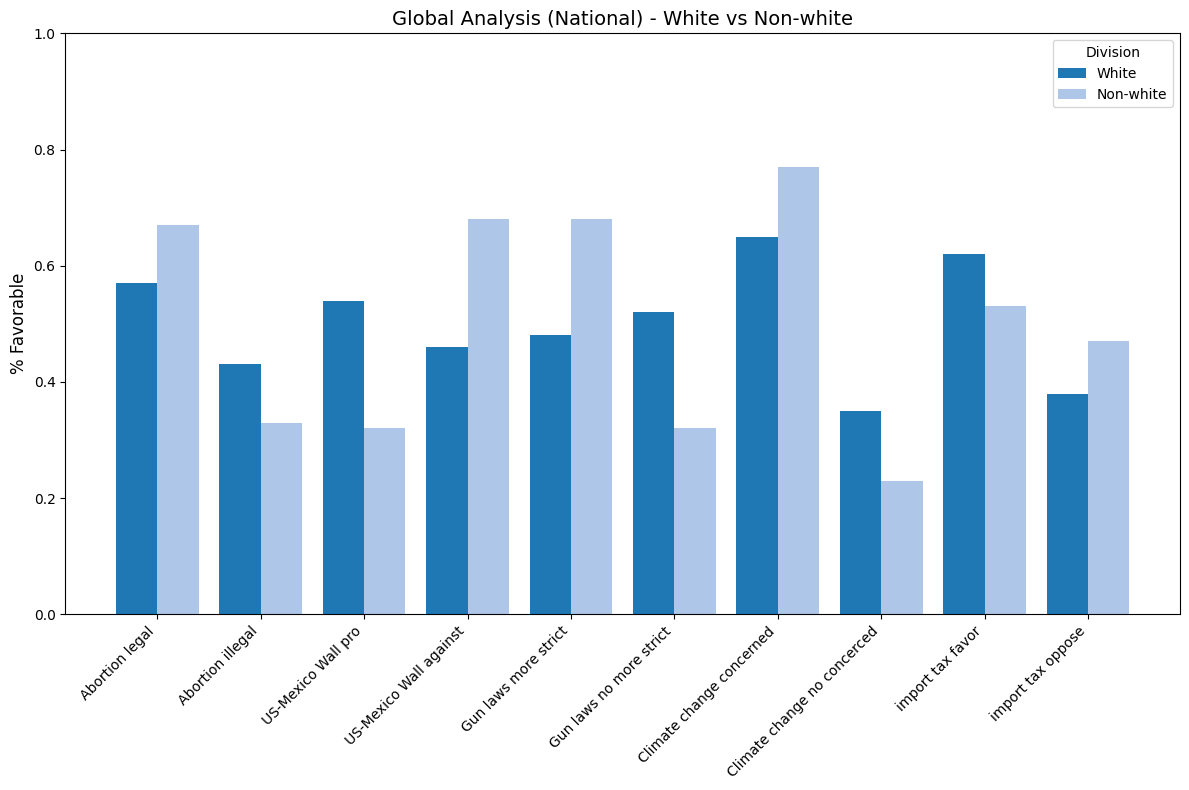

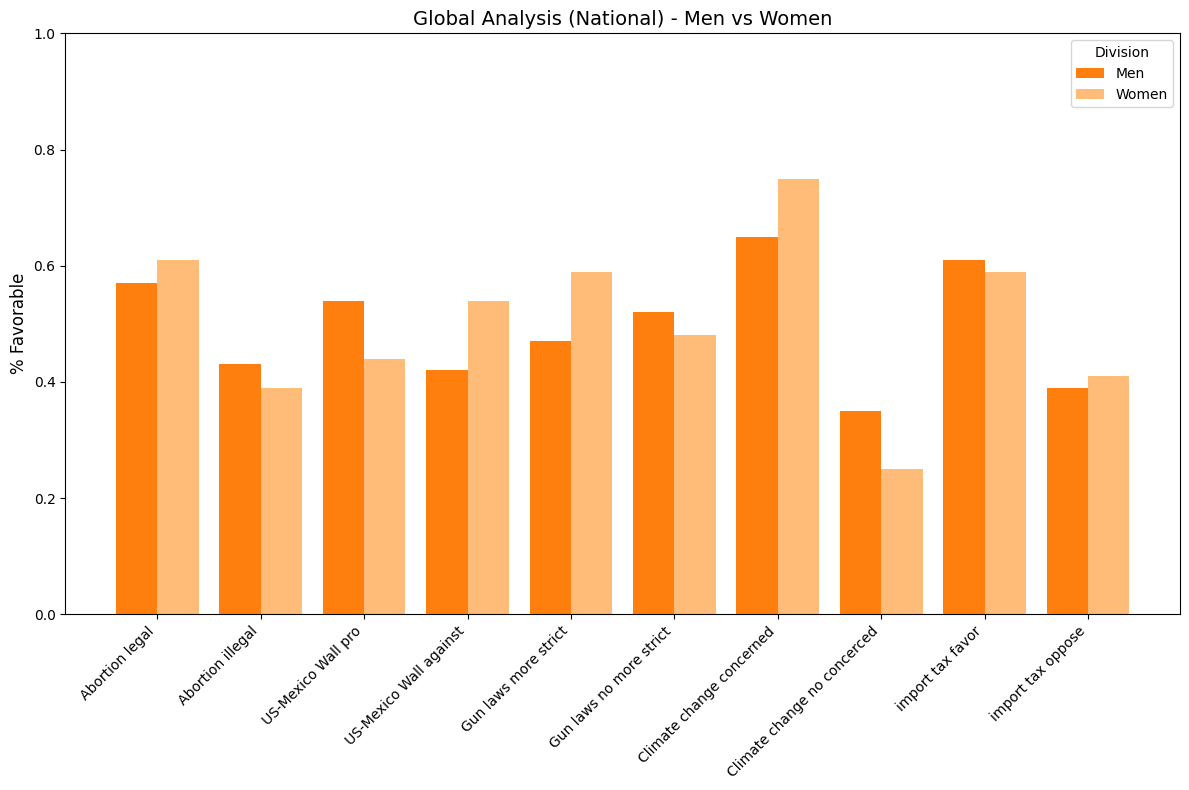

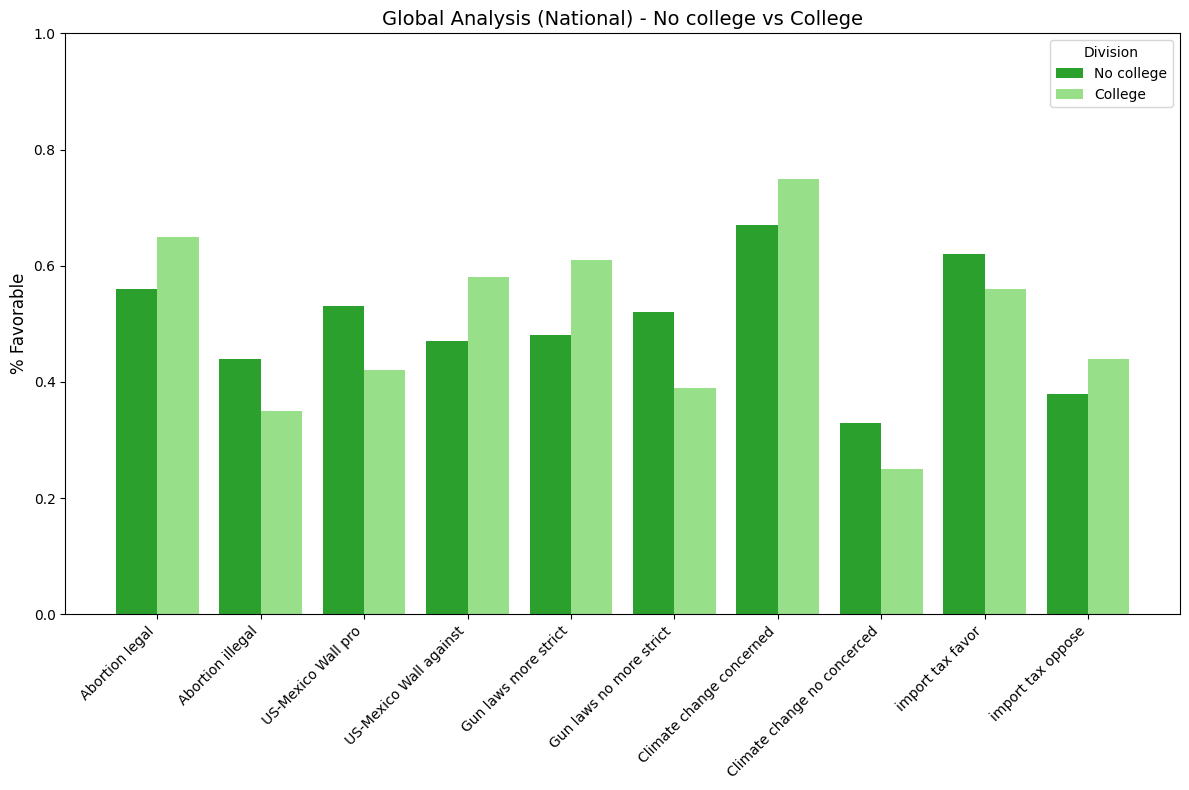

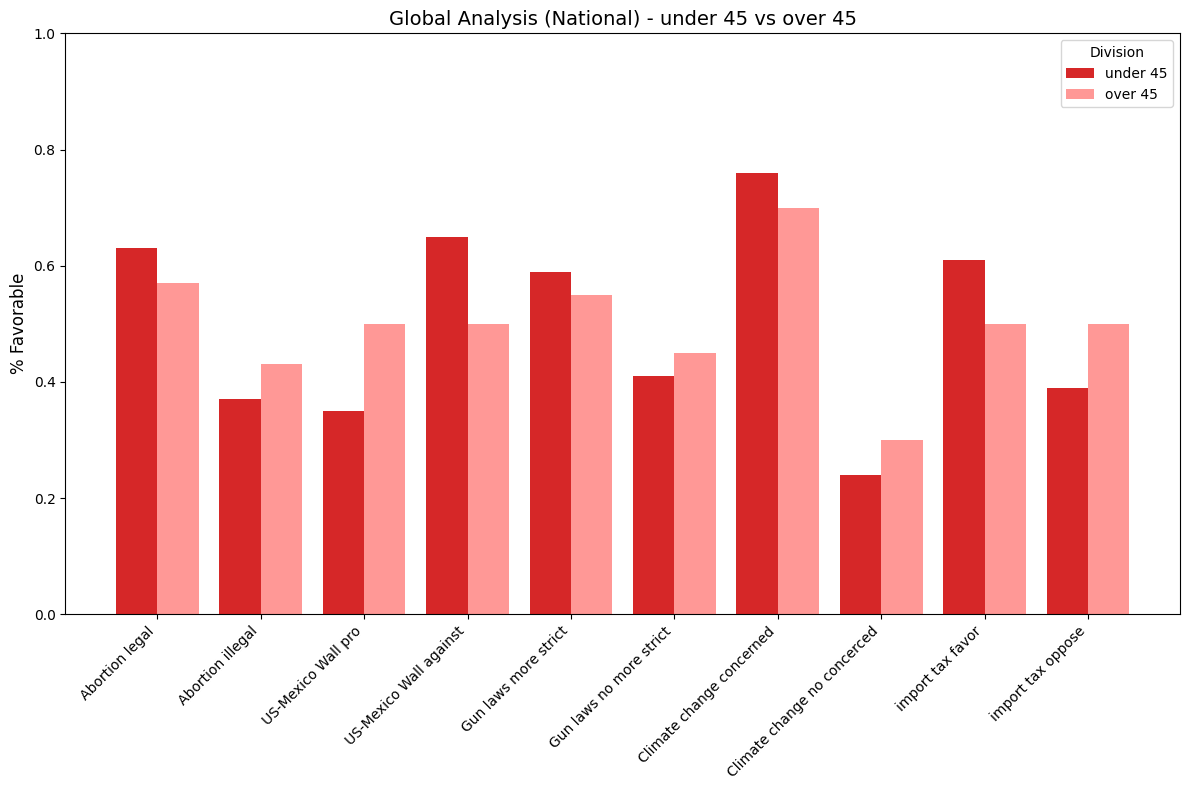

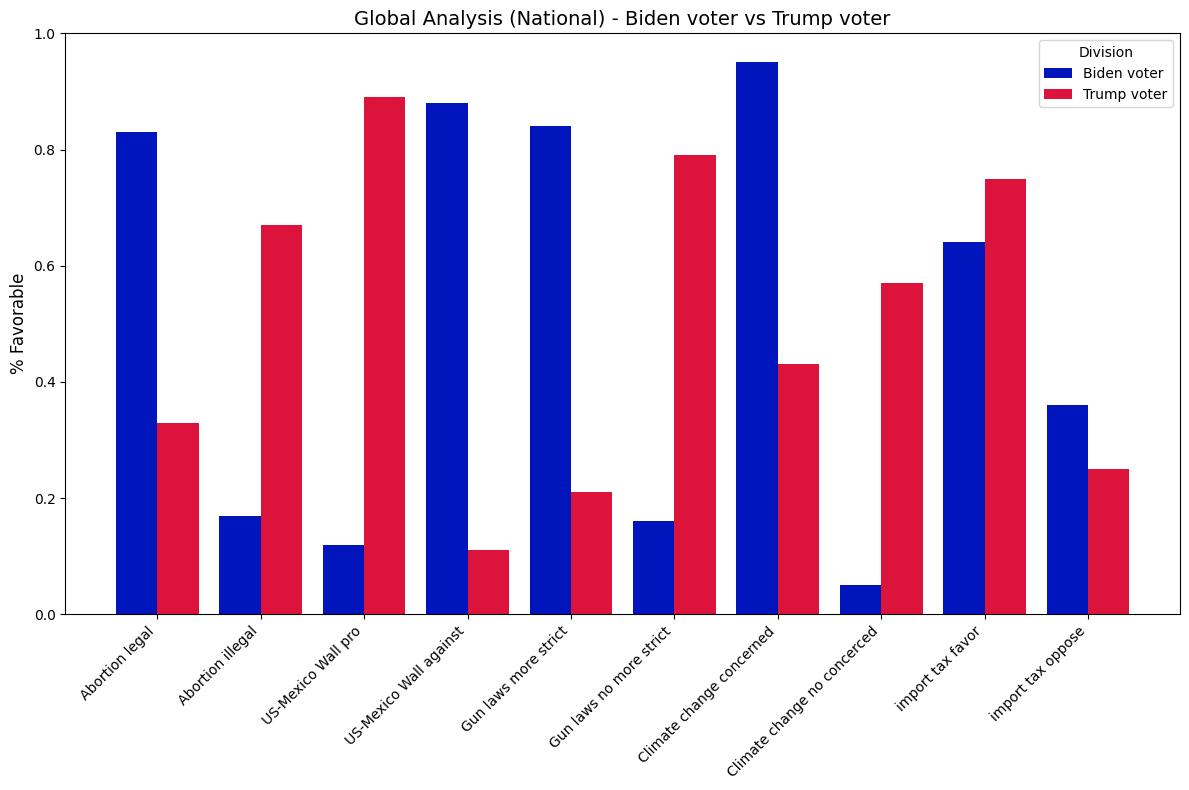

In [ ]:
national_data = df[df['State'] == 'National'] # Filter national data

# Global analysis for category pairs
def global_analysis_by_pairs():
    for pair in pairs:  # Iterate over each pair
        pair_data = national_data[national_data['Division'].isin(pair)]  # Filter data by pair
        melted_data = pair_data.melt(id_vars=['State', 'Division'],
                                     var_name='Theme',
                                     value_name='Percentage')  # Transform data to long format
        themes = melted_data['Theme'].unique()  # Get unique themes
        colors = pair_colors.get(pair)  # Get colors for the pair
        generic_analysis(melted_data, themes,
                         f'Global Analysis (National) - {pair[0]} vs {pair[1]}',
                         pair, colors, 'Division')  # Perform the generic analysis
global_analysis_by_pairs() # Execute analyses

## Analysis by state

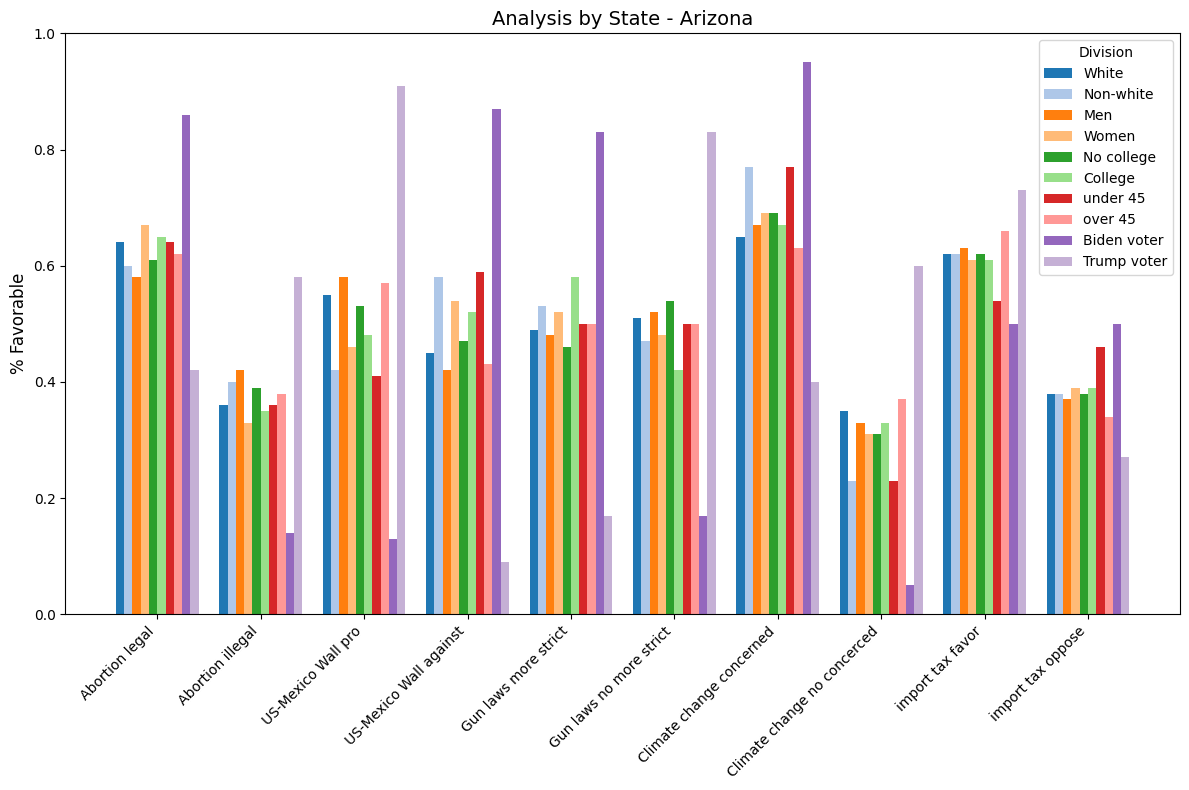

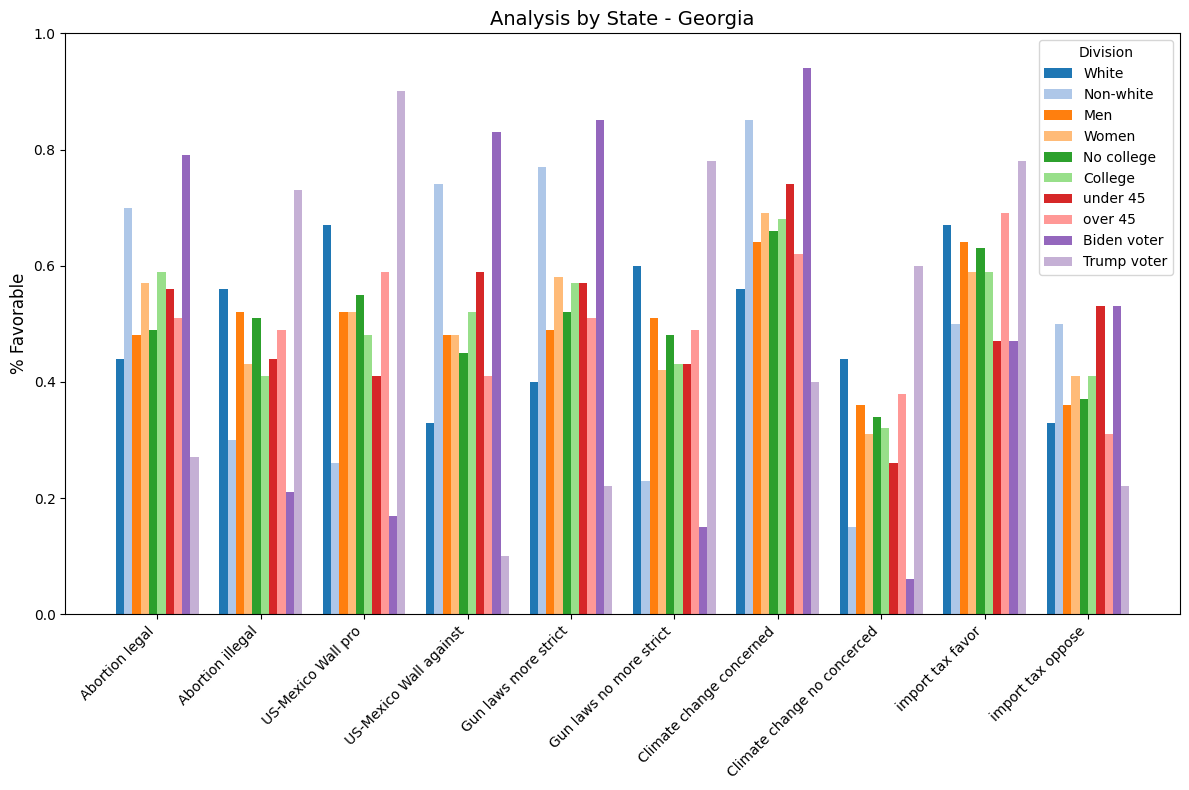

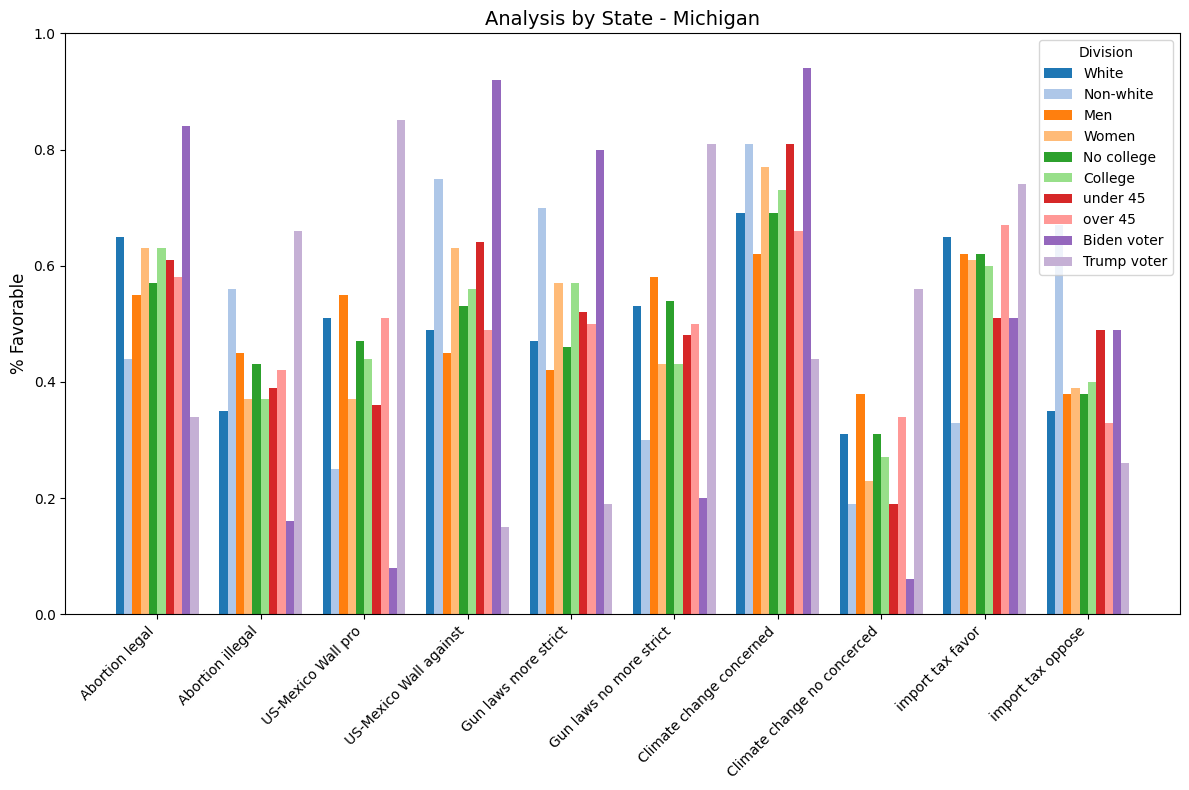

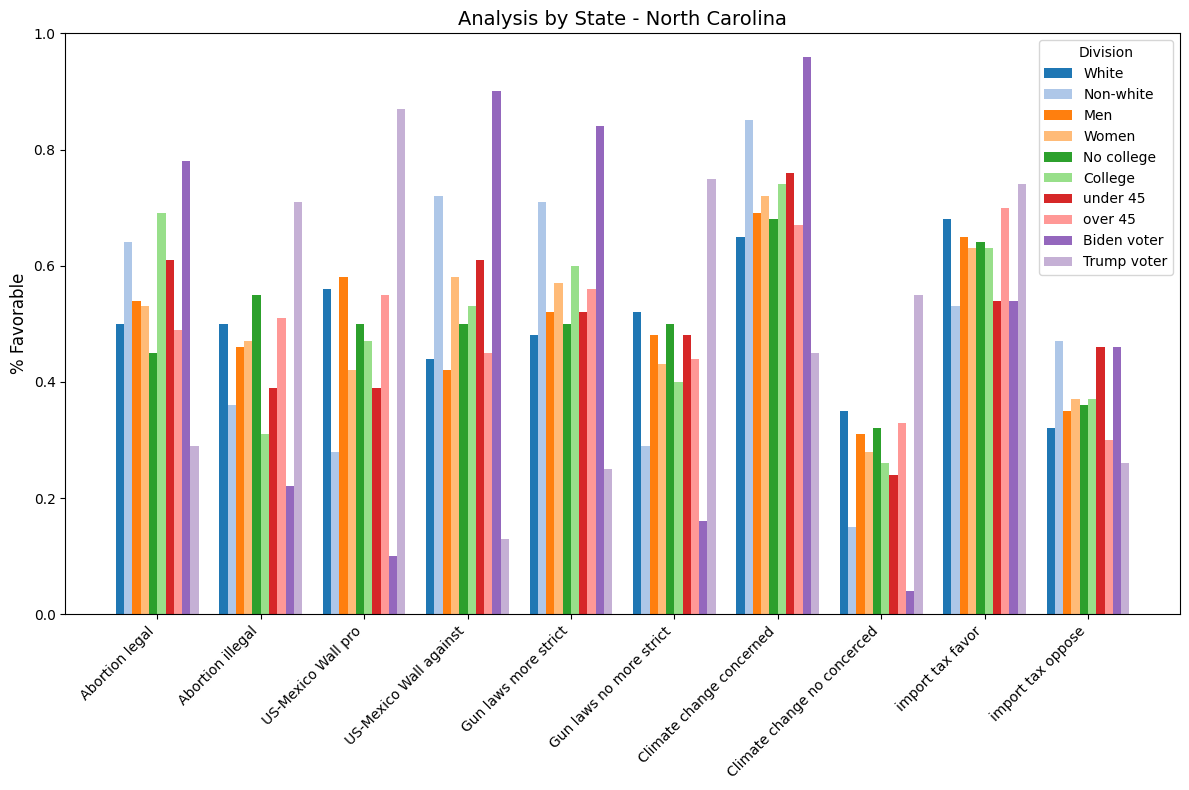

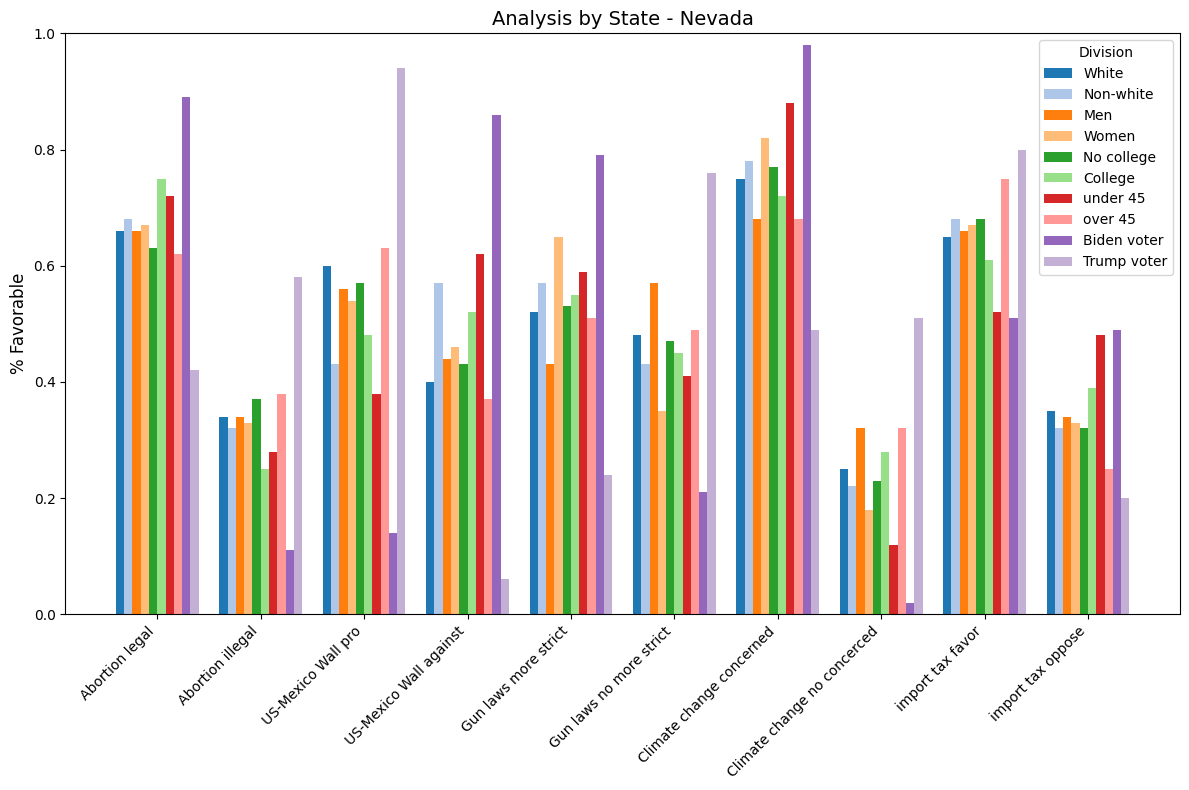

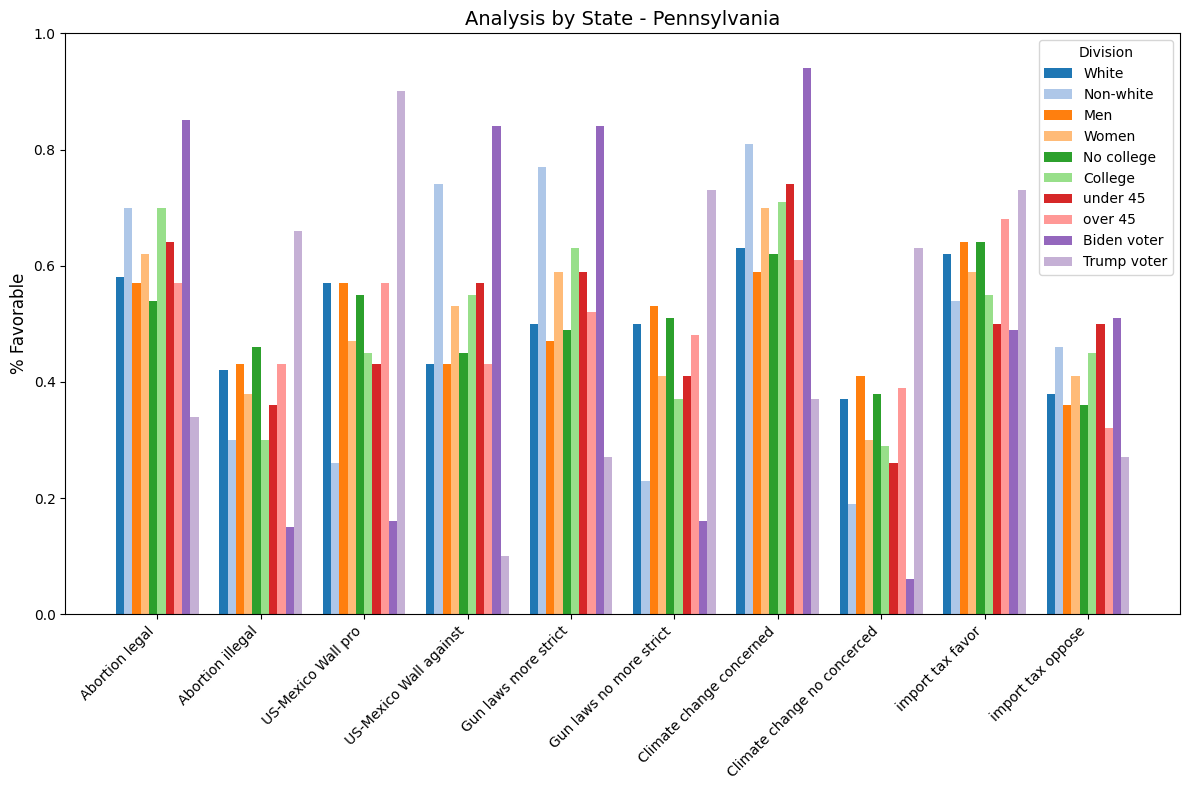

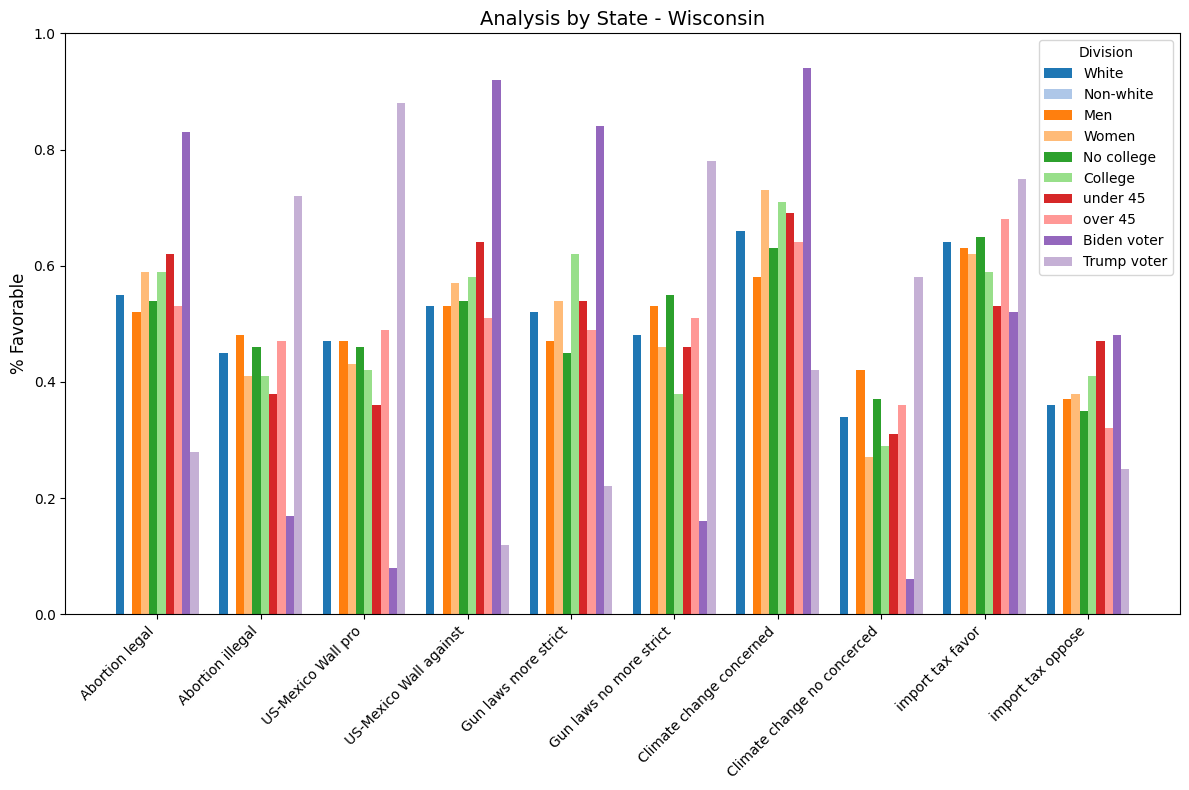

In [ ]:
# Analysis by state
def state_analysis():
    states = df['State'].unique()  # Get all unique states
    for state in states:
        if state != 'National':  # Exclude national data
            state_data = df[df['State'] == state]  # Filter data by state
            melted_data = state_data.melt(id_vars=['State', 'Division'],
                                          var_name='Theme',
                                          value_name='Percentage')
            themes = melted_data['Theme'].unique()
            divisions = melted_data['Division'].unique()
            colors = plt.cm.tab20.colors[:len(divisions)]  # Use a predefined color palette
            generic_analysis(melted_data, themes,
                             f'Analysis by State - {state}',
                             divisions, colors, 'Division')
state_analysis() # Execute analyses

## Analysis by topics
differences between swing states

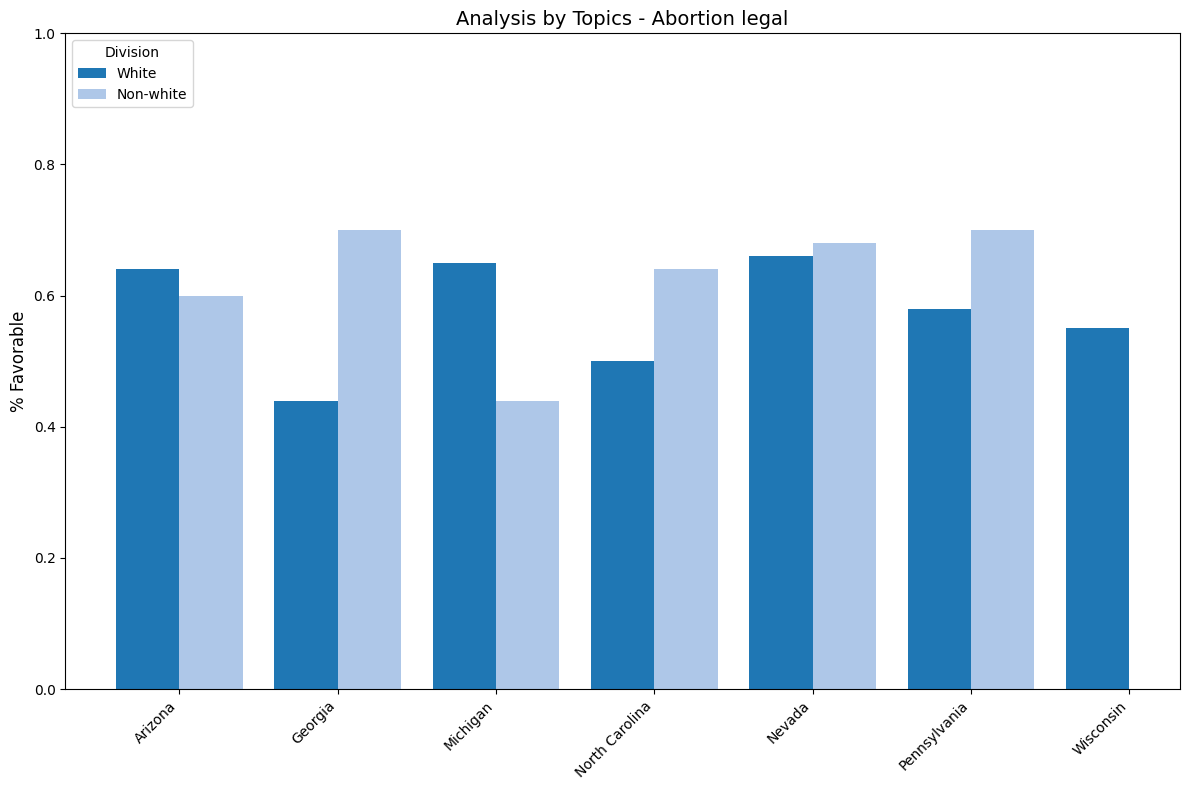

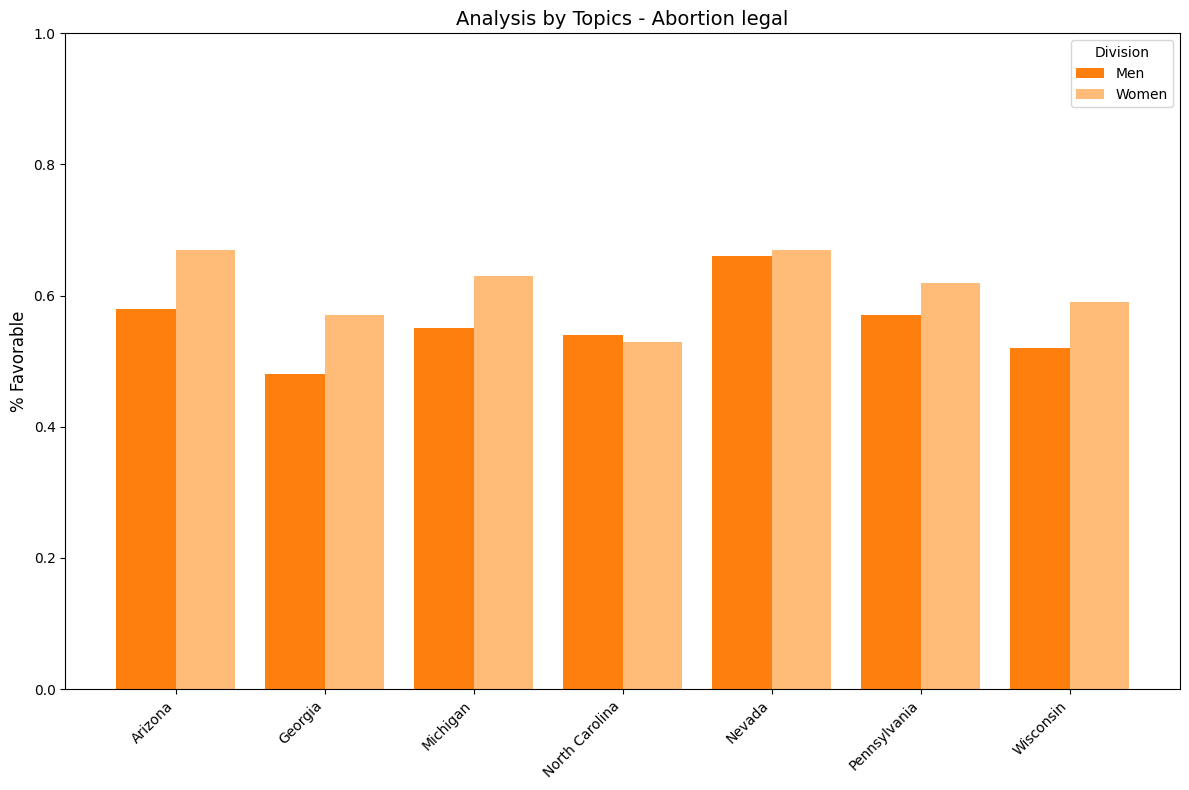

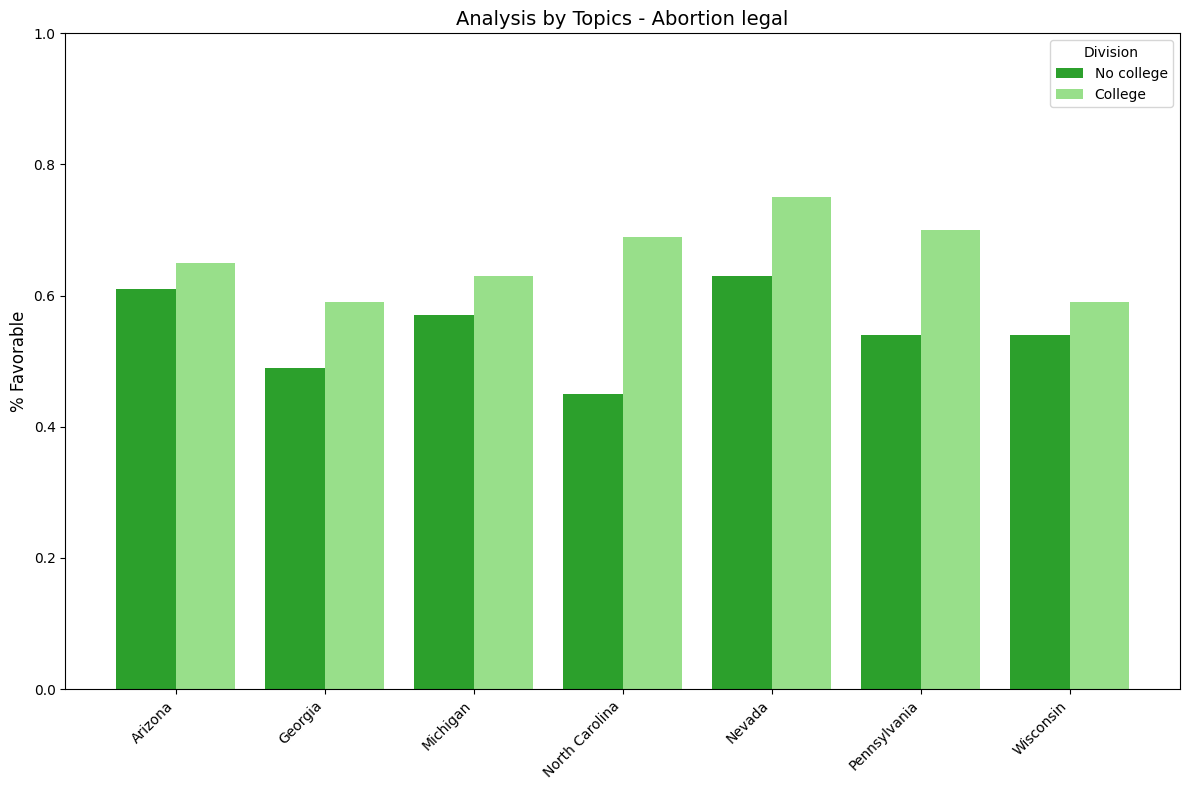

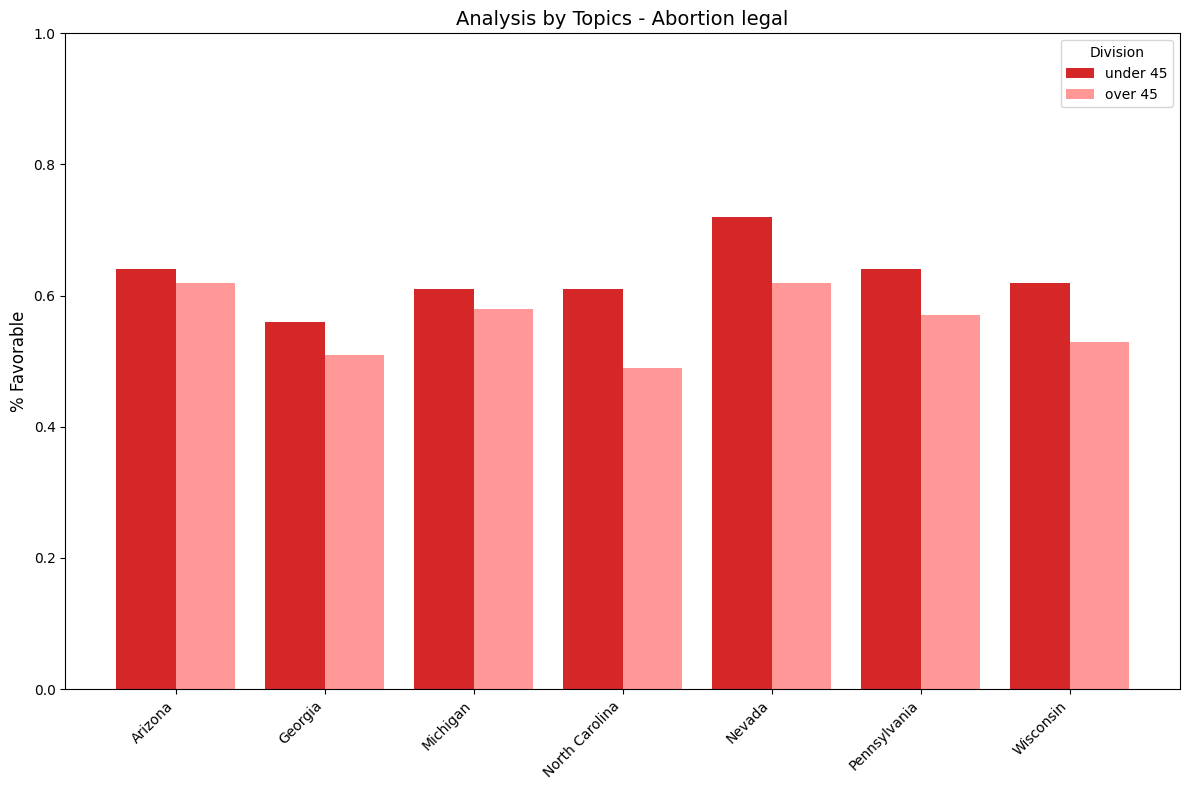

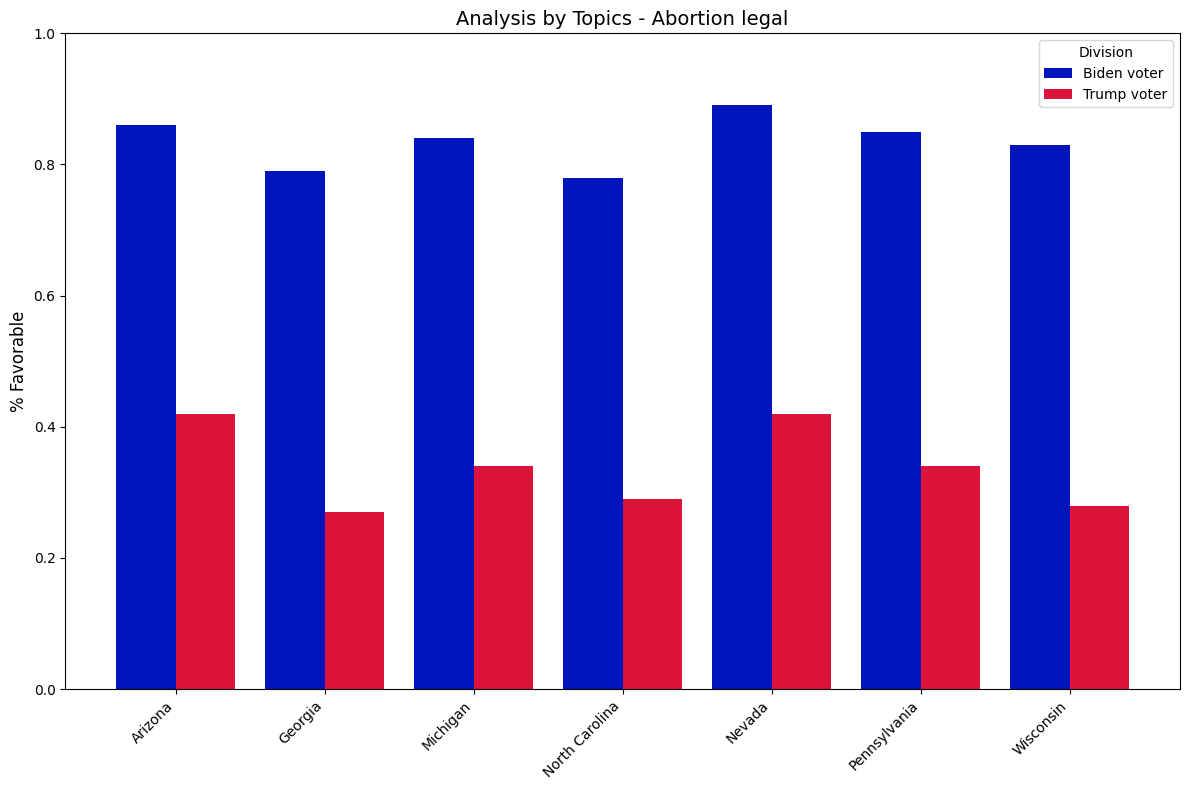

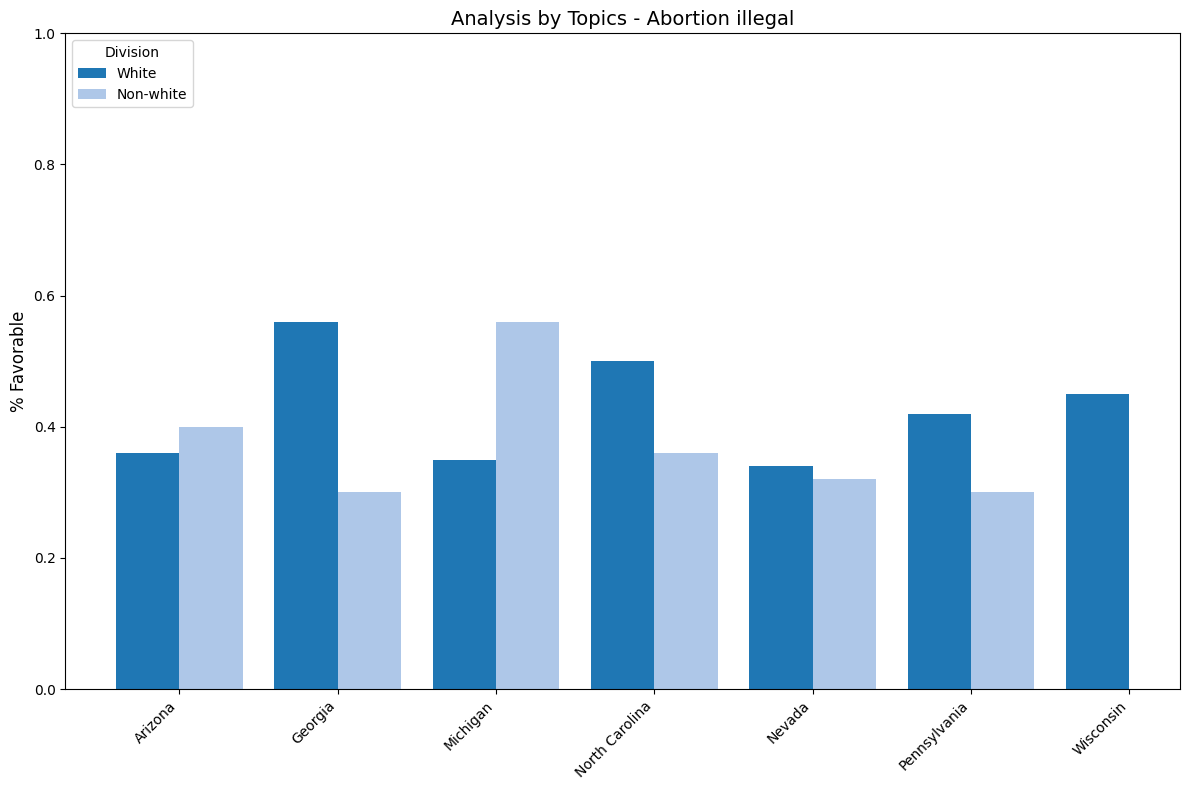

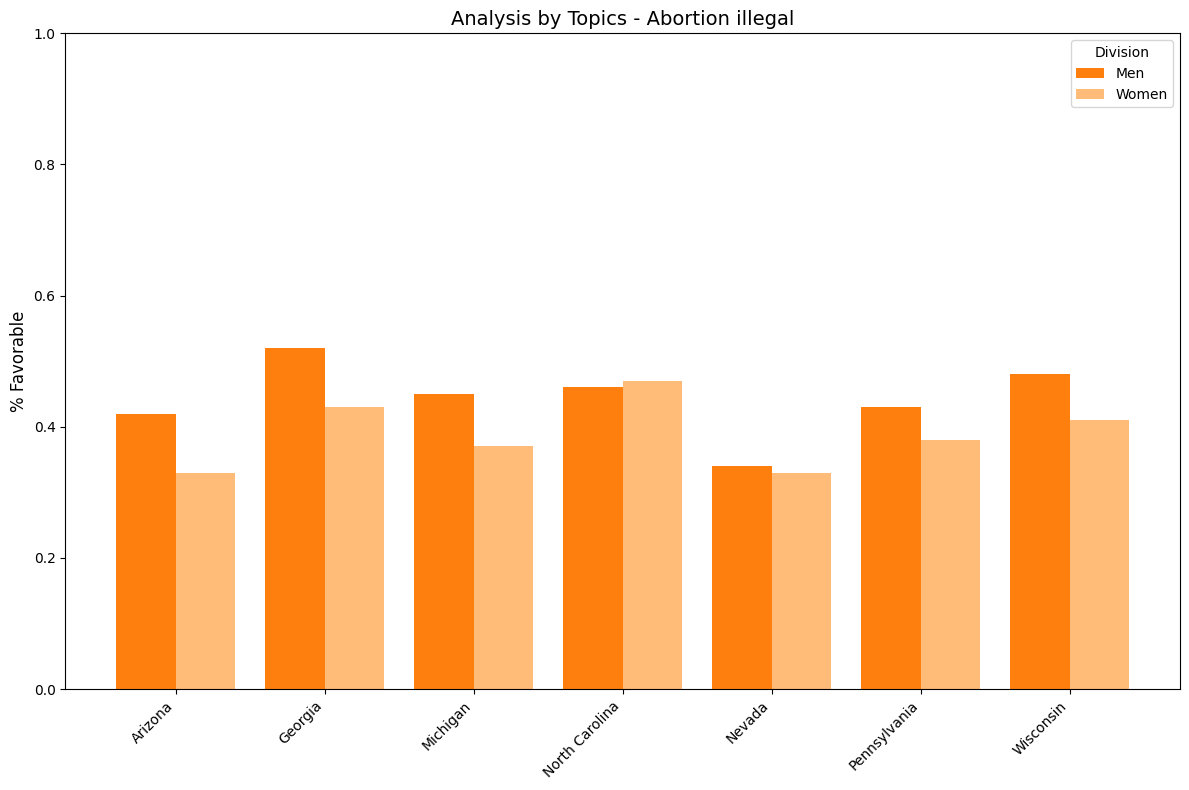

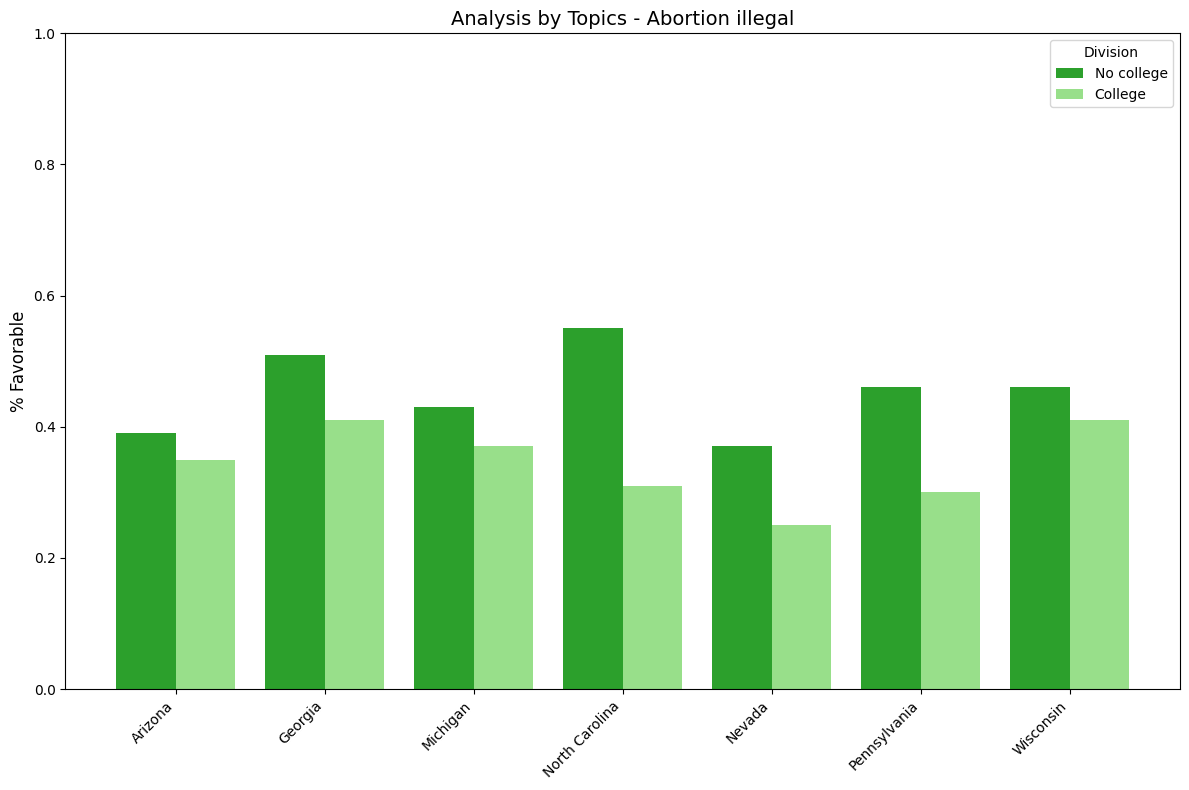

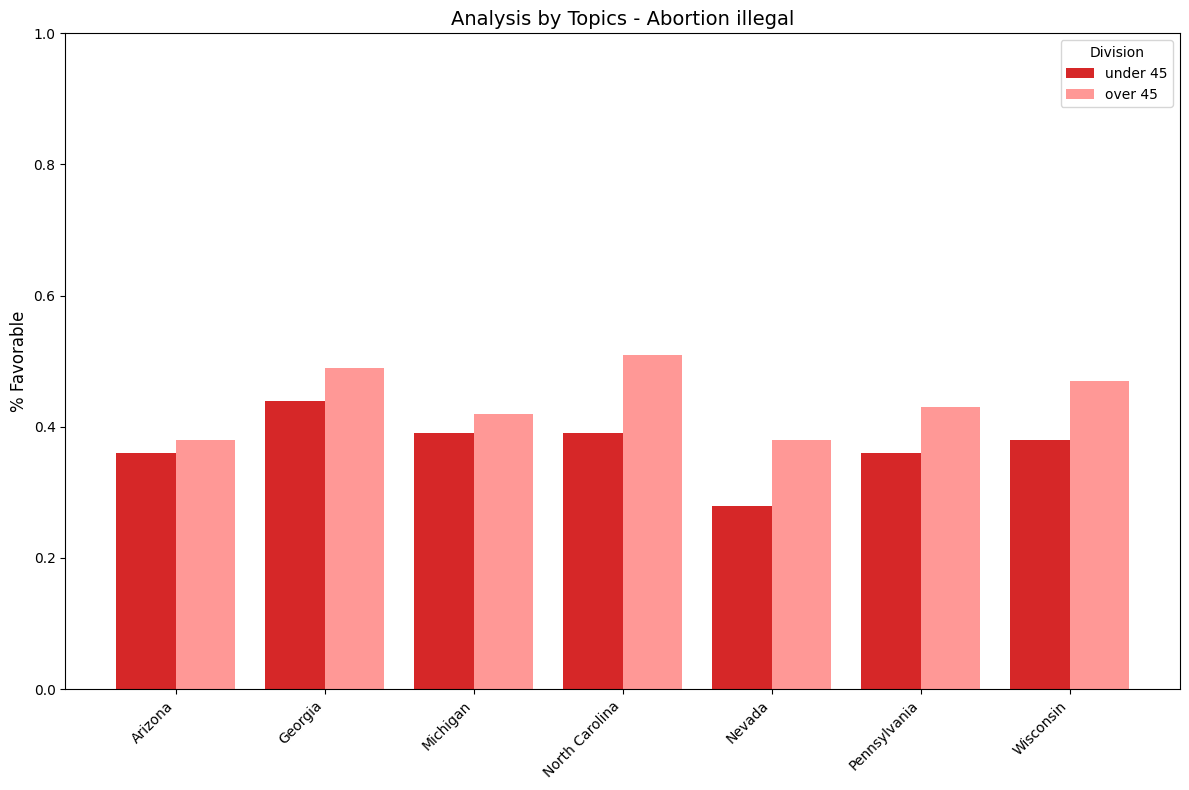

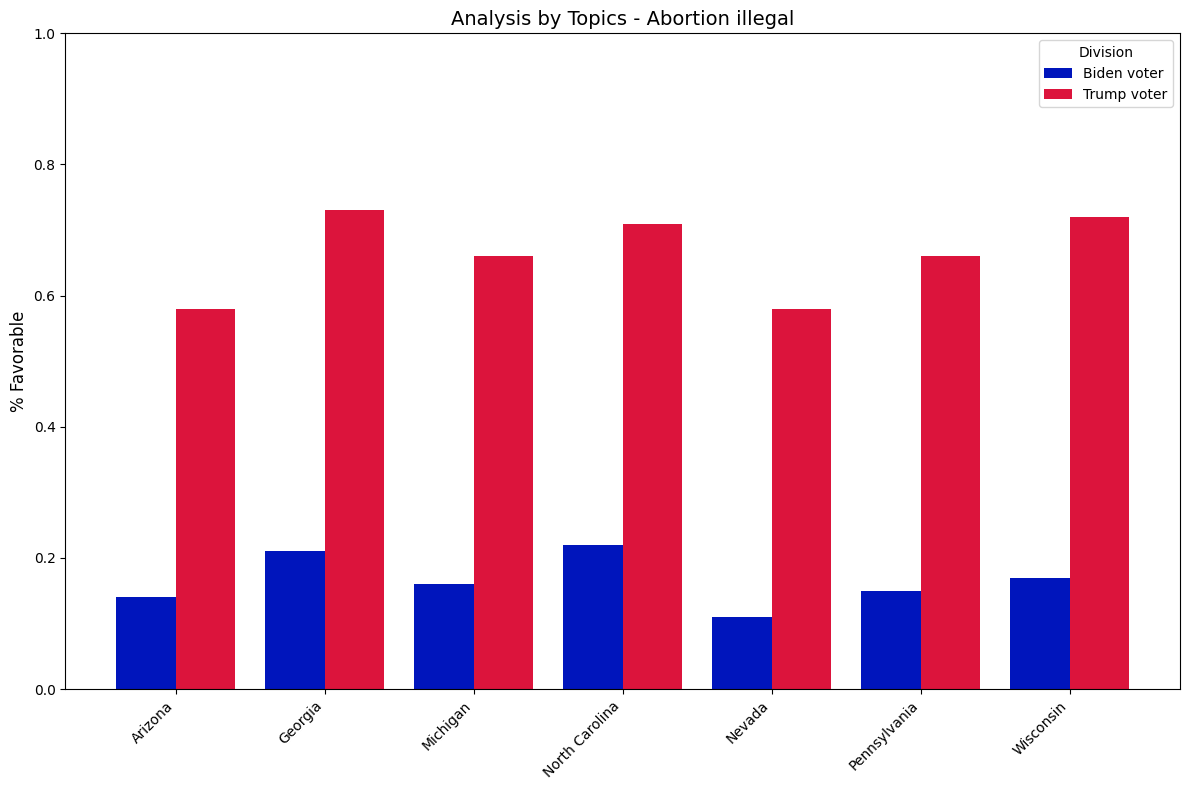

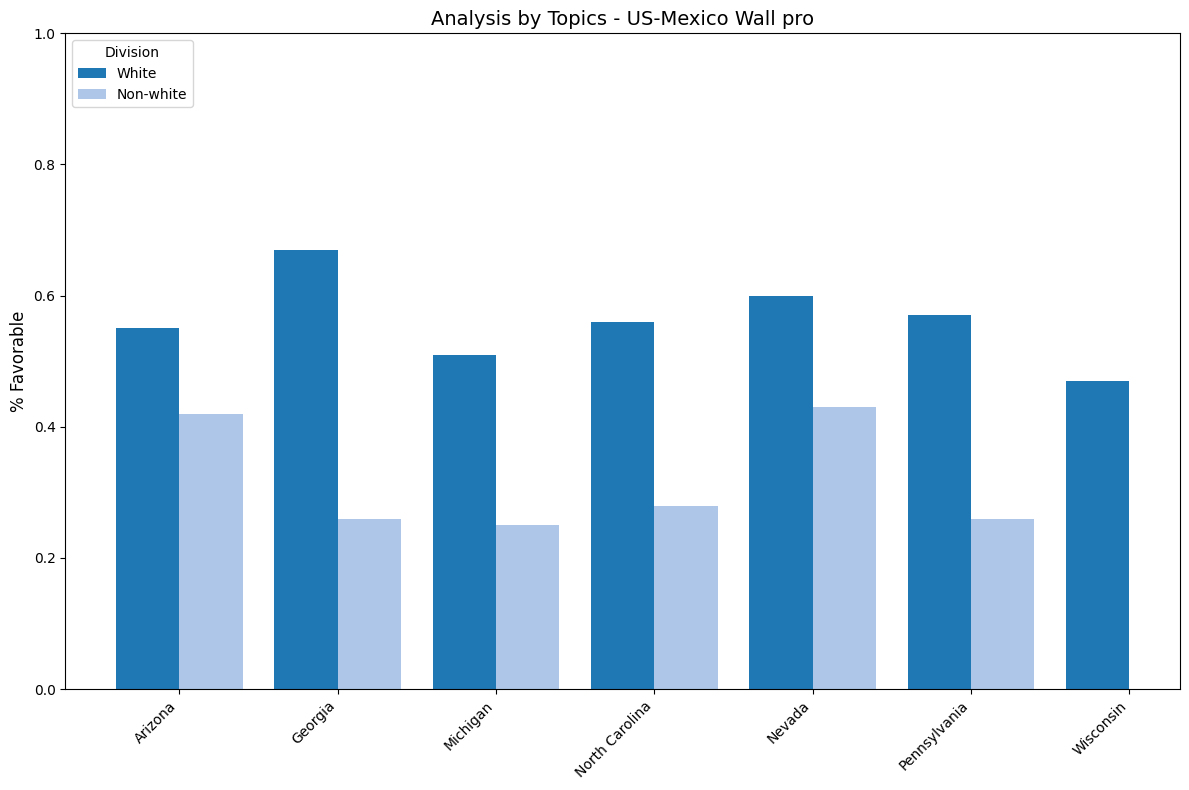

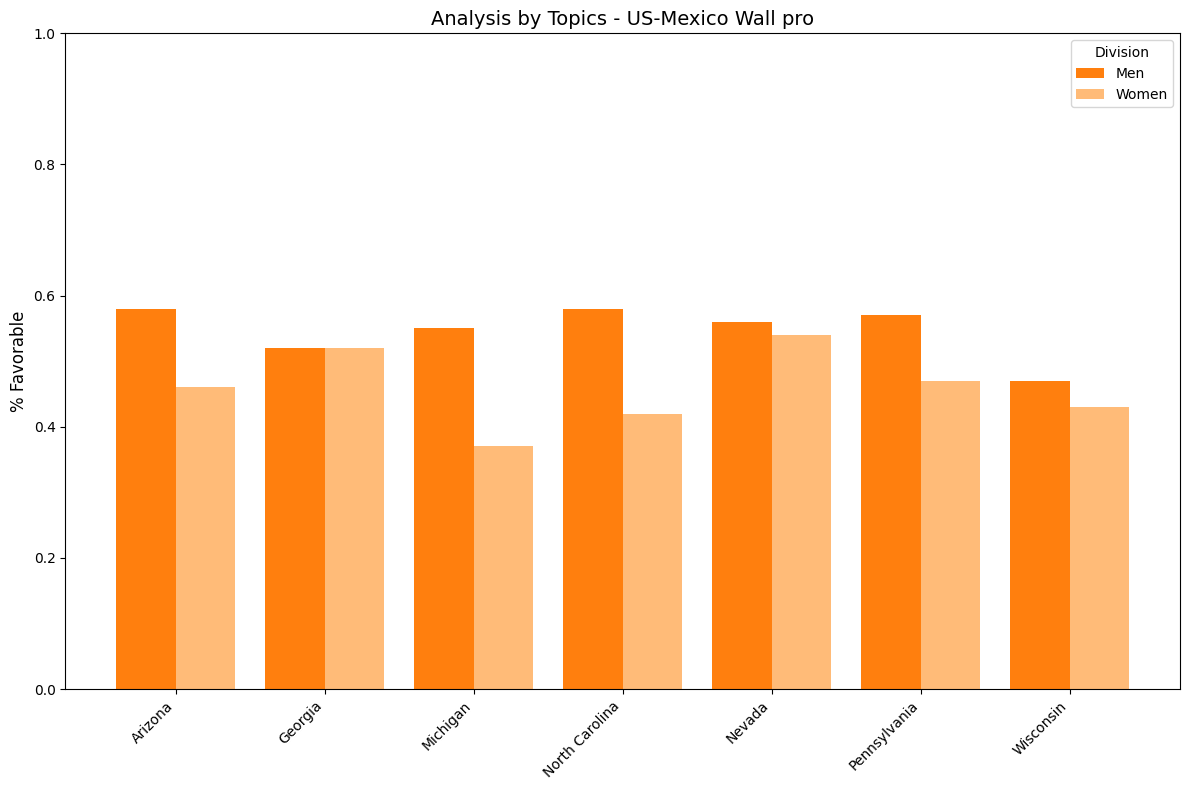

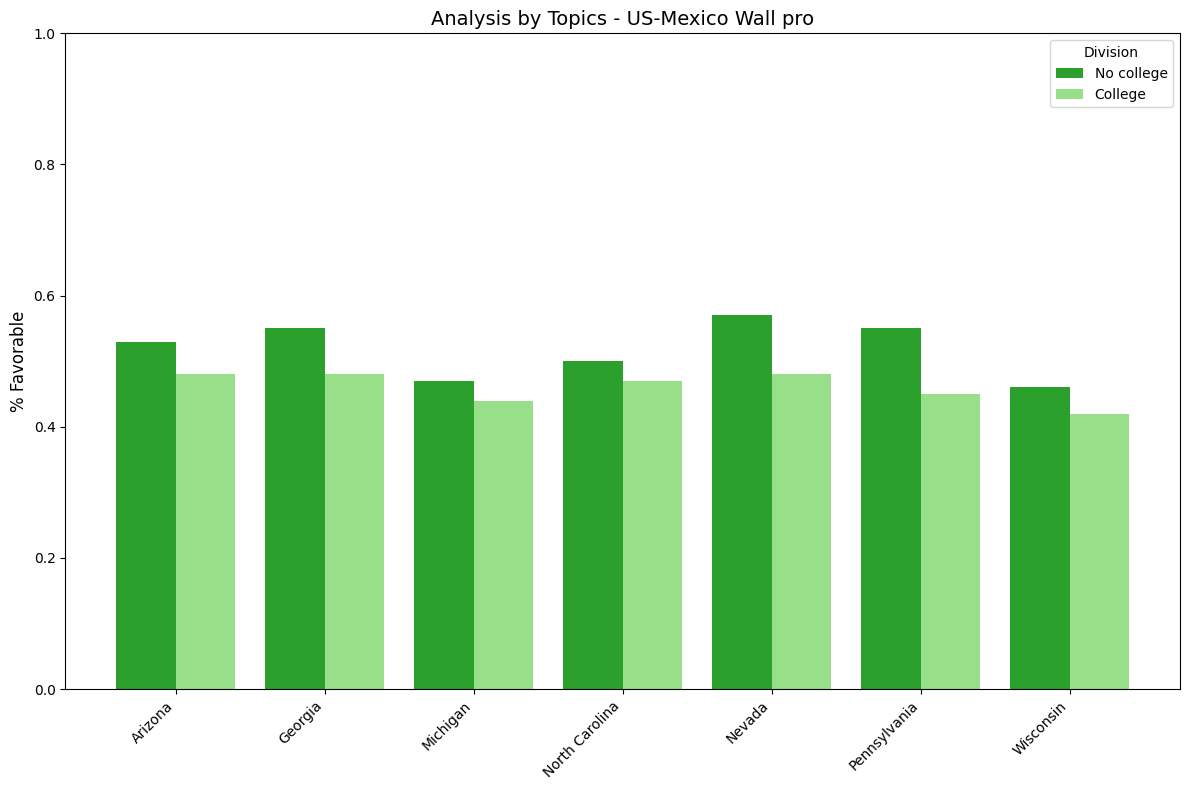

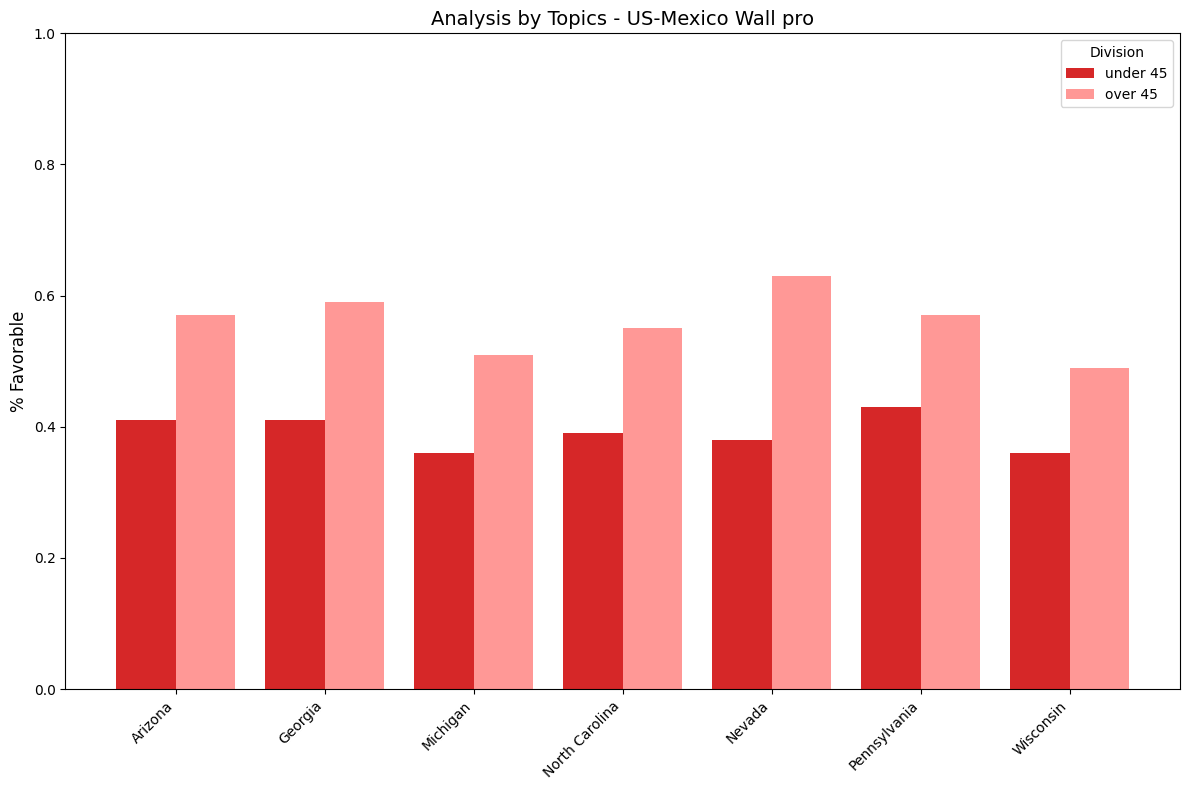

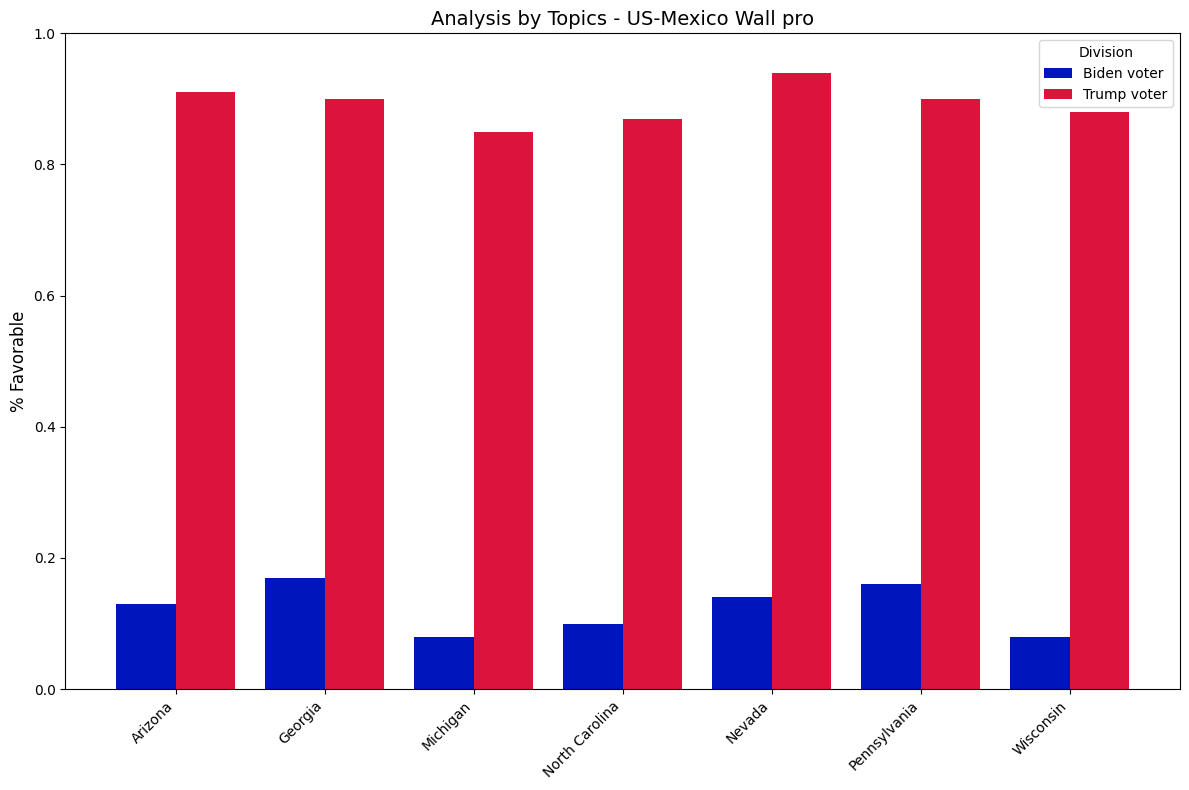

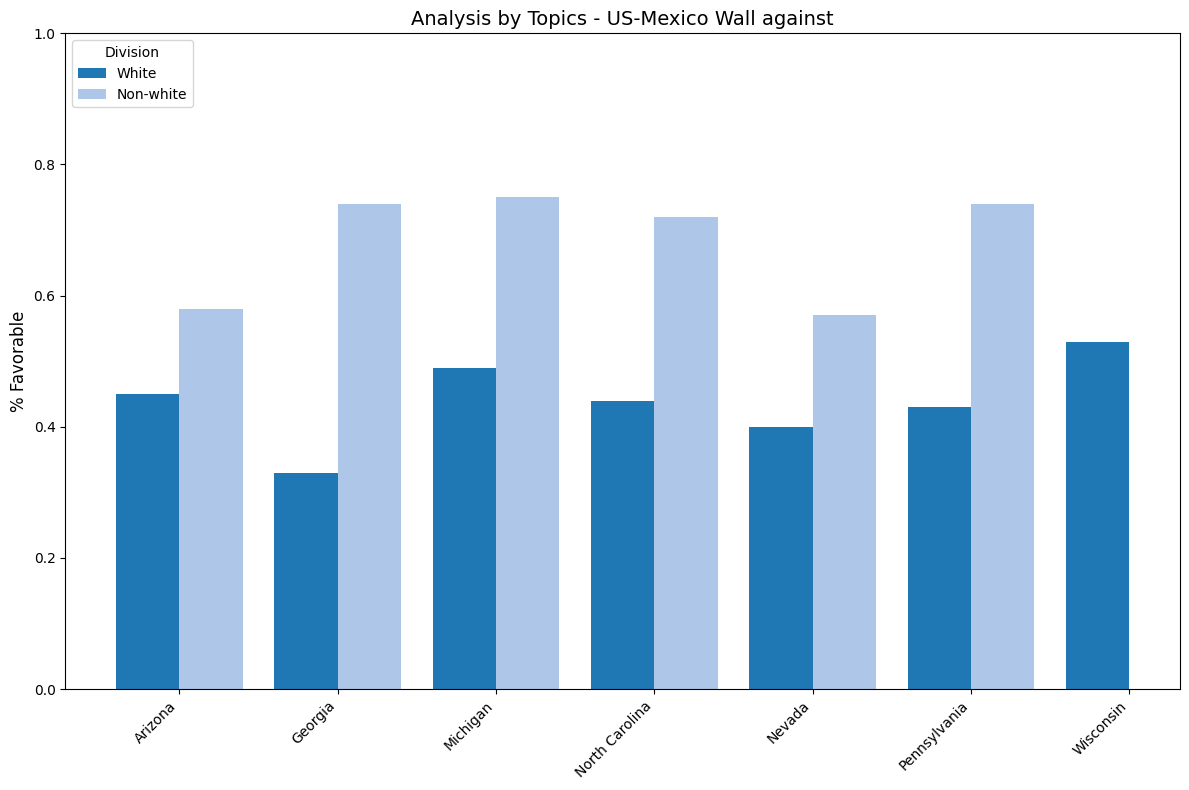

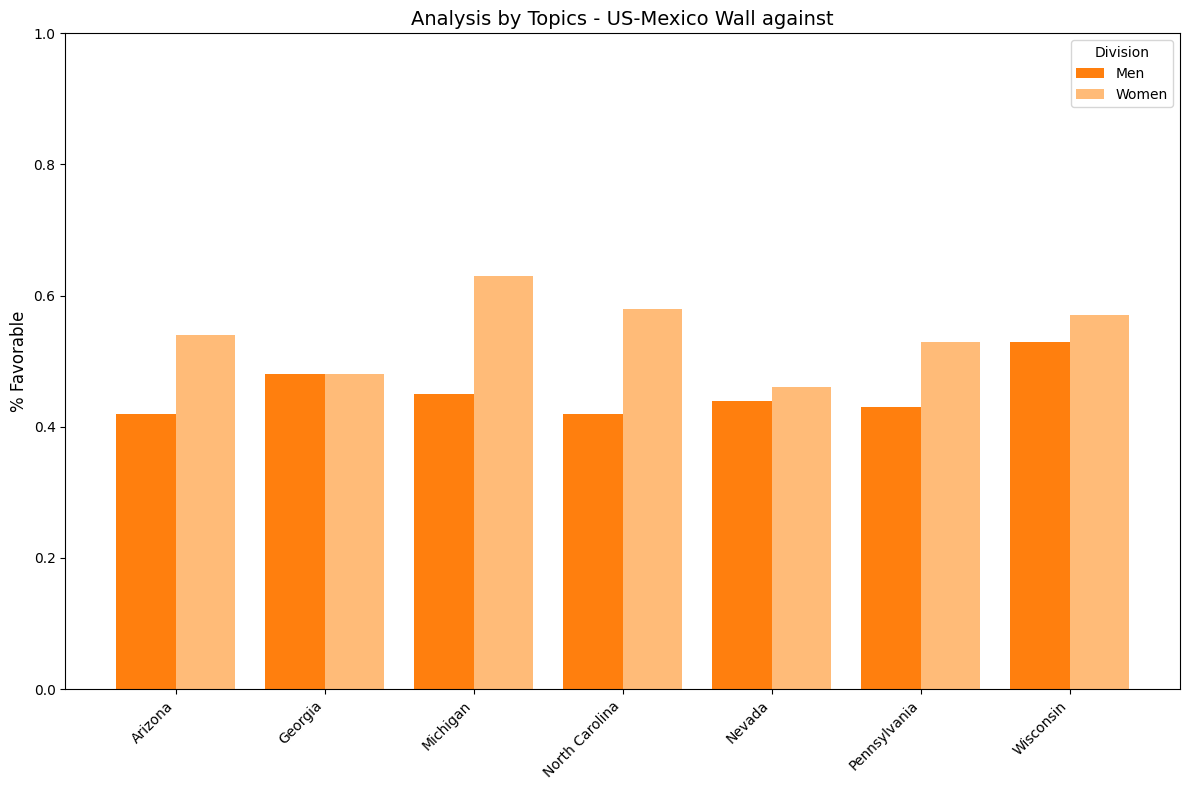

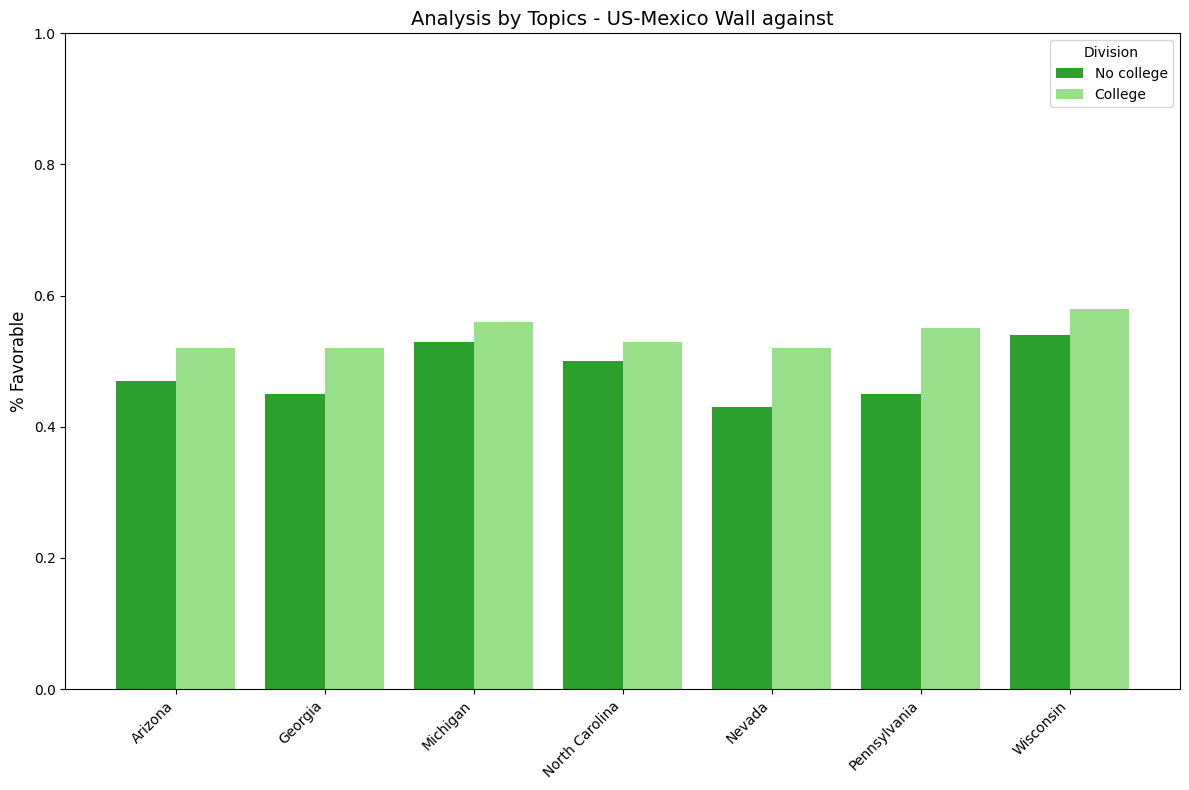

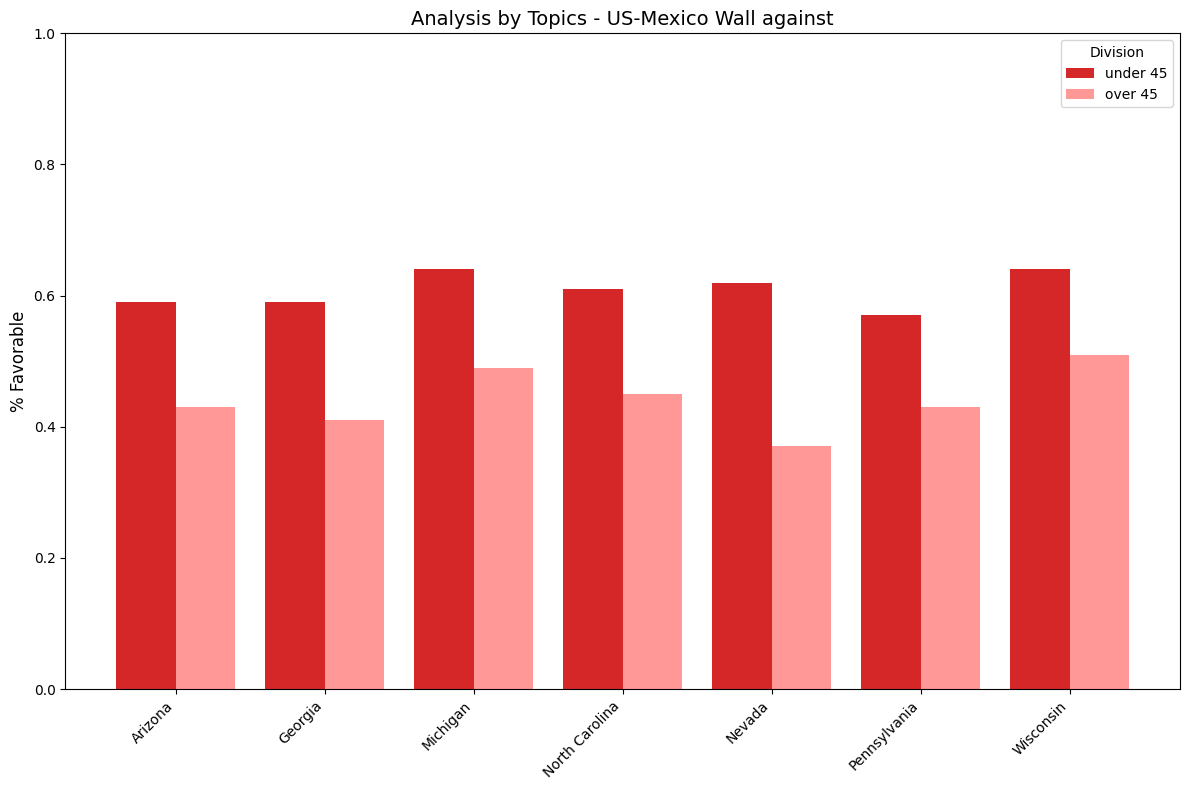

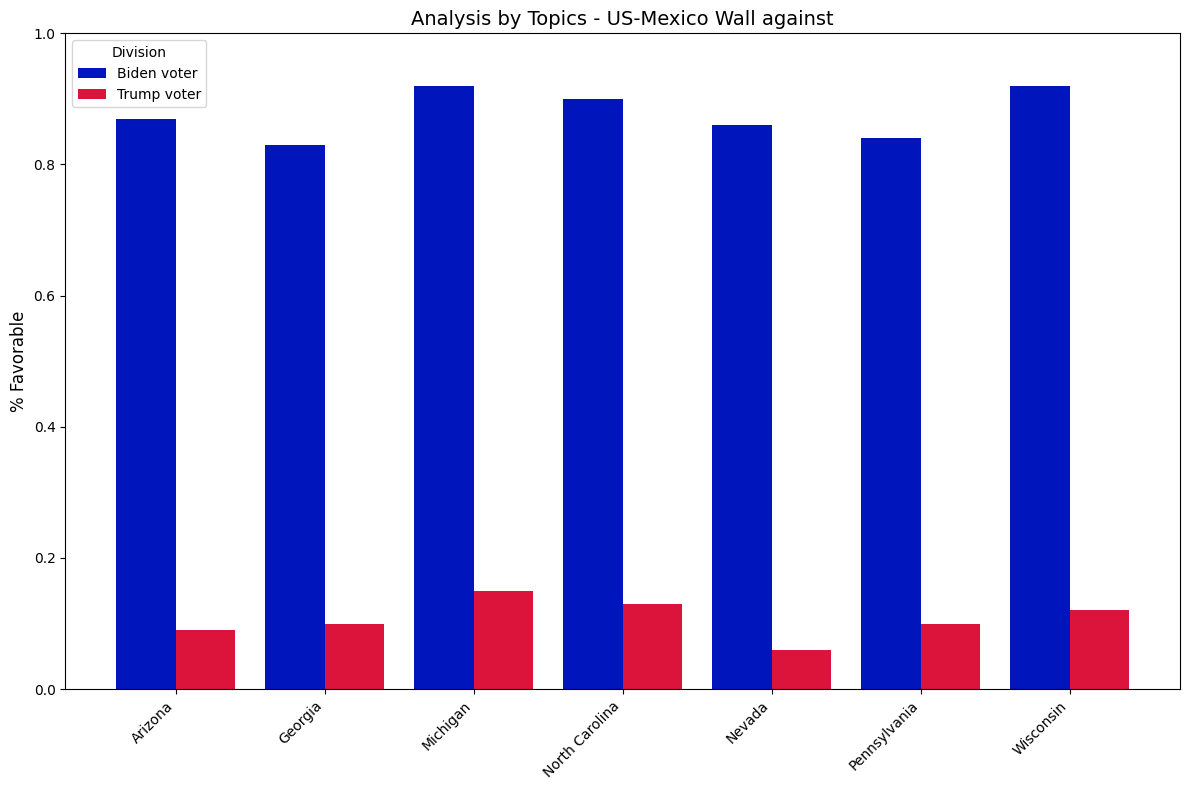

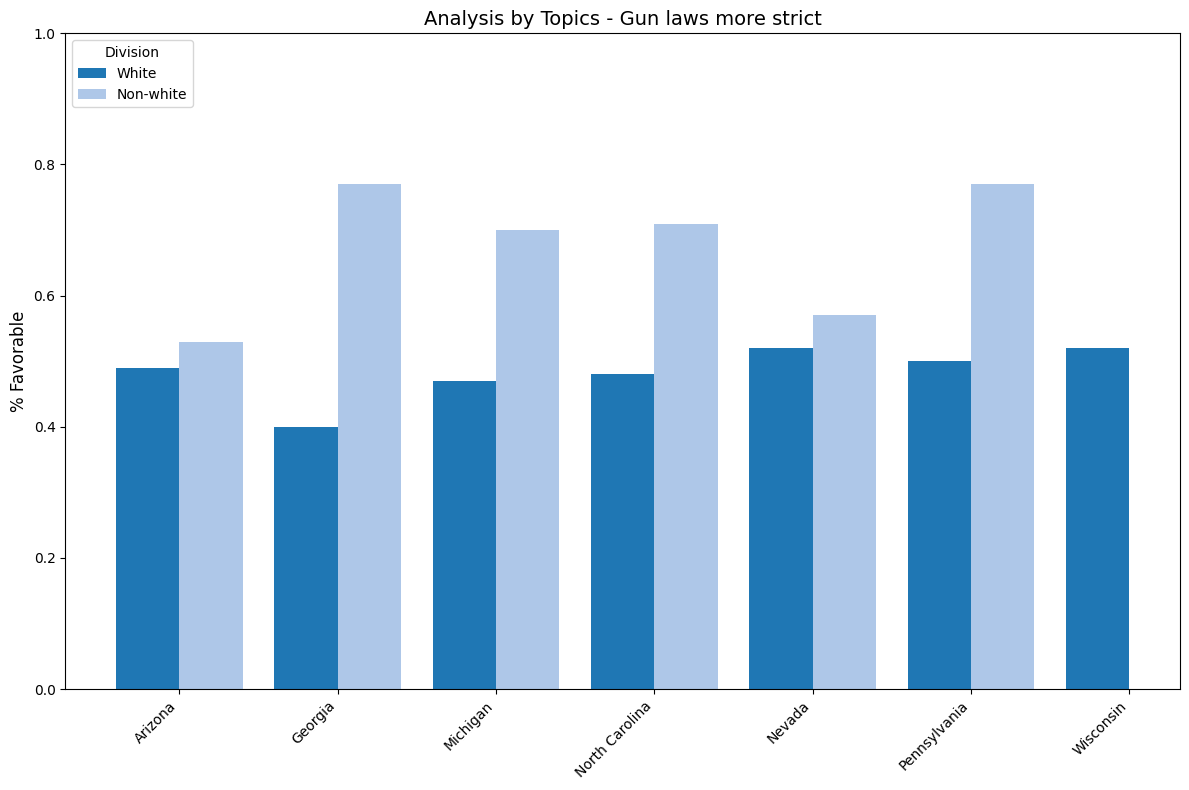

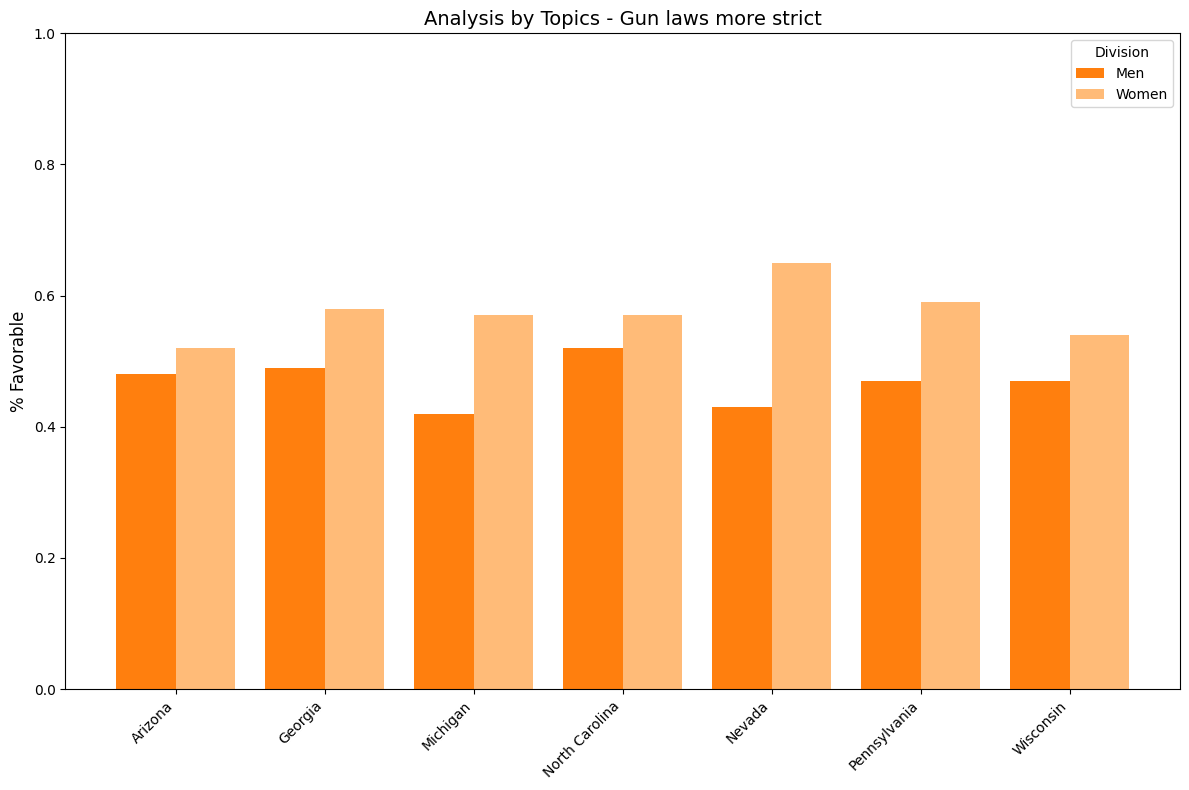

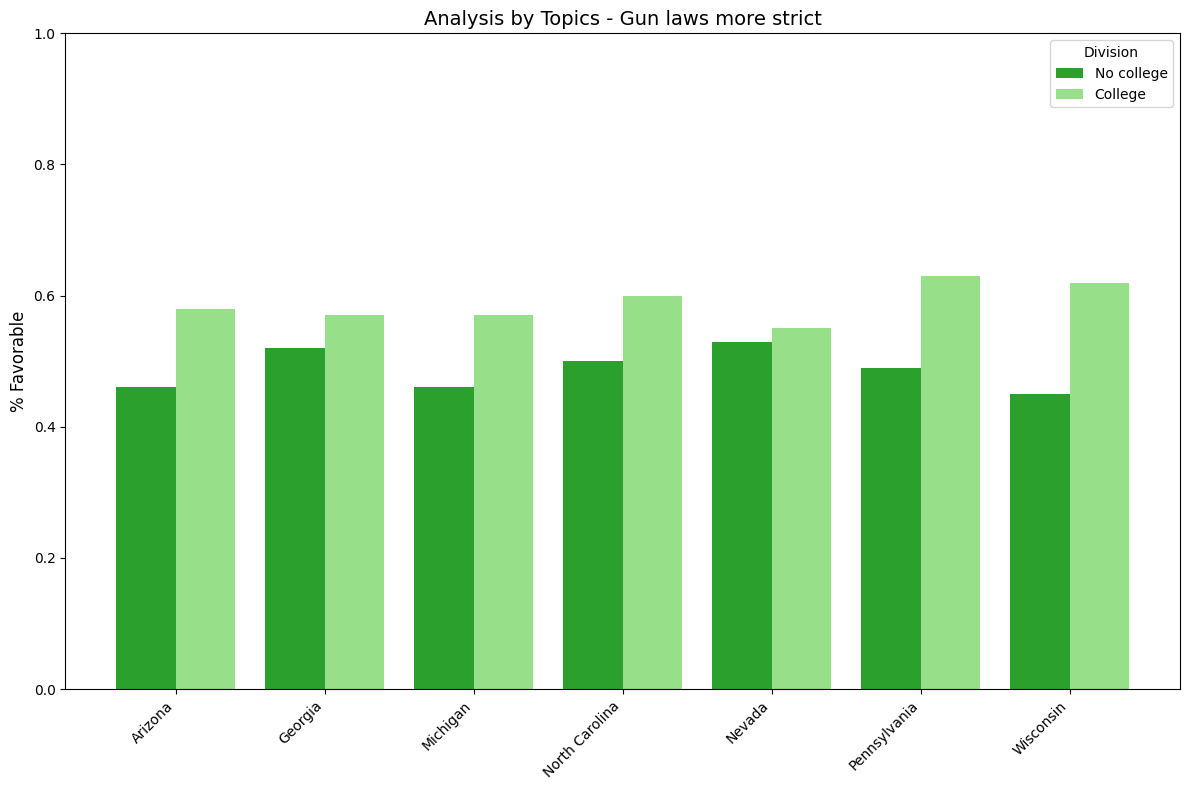

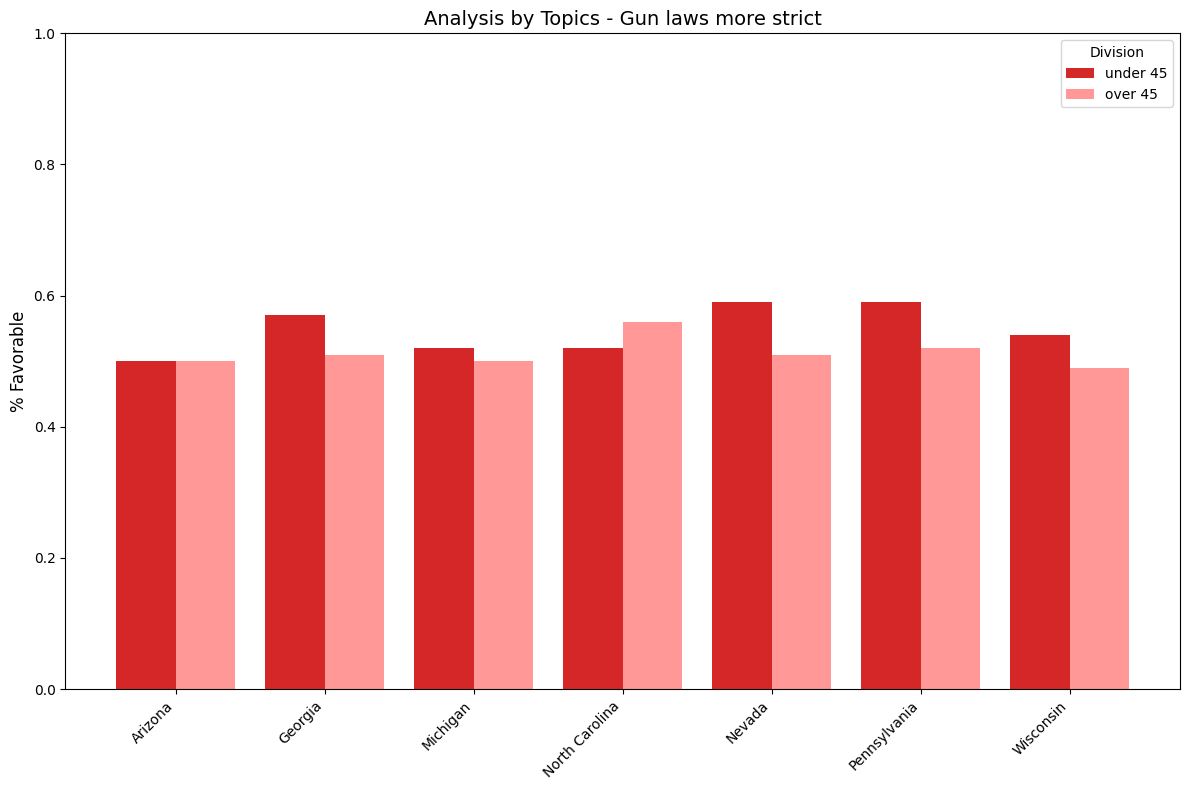

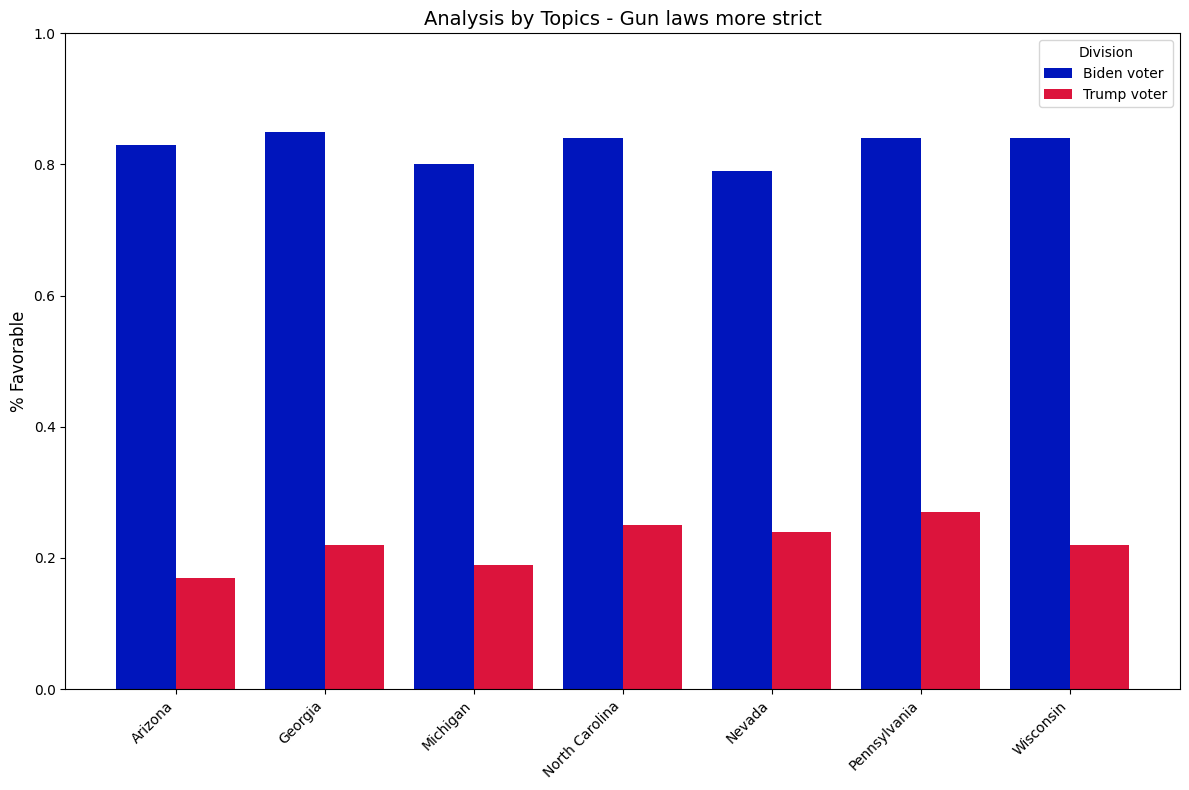

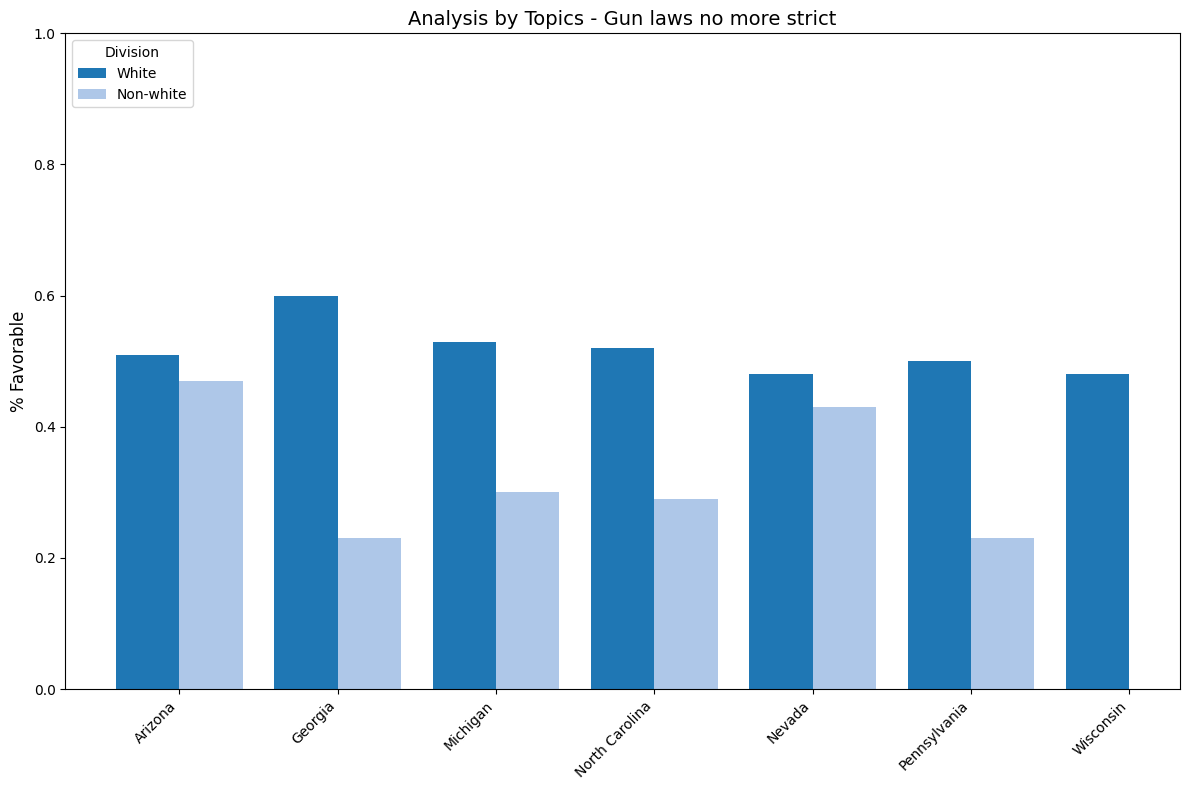

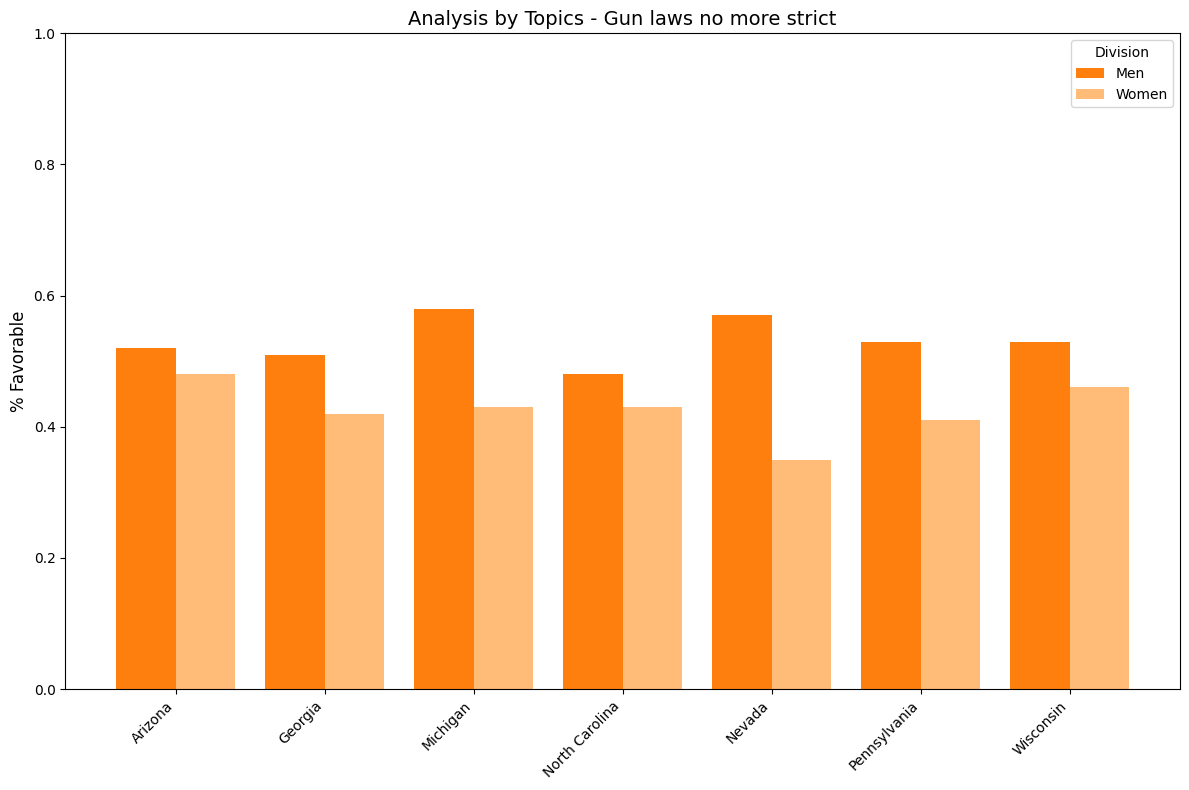

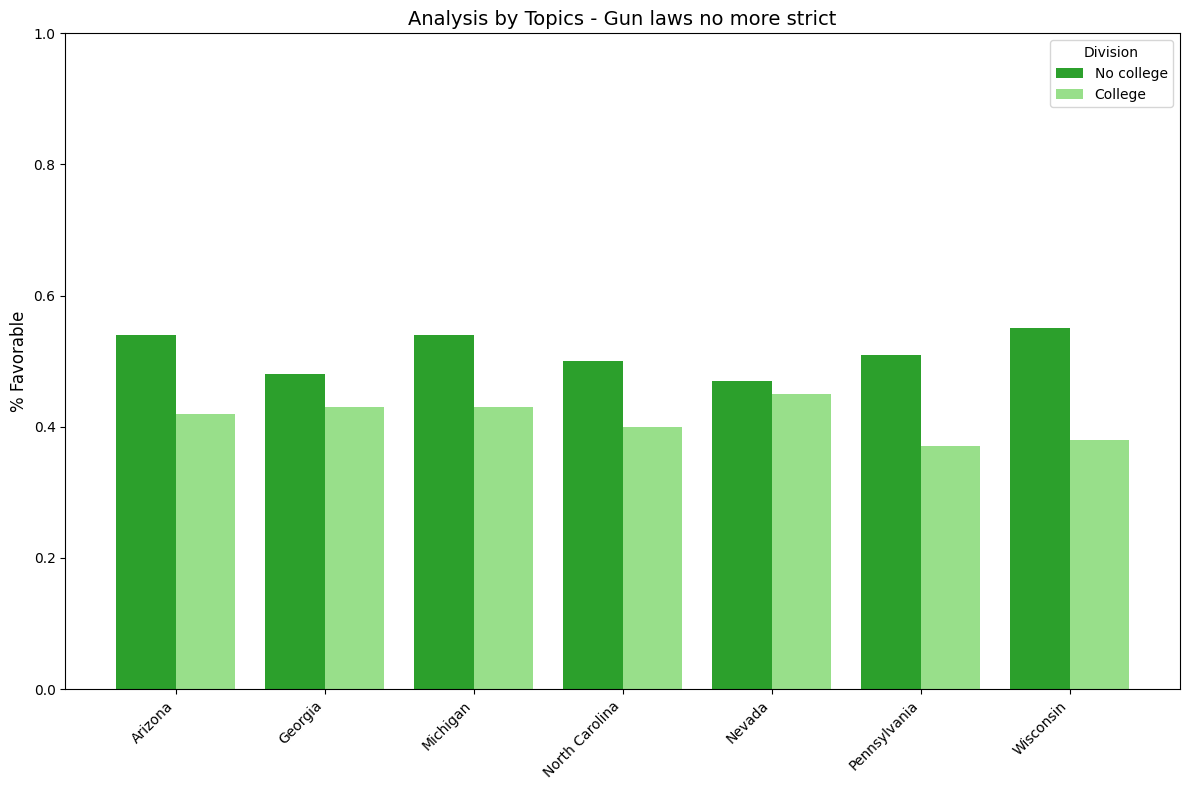

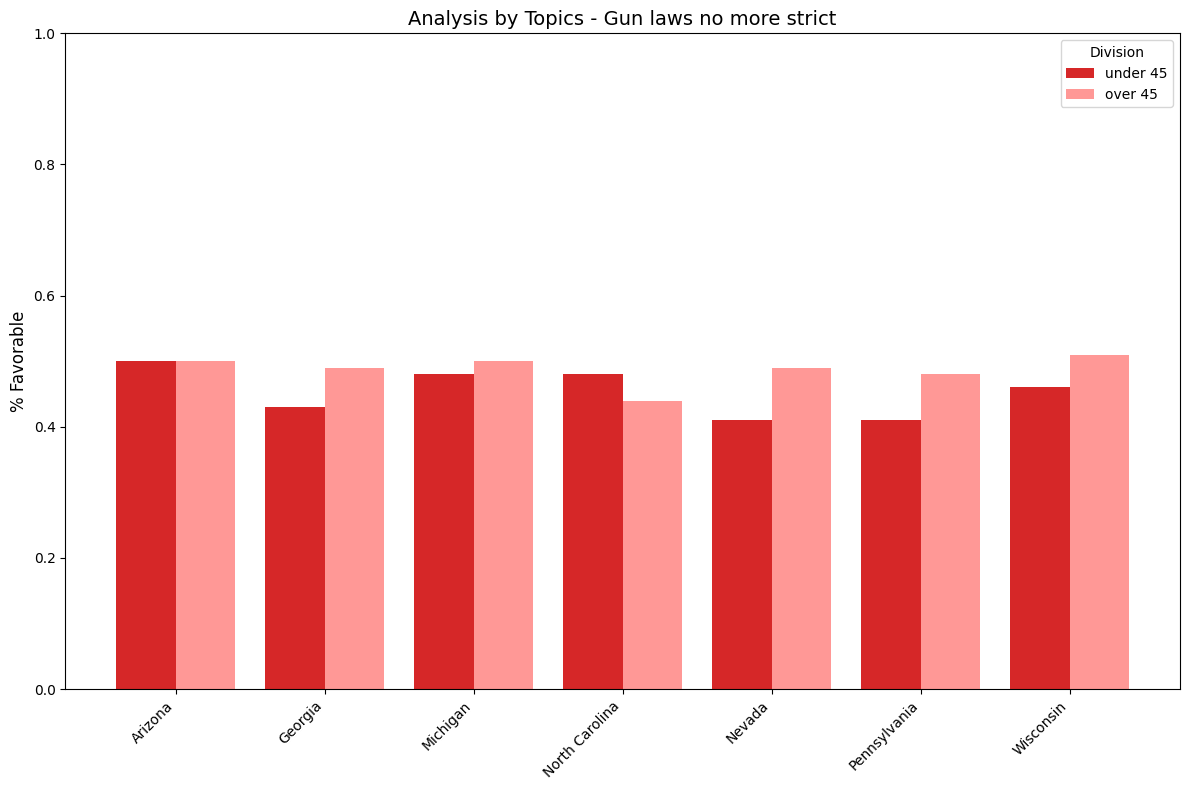

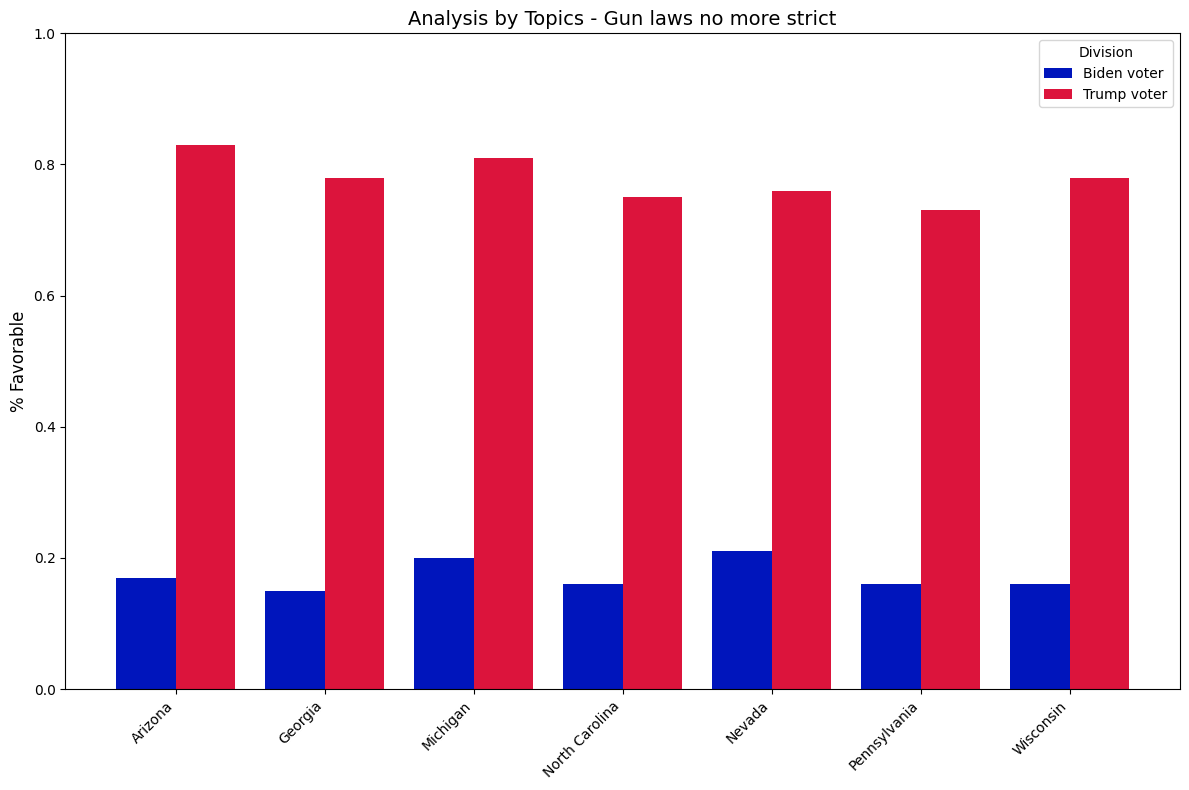

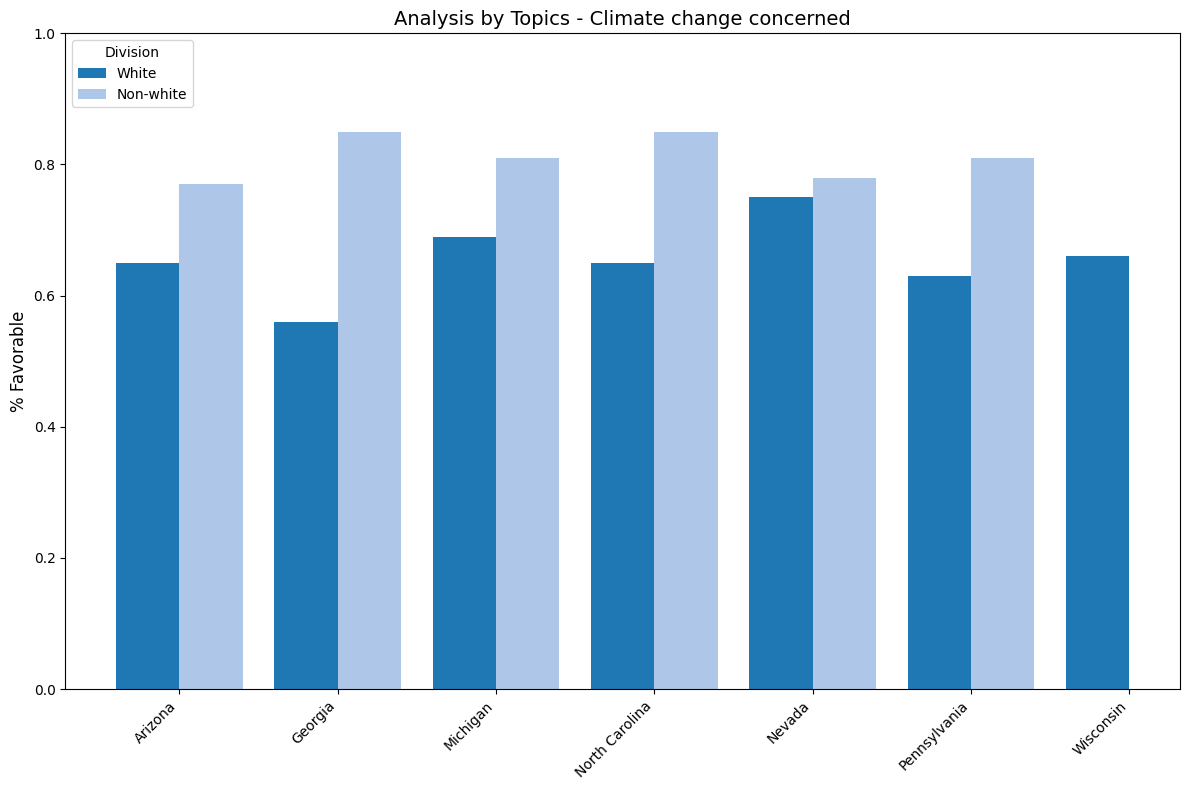

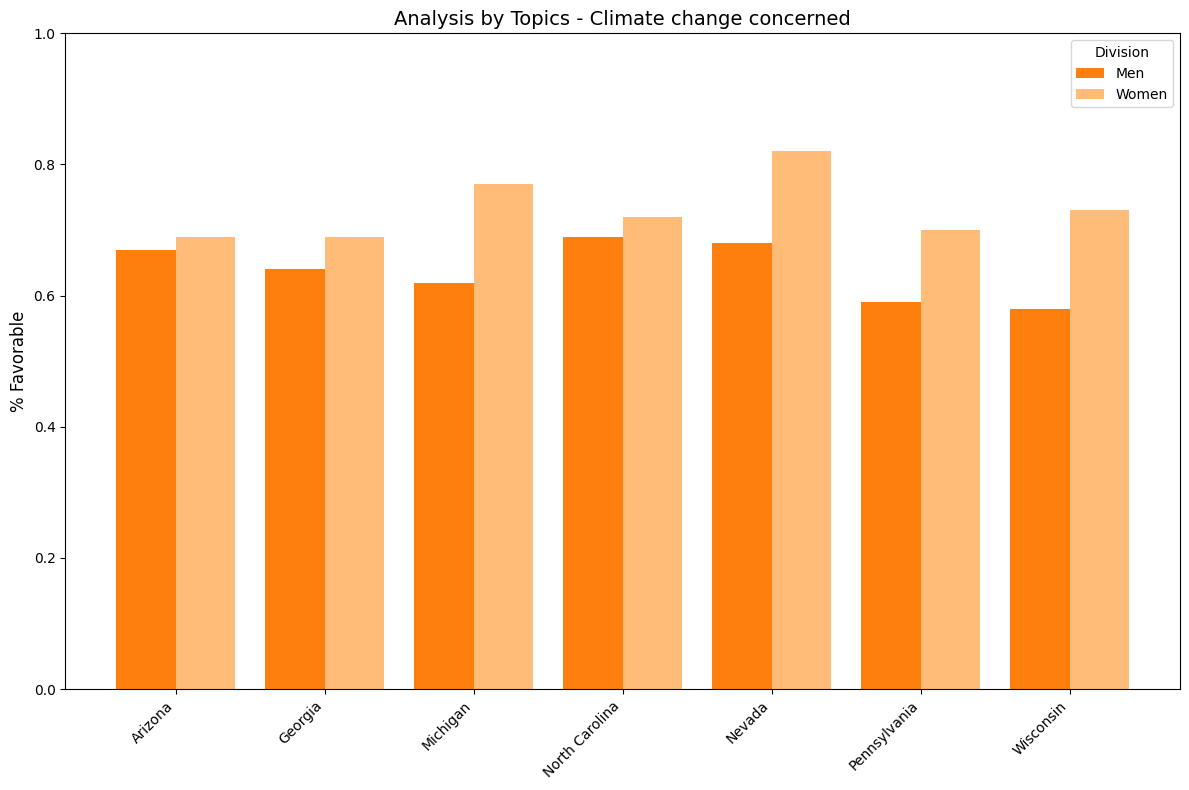

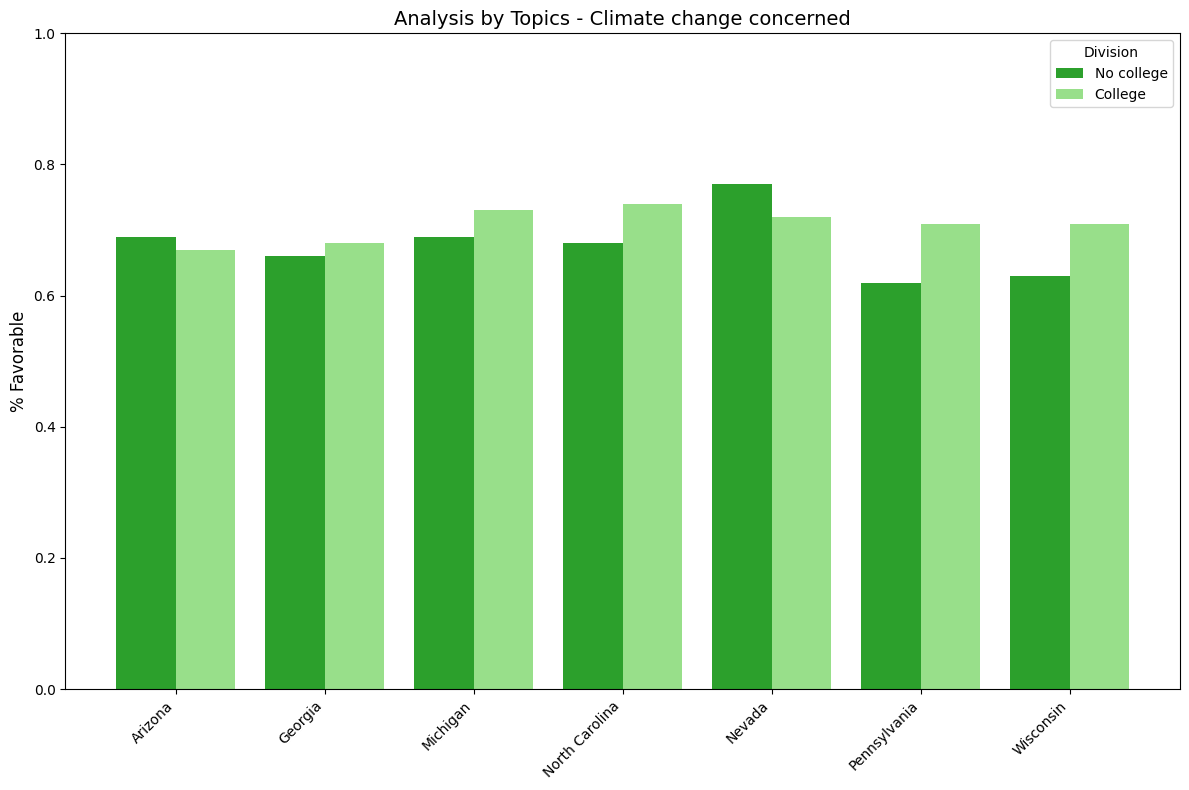

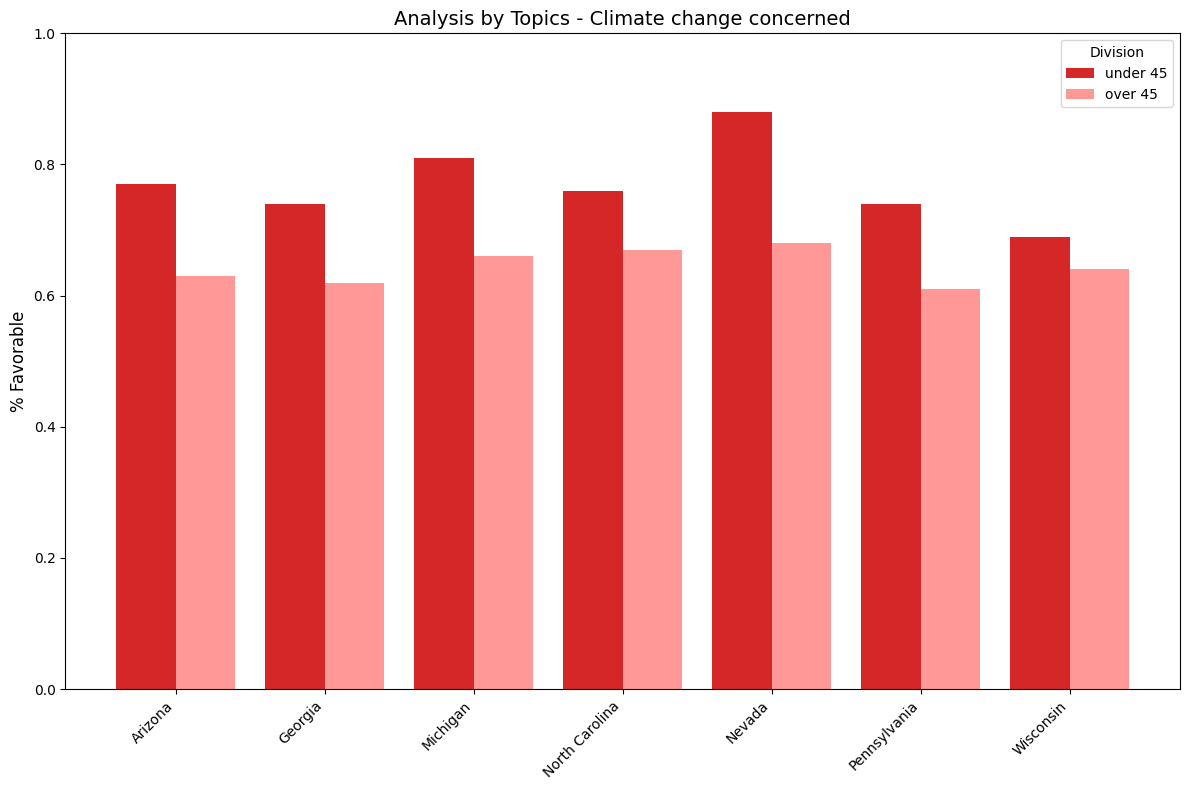

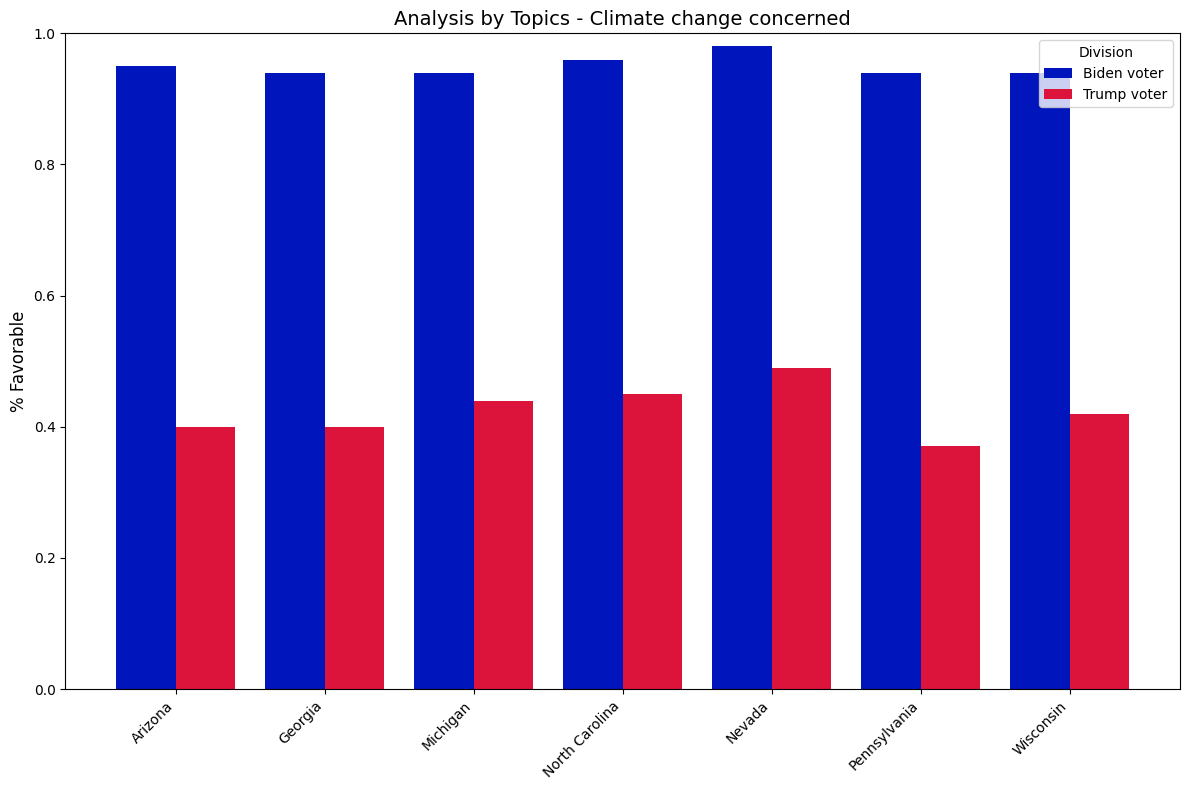

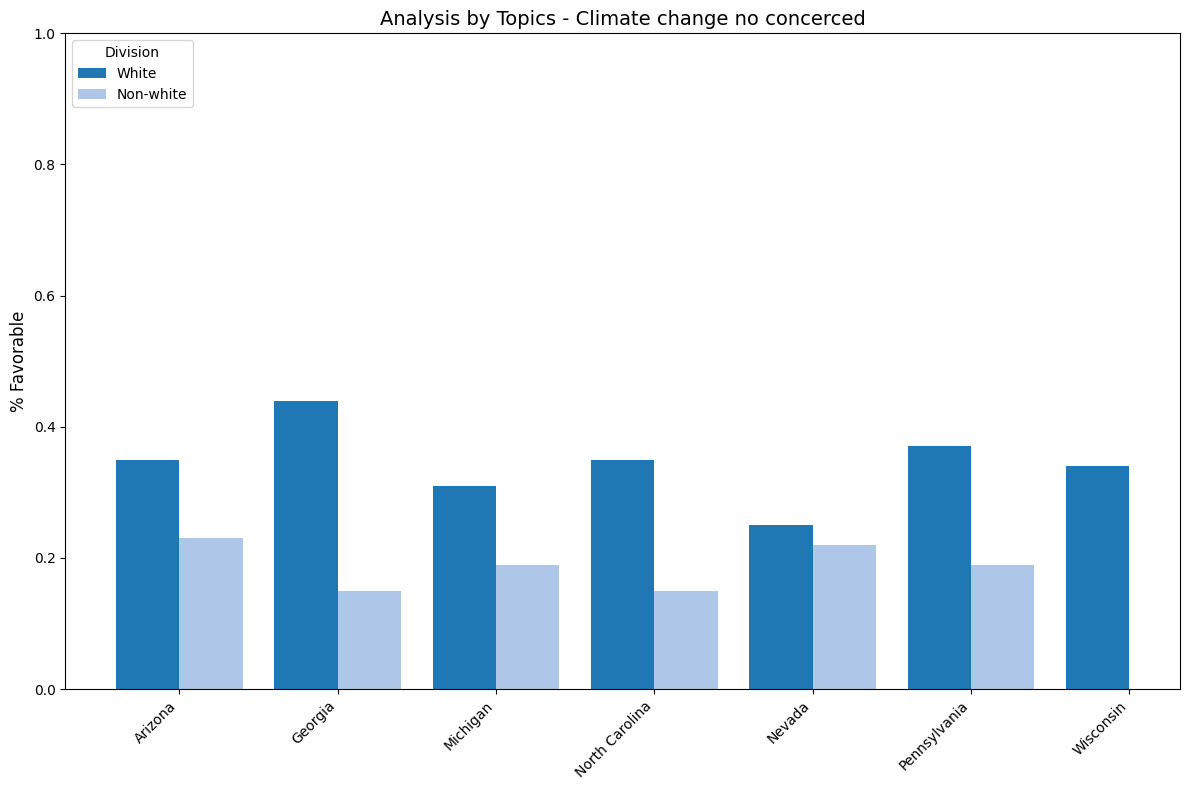

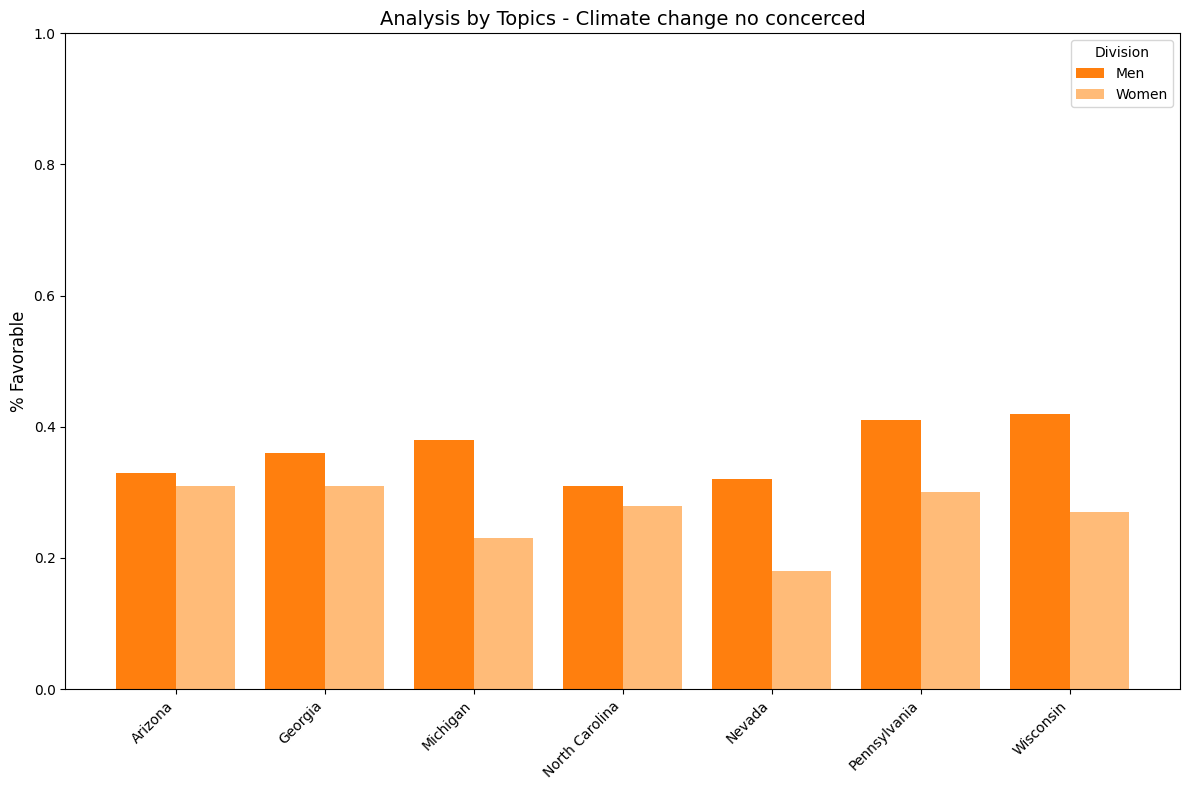

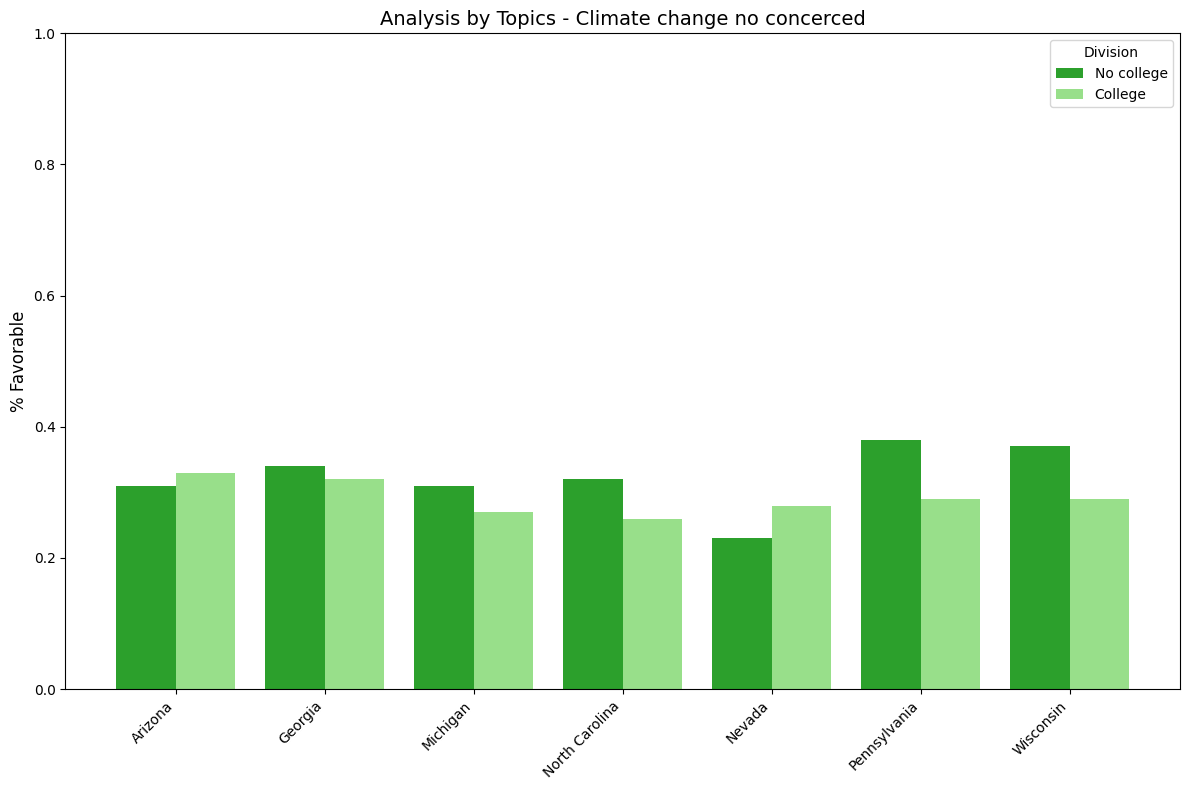

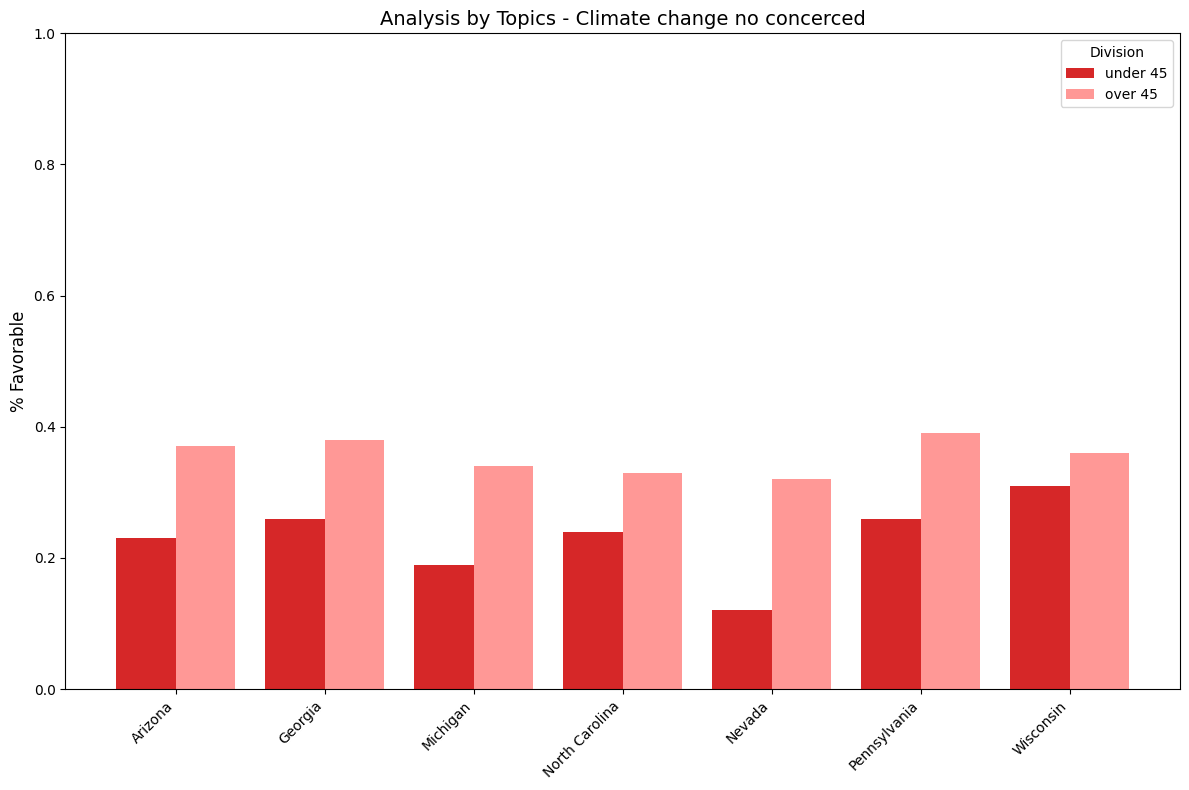

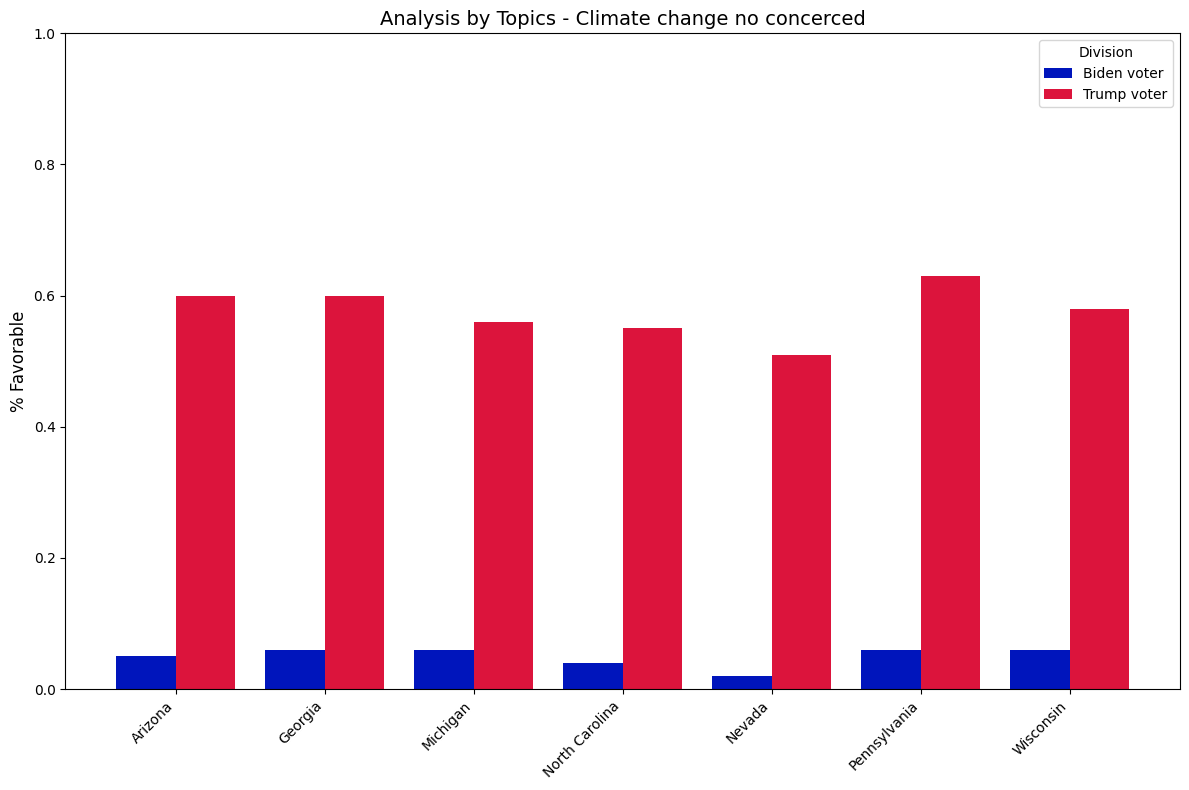

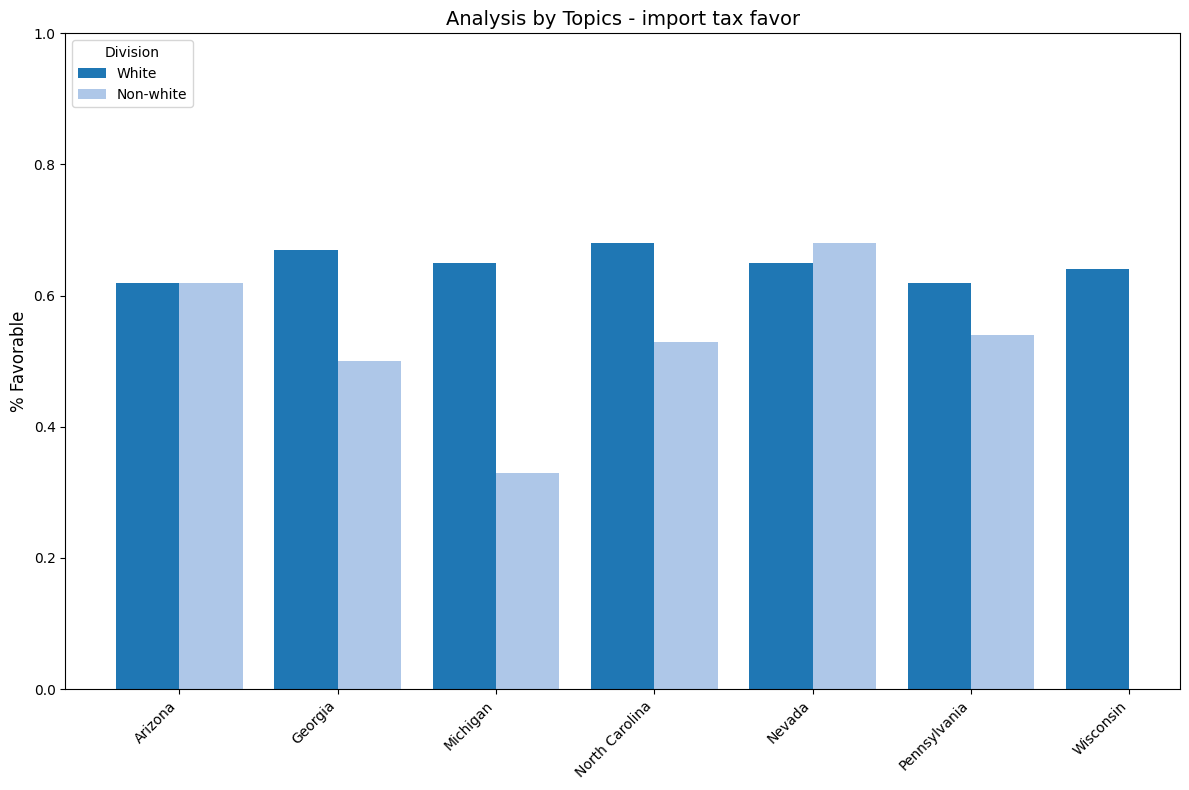

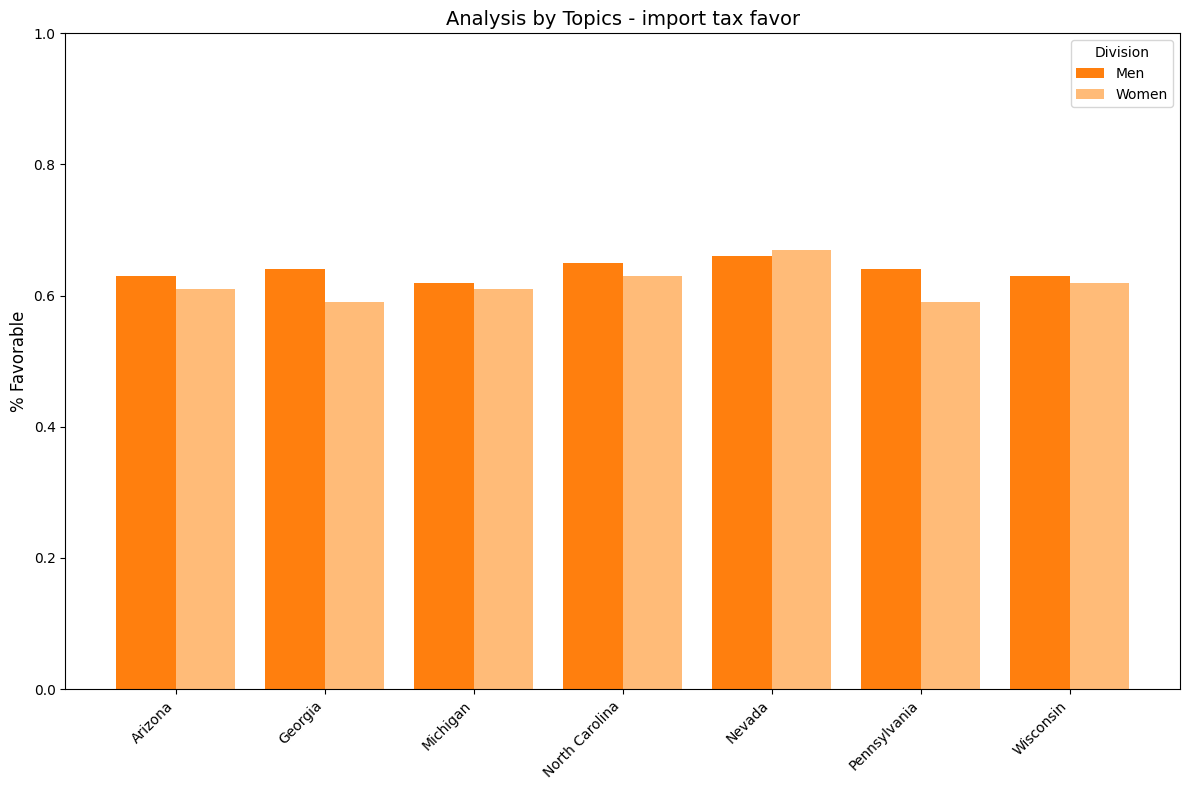

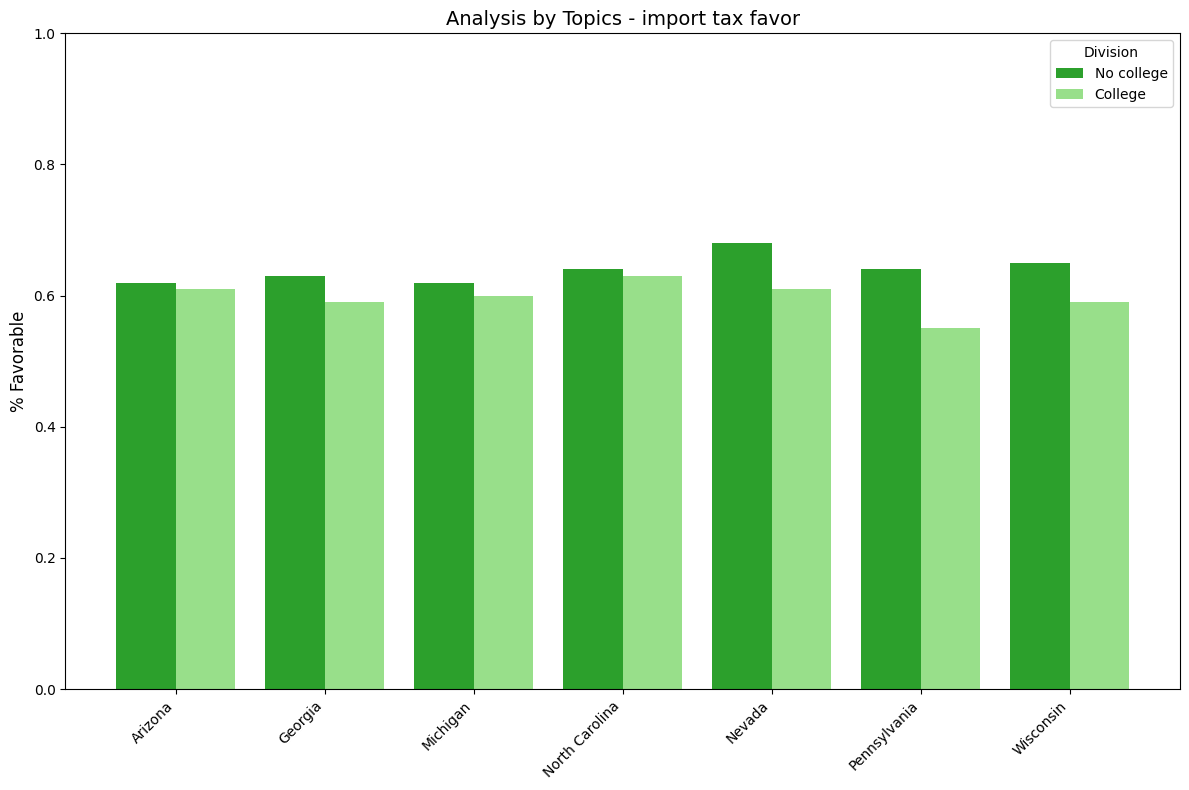

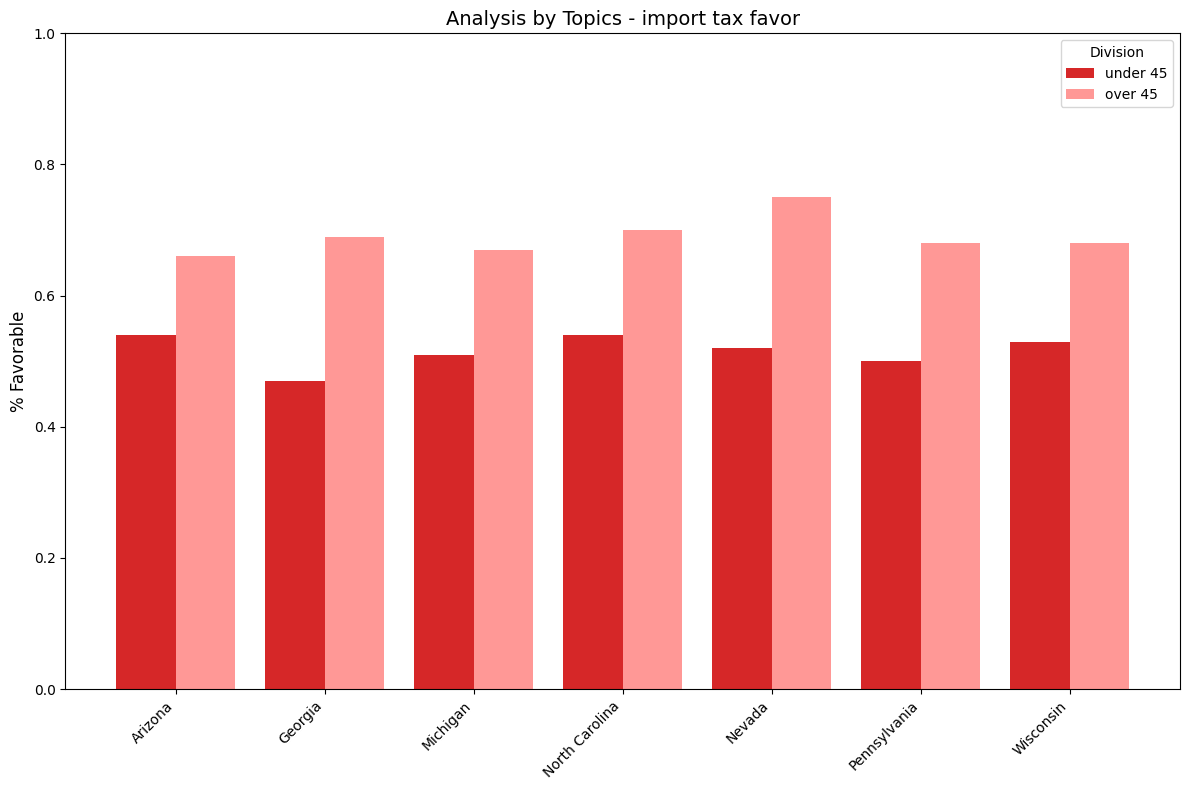

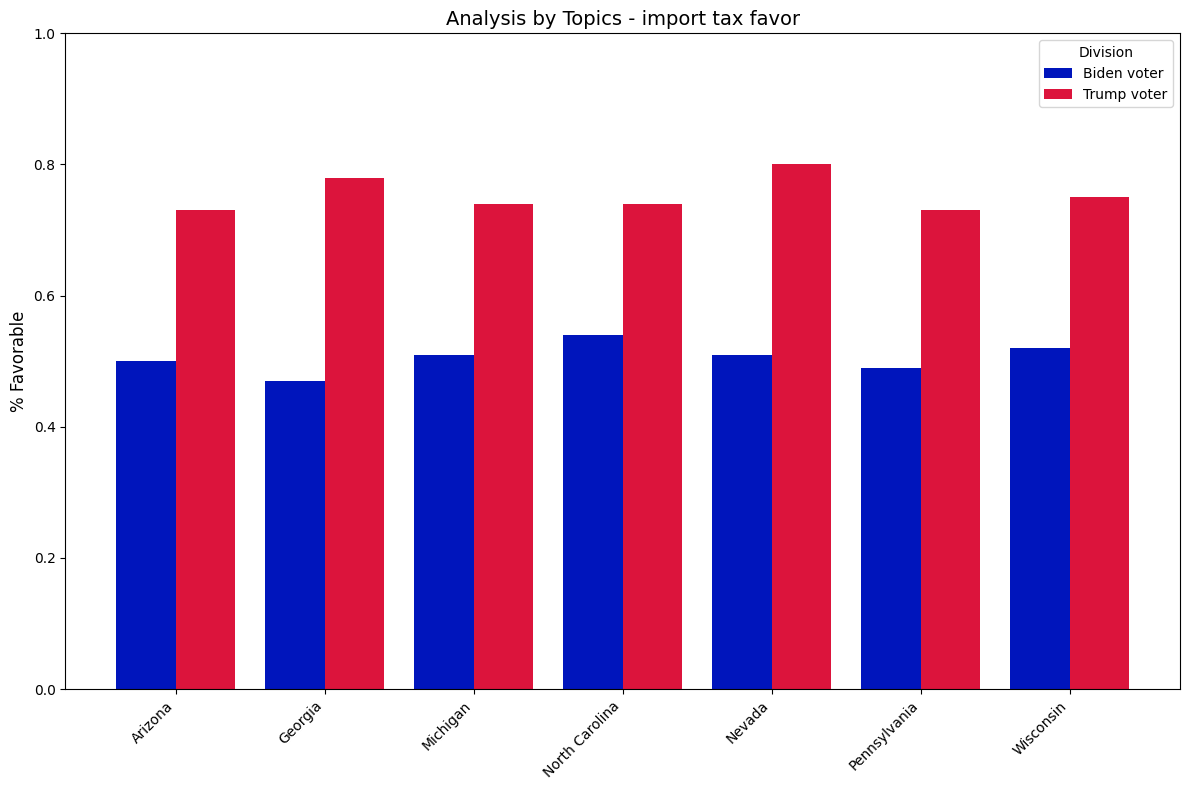

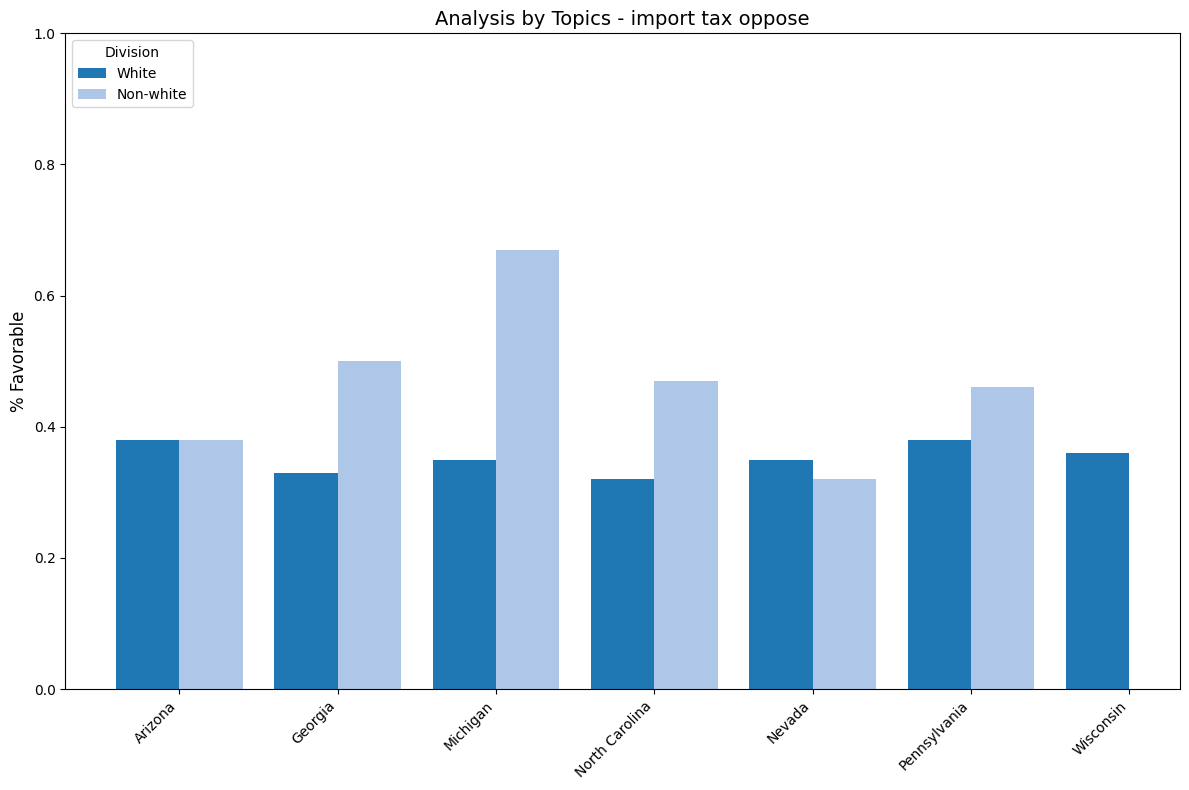

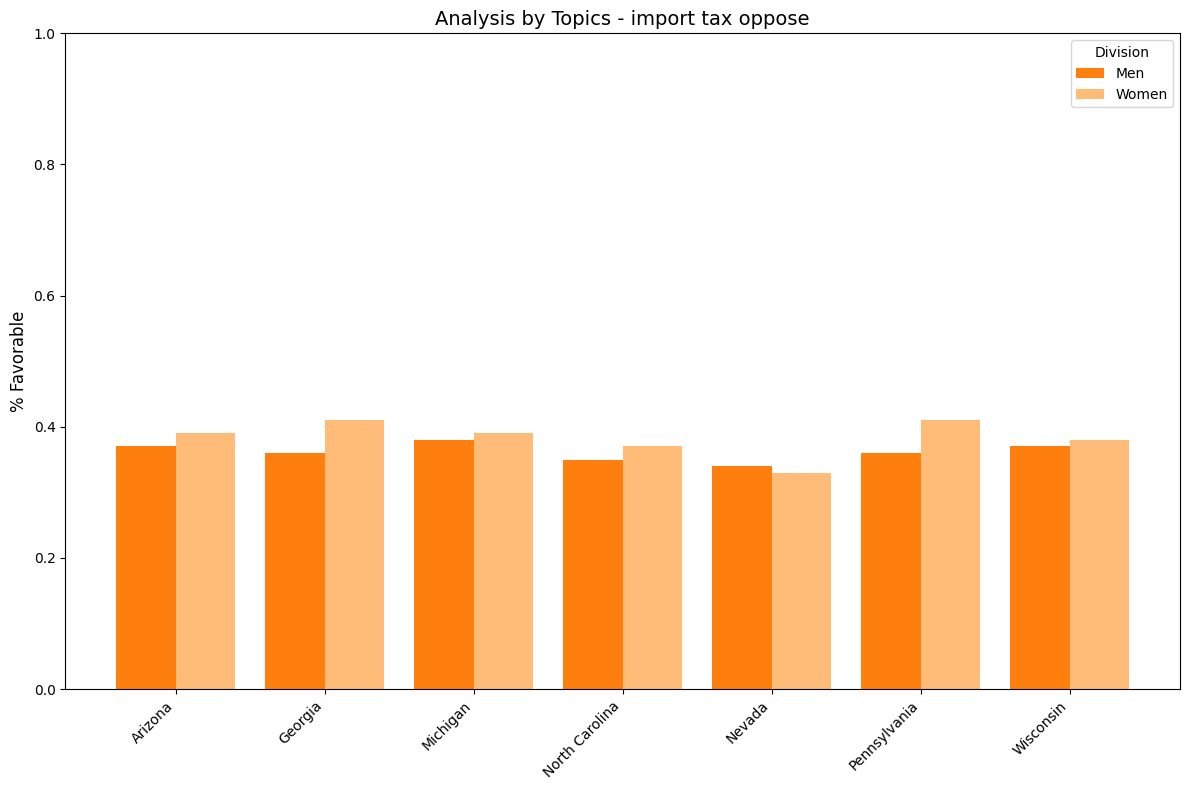

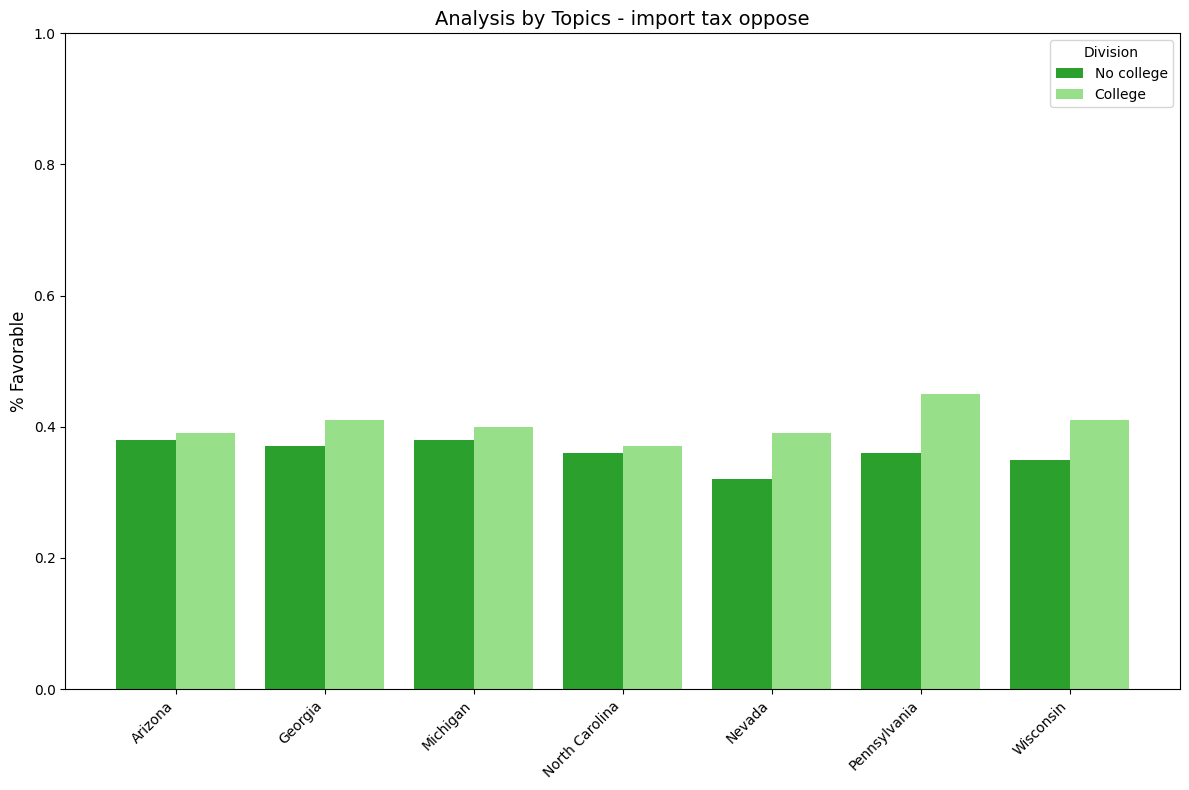

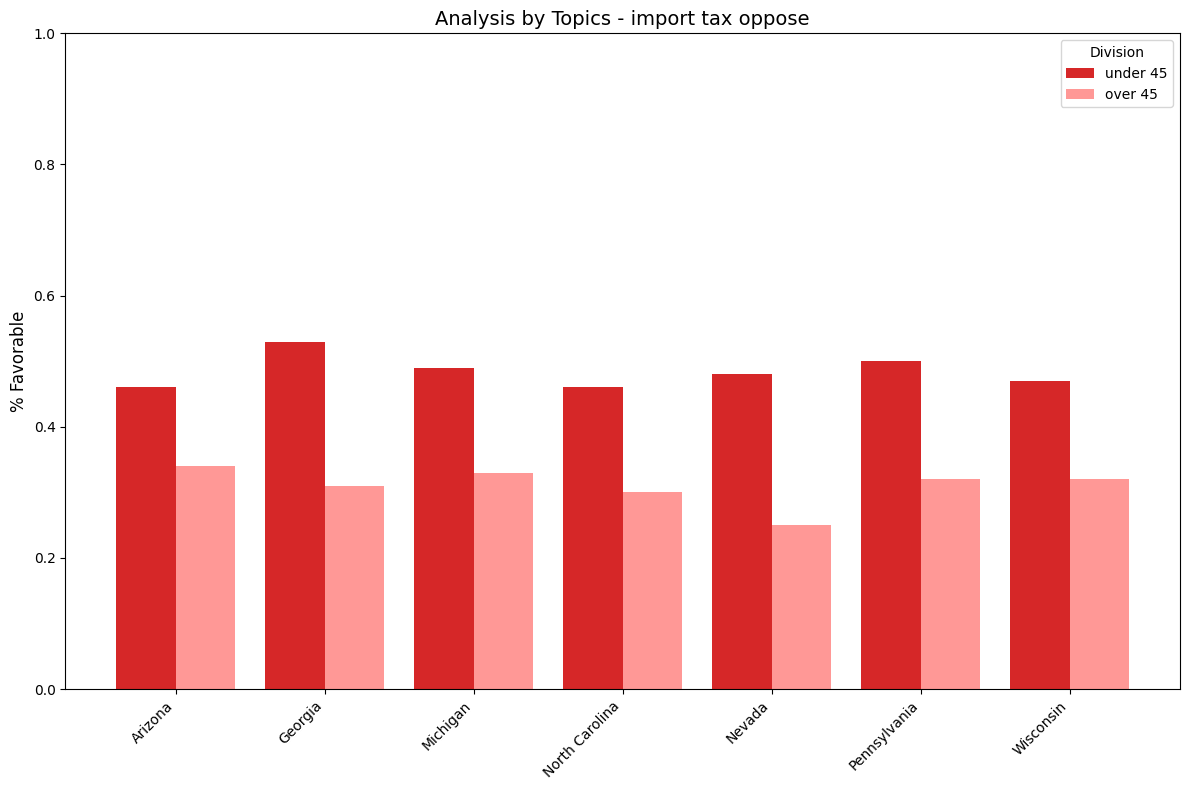

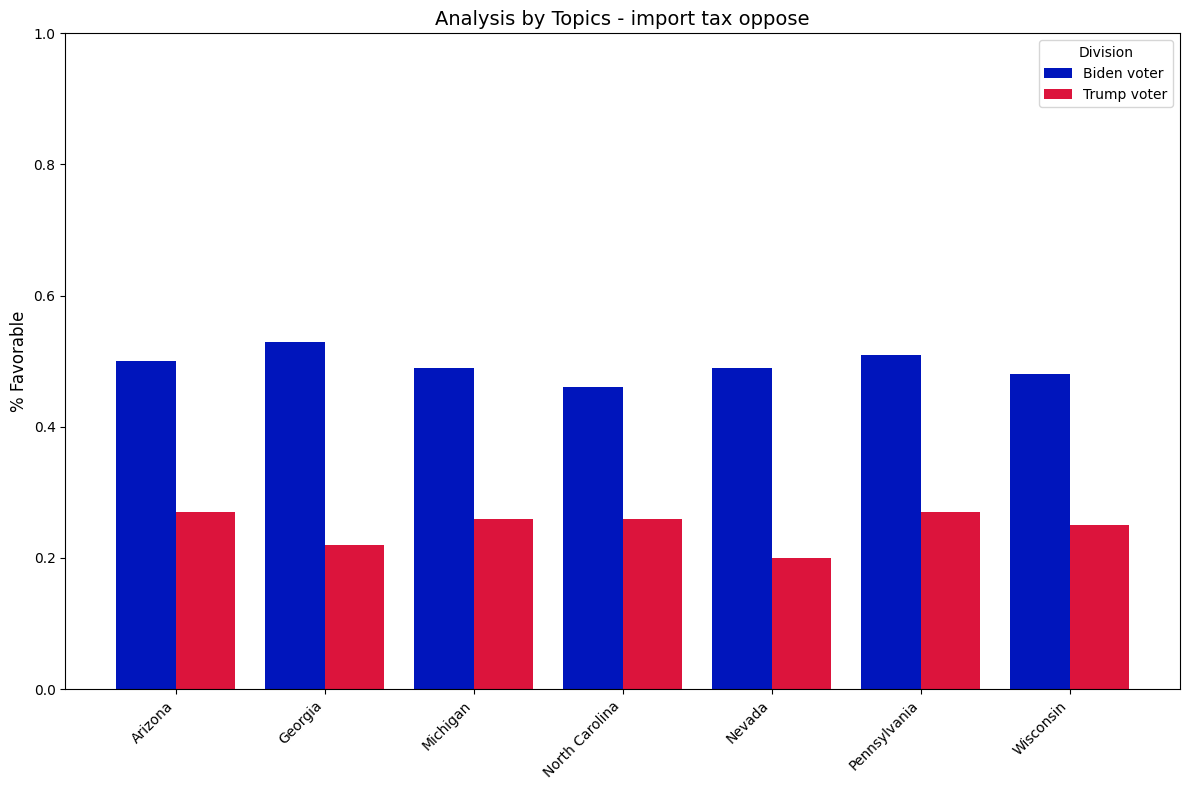

In [ ]:
# Remove national data for further analyses
df_without_national = df[df['State'] != 'National']
swing_states_list = list(df_without_national['State'].unique())

# Analysis of topics for category pairs
def topics_analysis():
    topics = [col for col in df.columns if col not in ['State', 'Division']]  # Get topic columns
    for topic in topics:
        for pair in pairs:  # Iterate over each pair
            pair_data = df[(df['Division'].isin(pair)) & (df['State'] != 'National')].copy()
            pair_data.rename(columns={topic: 'Percentage'}, inplace=True)  # Rename the topic column
            colors = pair_colors.get(pair)
            generic_analysis(pair_data, swing_states_list,
                             f'Analysis by Topics - {topic}',
                             pair, colors, 'Division')
topics_analysis() # Execute analyses

## Analysis by population segment
for each topic

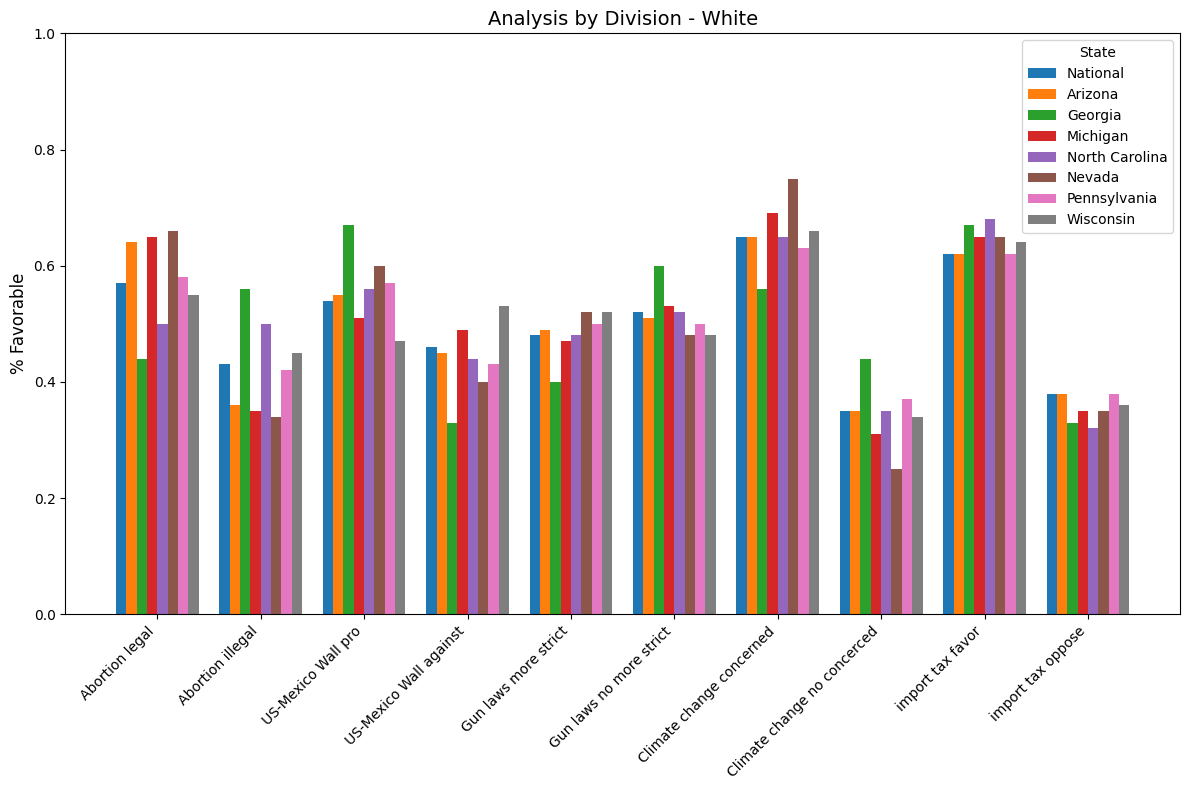

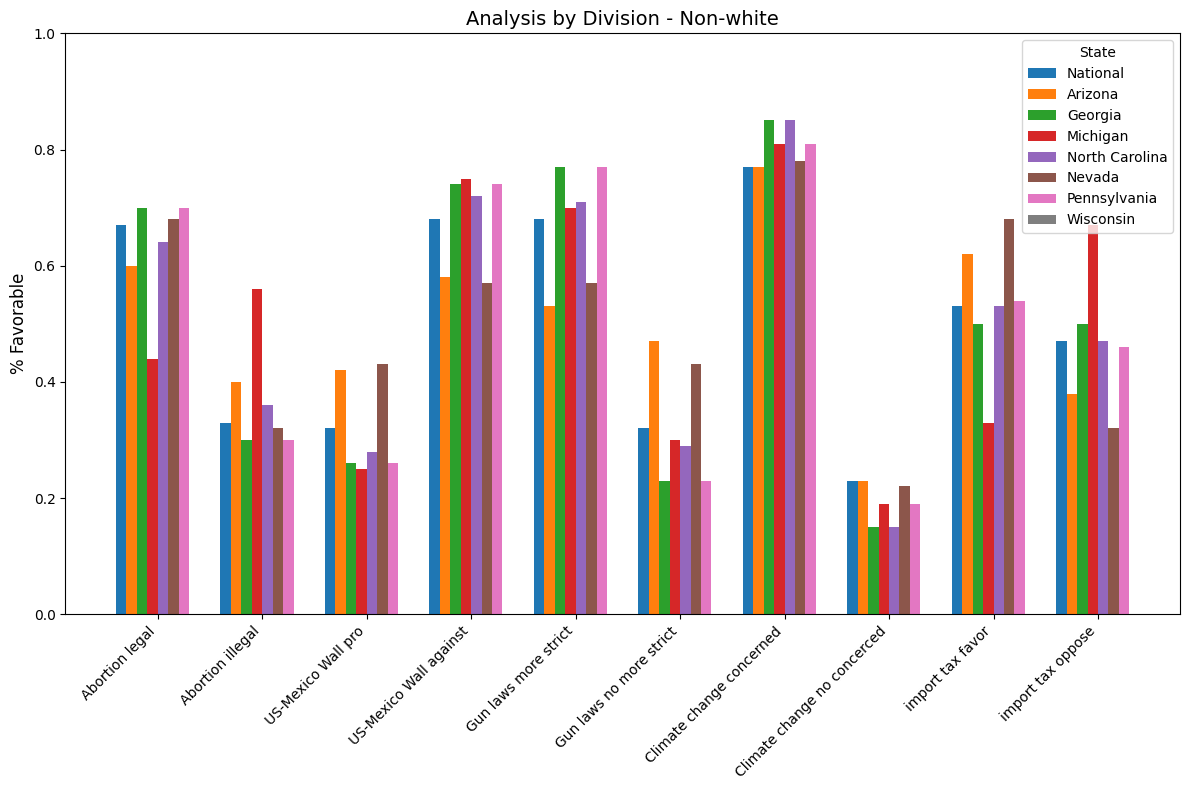

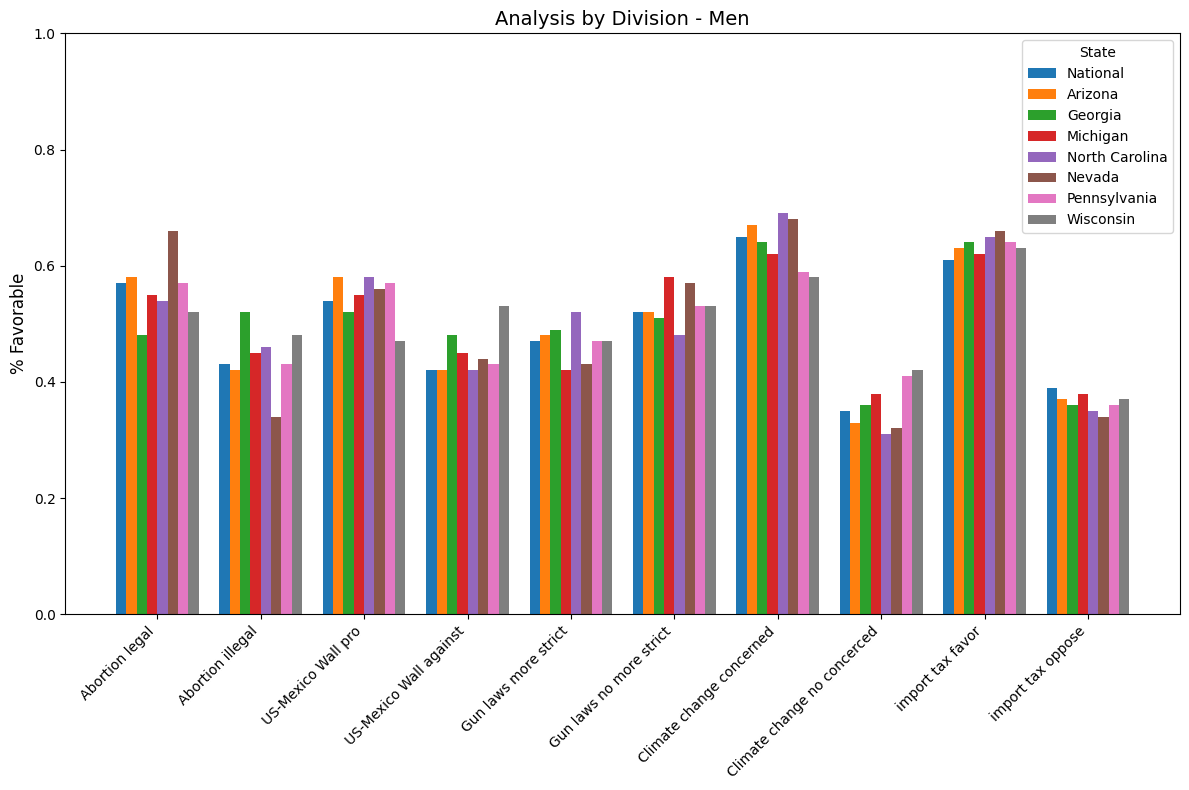

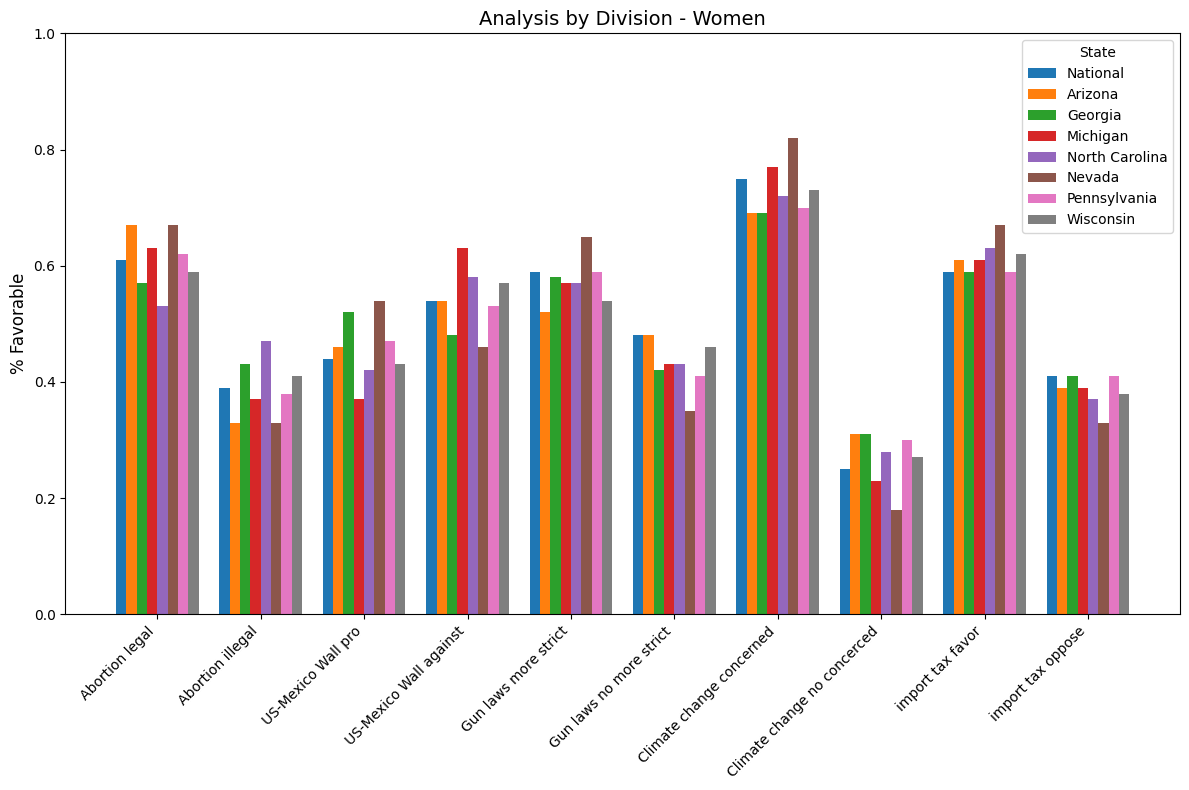

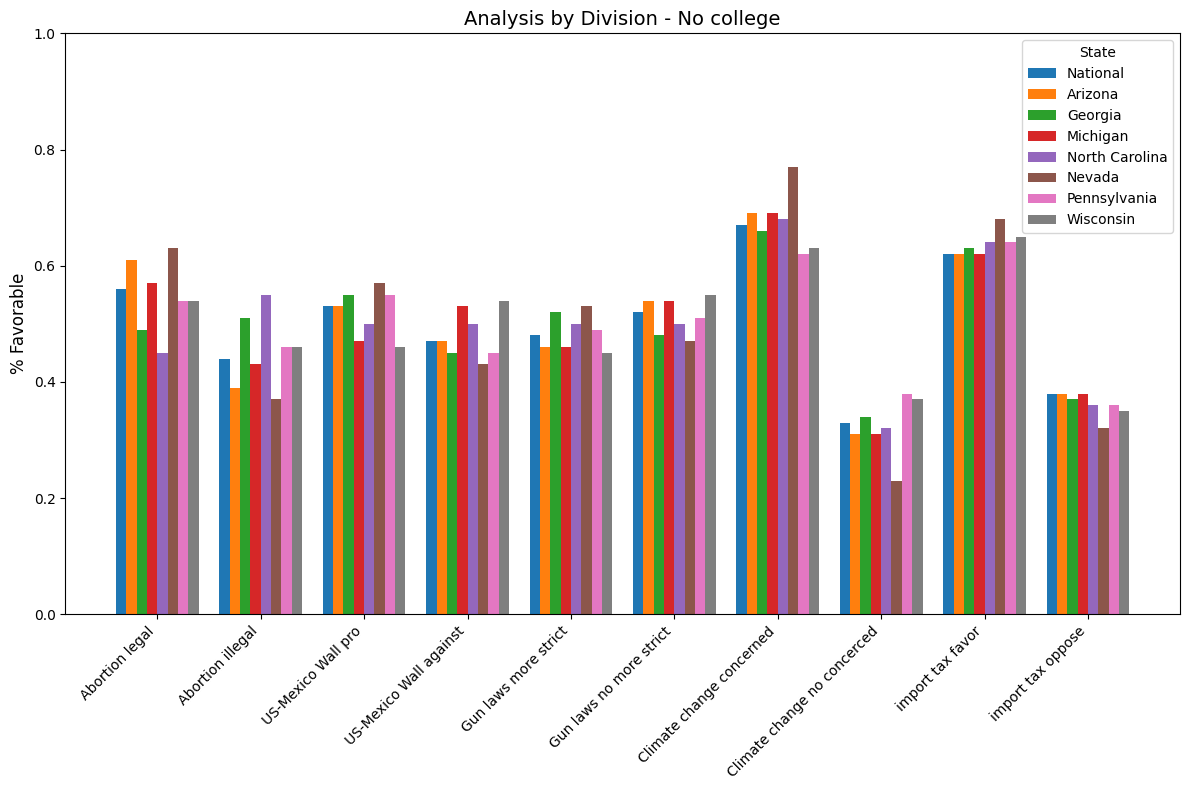

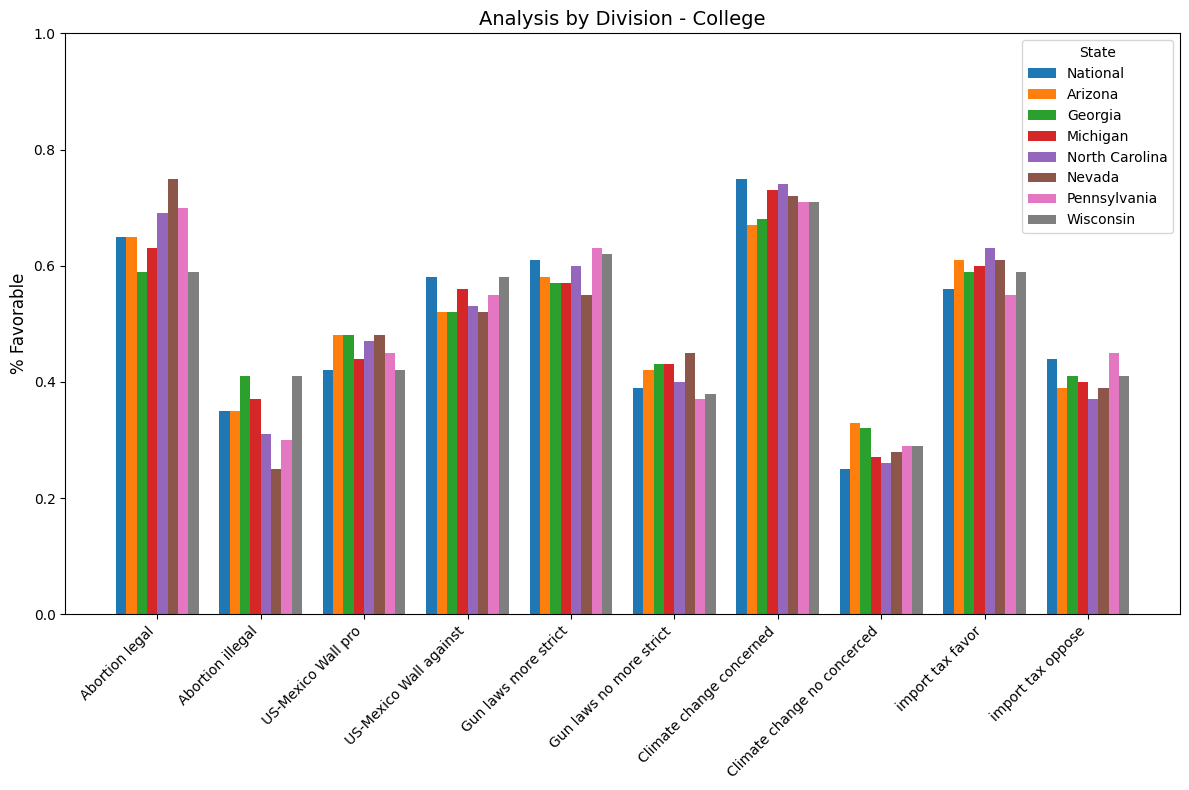

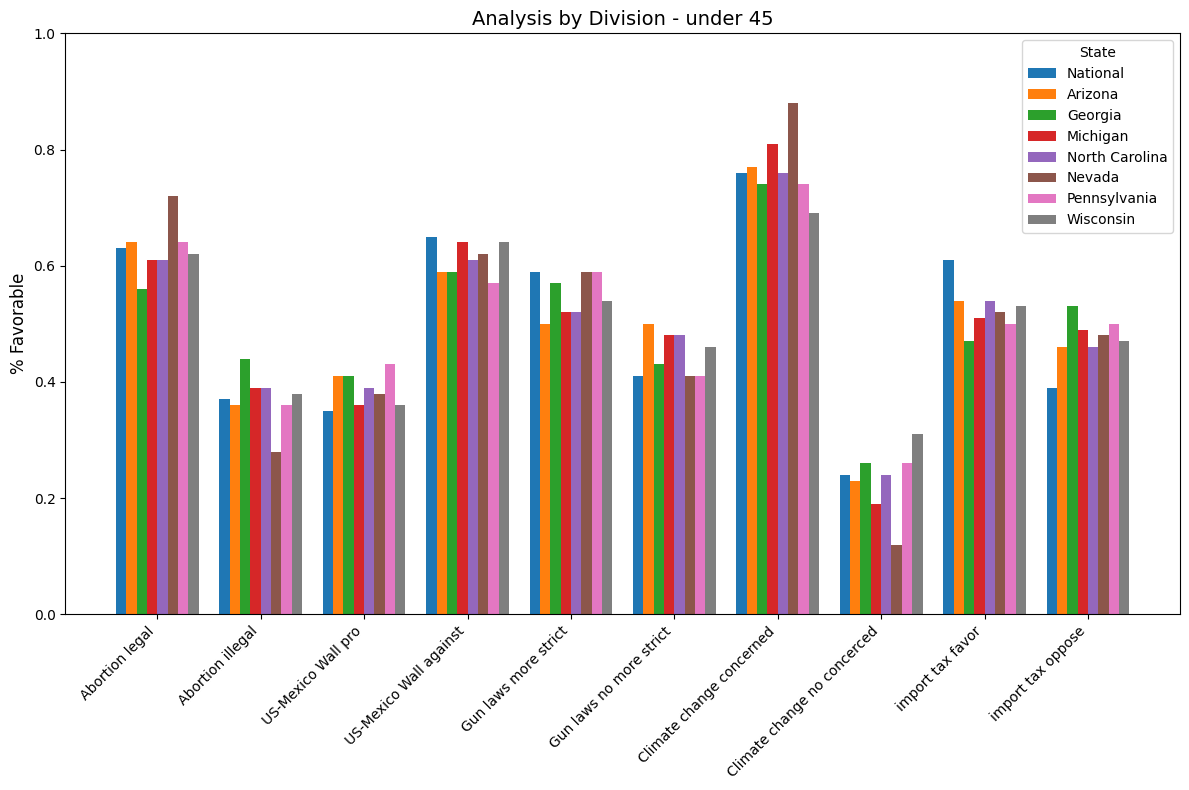

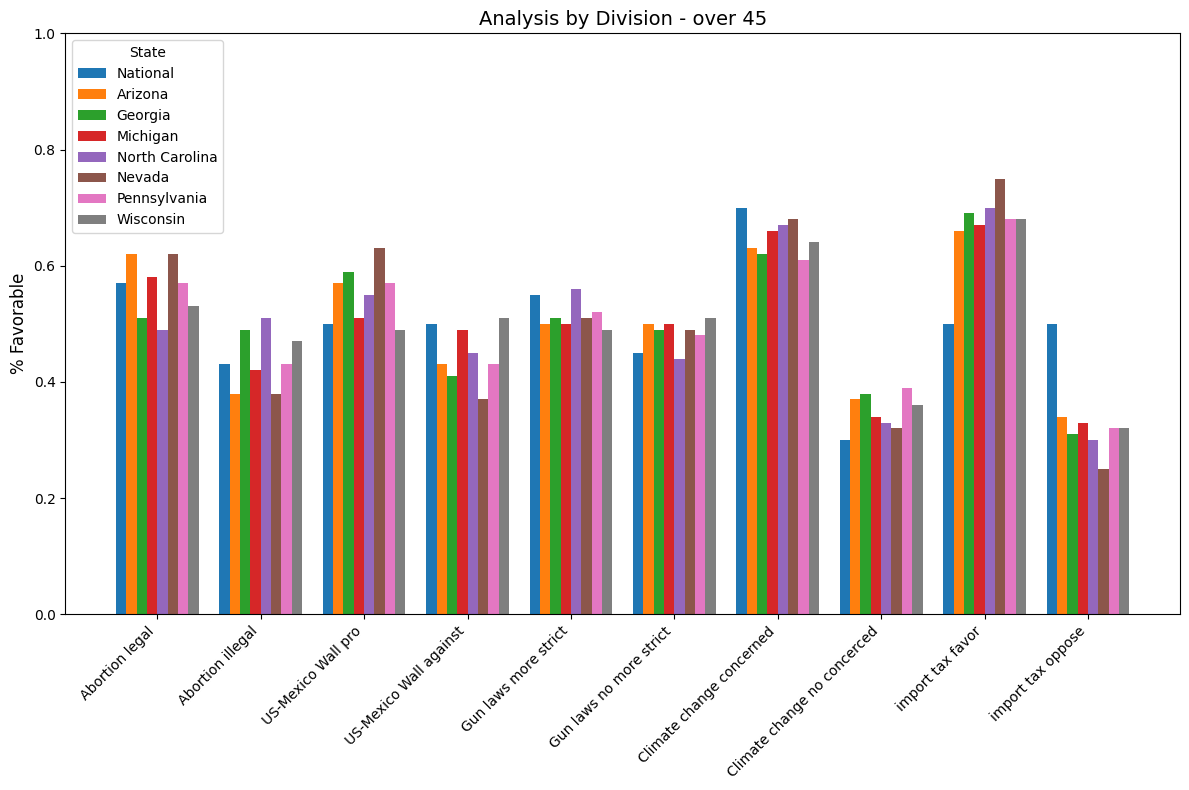

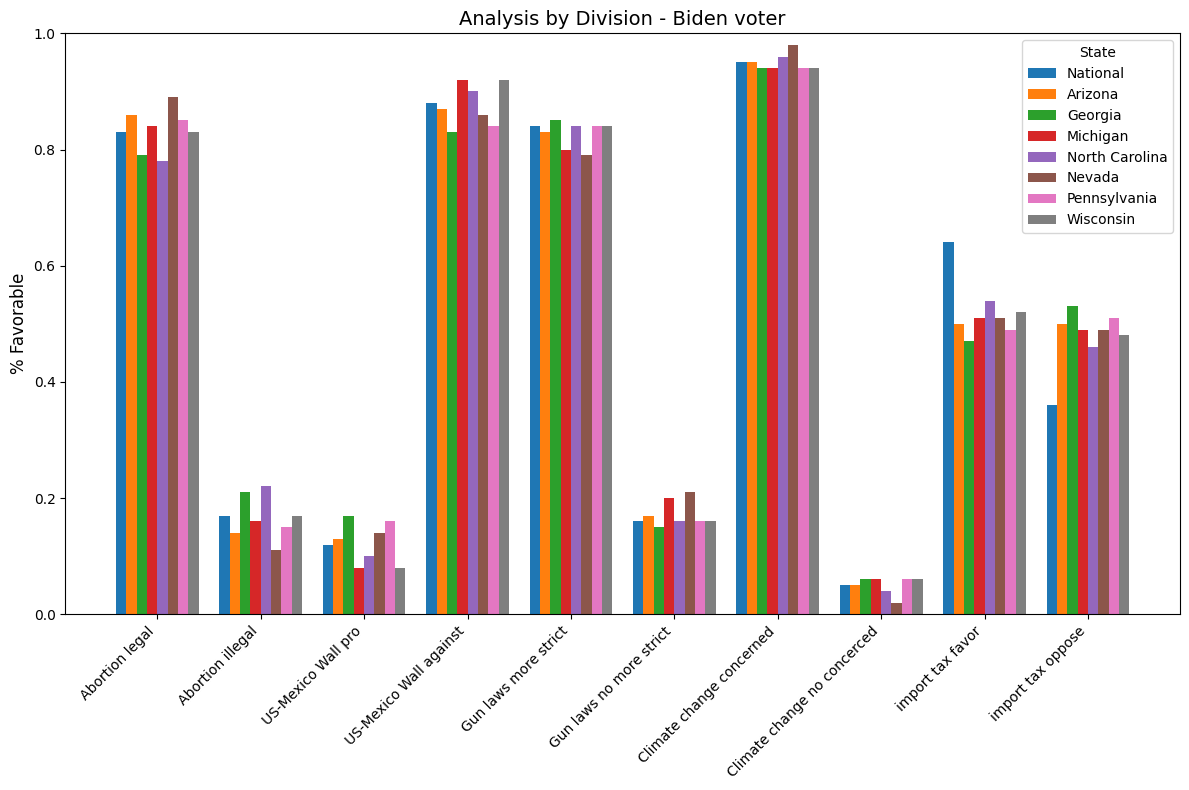

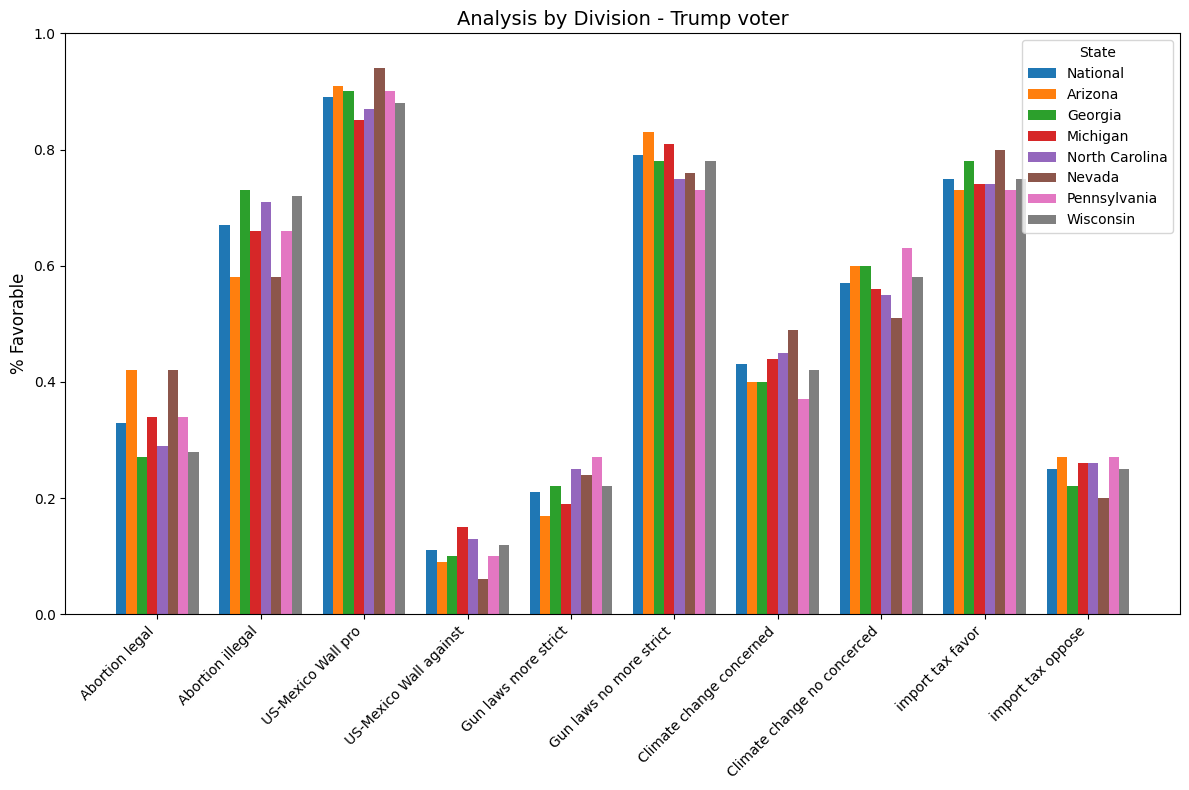

In [ ]:
# Analysis by division
def division_analysis():
    divisions = df['Division'].unique()
    for division in divisions:
        division_data = df[df['Division'] == division]
        melted_data = division_data.melt(id_vars=['State', 'Division'],
                                         var_name='Theme',
                                         value_name='Percentage')
        themes = melted_data['Theme'].unique()
        states = melted_data['State'].unique()
        colors = plt.cm.tab20.colors[:len(states)]
        generic_analysis(melted_data, themes,
                         f'Analysis by Division - {division}',
                         states, None, 'State')
division_analysis() # Execute analyses